# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Feature Engineering Homework
 
Perform feature engineering on a dataset to transform data into a suitable form for a machine learning algorithm.

__Bonus__: Make nice (and _useful_) data visualisation plots.

### The dataset

The [Concrete](https://www.kaggle.com/sinamhd9/concrete-comprehensive-strength) dataset contains a variety of concrete formulations and the resulting product's compressive strength, which is a measure of how much load that kind of concrete can bear. For your information, the task for this dataset is to predict a concrete's compressive strength given its formulation.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

### Import data

In [2]:
url_data = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/concrete.csv"

df = pd.read_csv(url_data)
df.head()

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0  270     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0  365     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5  360     44.30

<details>
    <summary><b>Hints and suggestions</b></summary> 
    You can see here the various ingredients going into each variety of concrete. 
    Here some suggestions that you might find useful.
    <ul>
        <li> Adding some additional synthetic features derived from the original ones in the dataset can help a model to learn important relationships among them.</li>
        <li> Try to establish a <b>baseline</b> (_e.g._ a simple stupid model) by training the model on the untouched dataset. This will help you determine whether our new features are actually useful.</li>
    </ul>
    Establishing baselines like this is good practice at the start of the feature engineering process. A baseline score can help you decide whether your new features are worth keeping, or whether you should discard them and possibly try something else.        
</details>


---

## Your work

In [3]:
#data check

df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [4]:
#data check

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


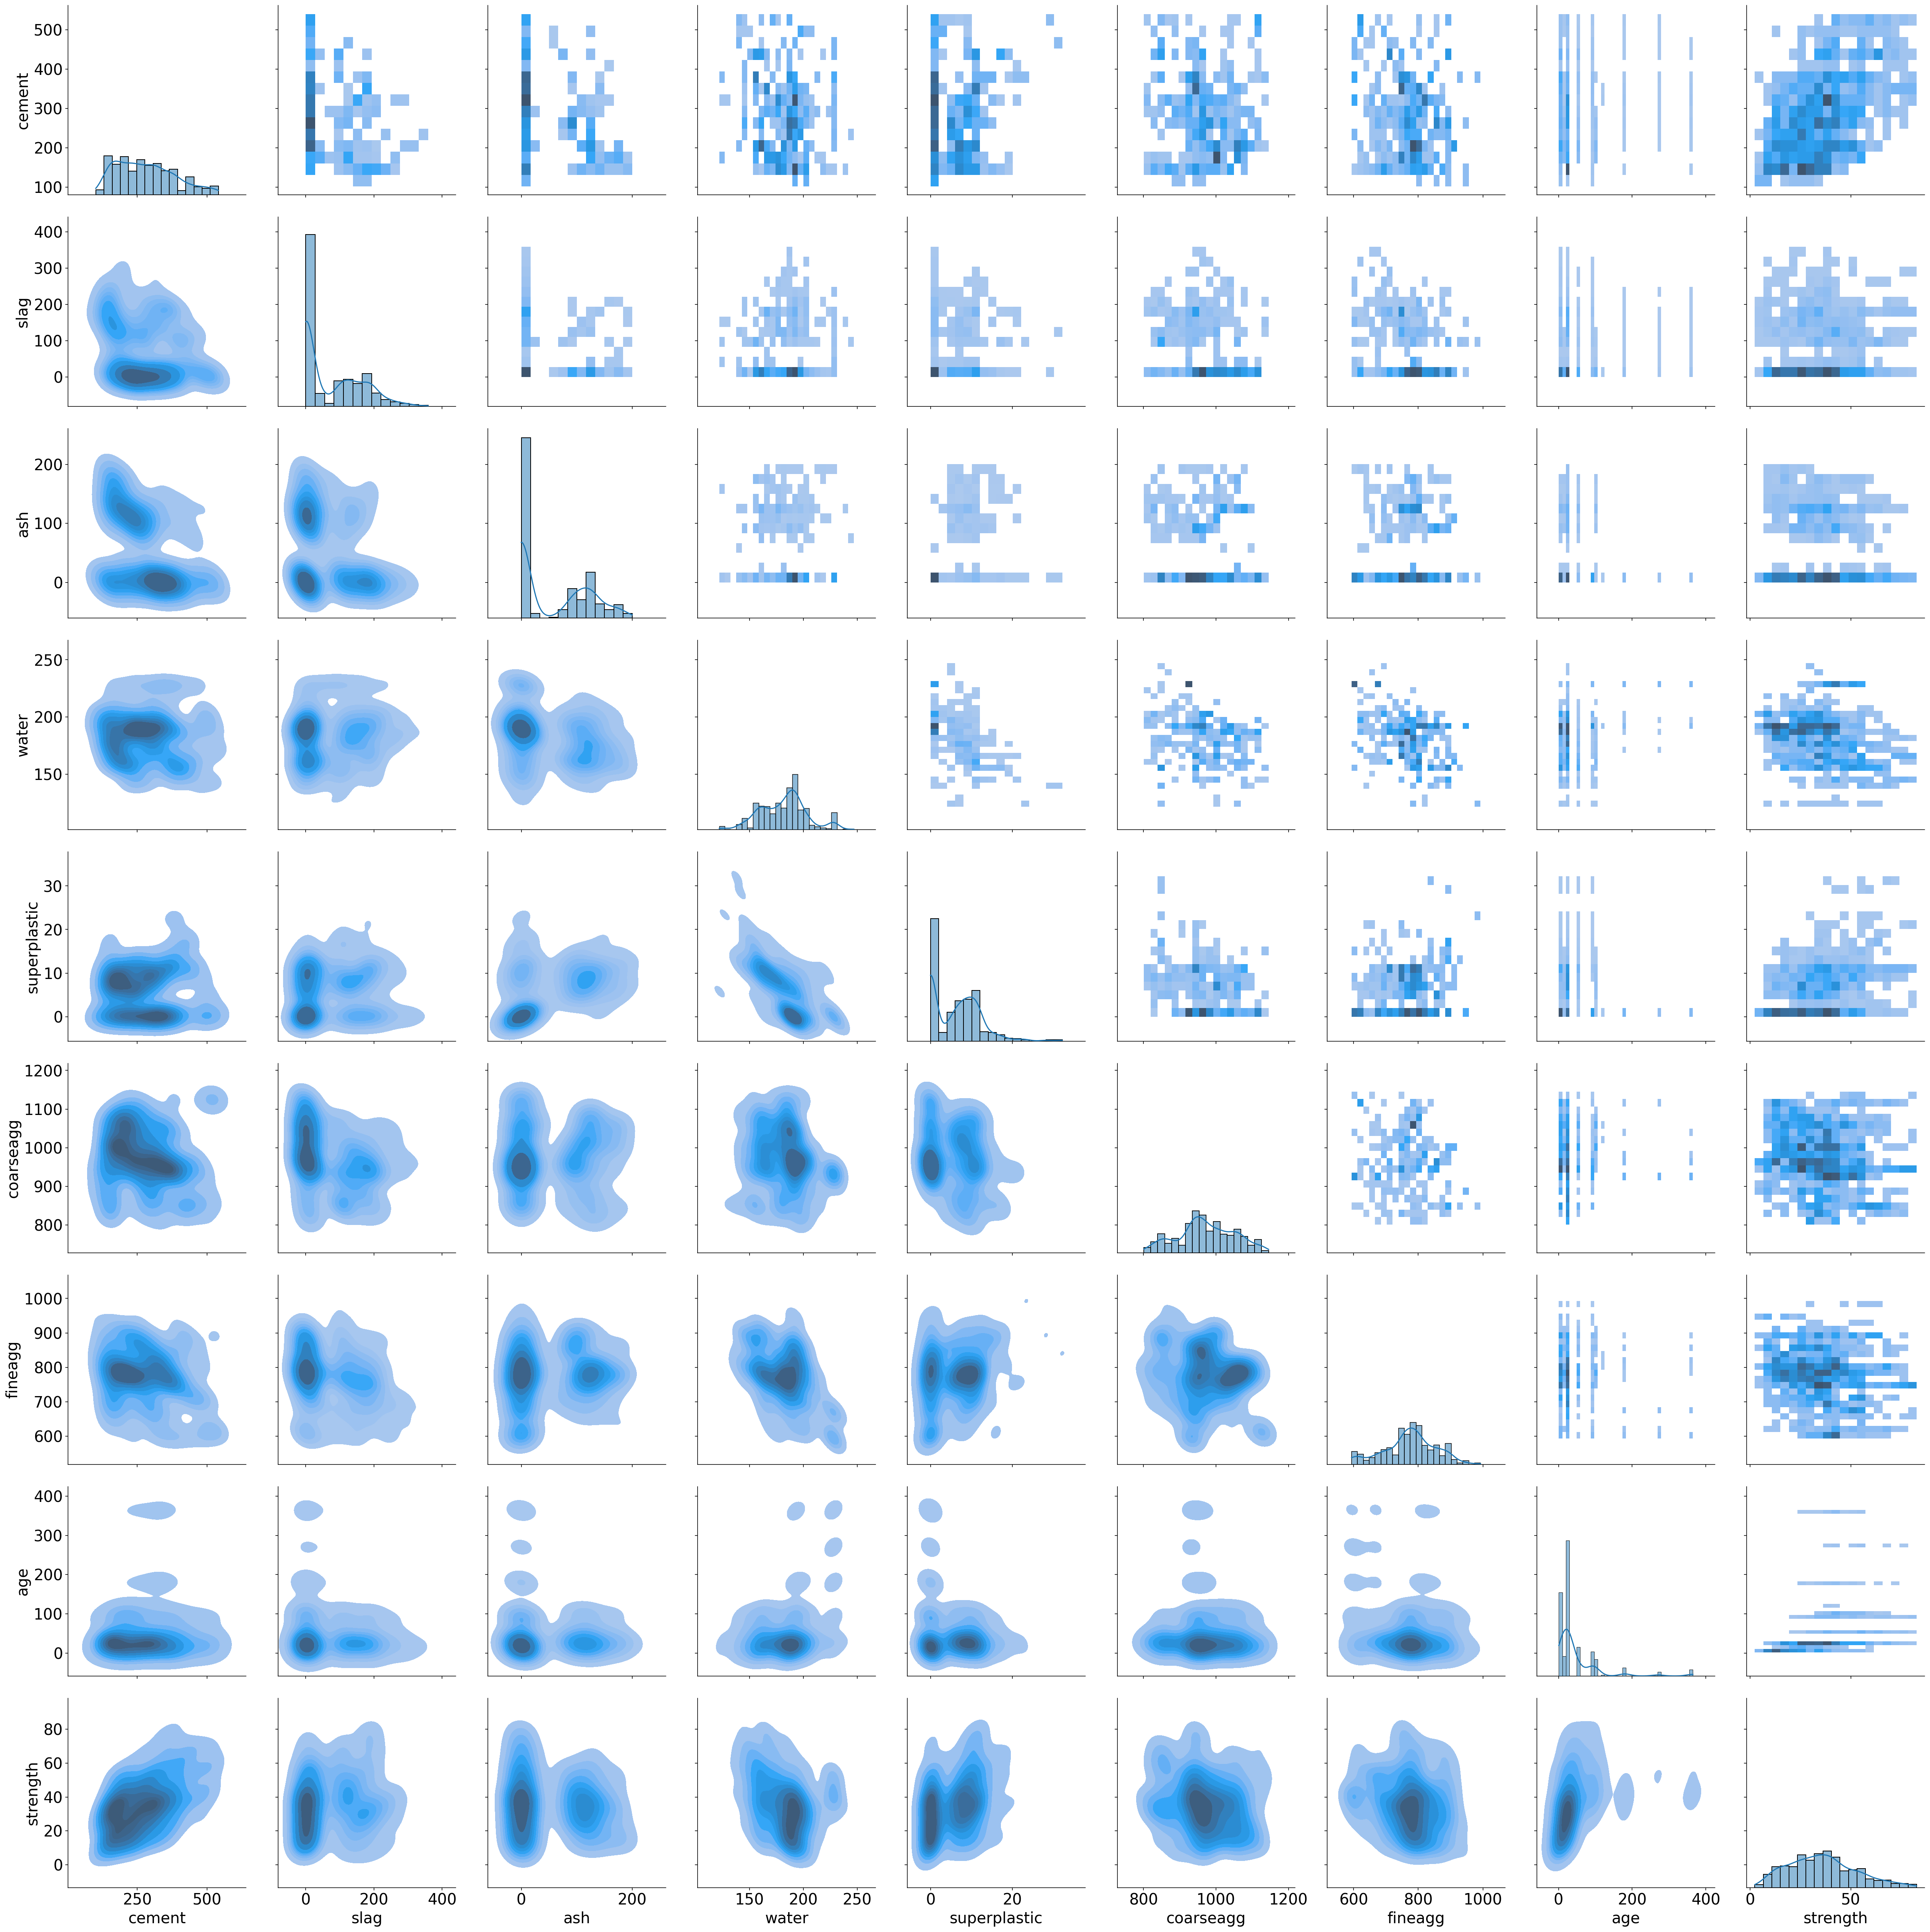

In [5]:
#Plotting the distribuition of feature, the ones of interest are the feature coupled with the strength

g = sns.PairGrid(df, height=4)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True);

<AxesSubplot:>

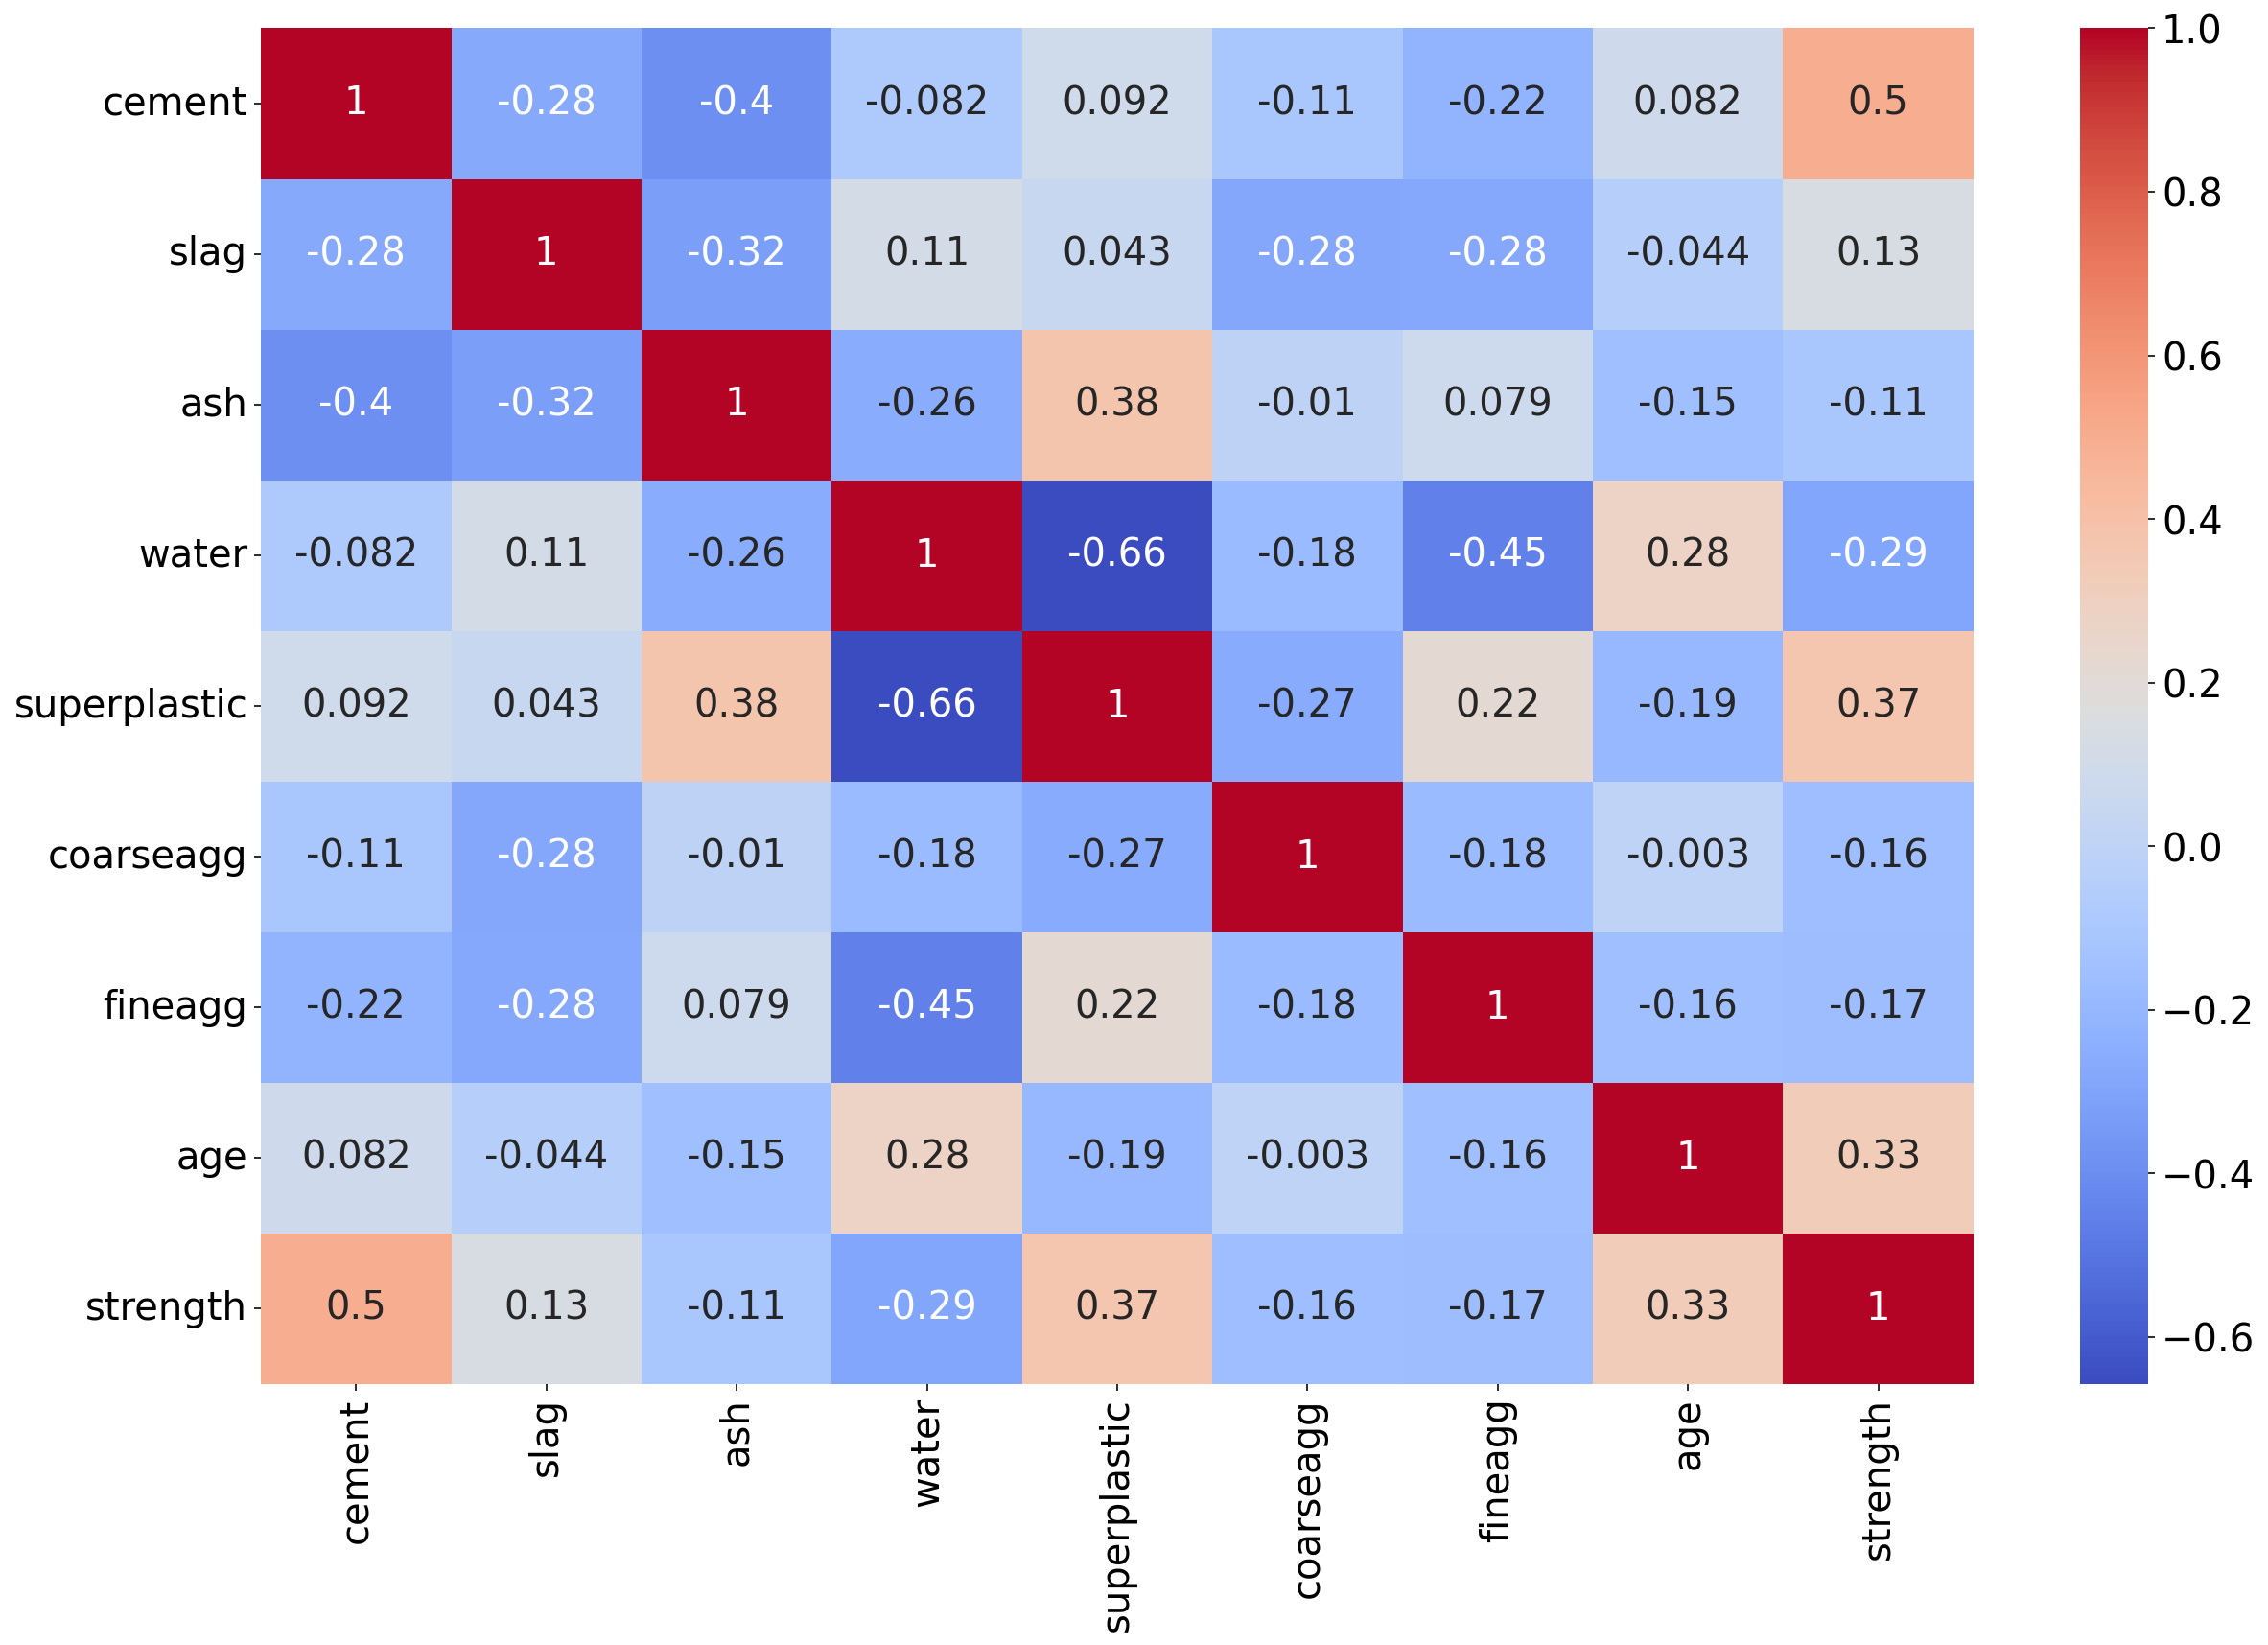

In [6]:
#plotting the correlations among the feature, the one of interest are the correlations with the strength

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

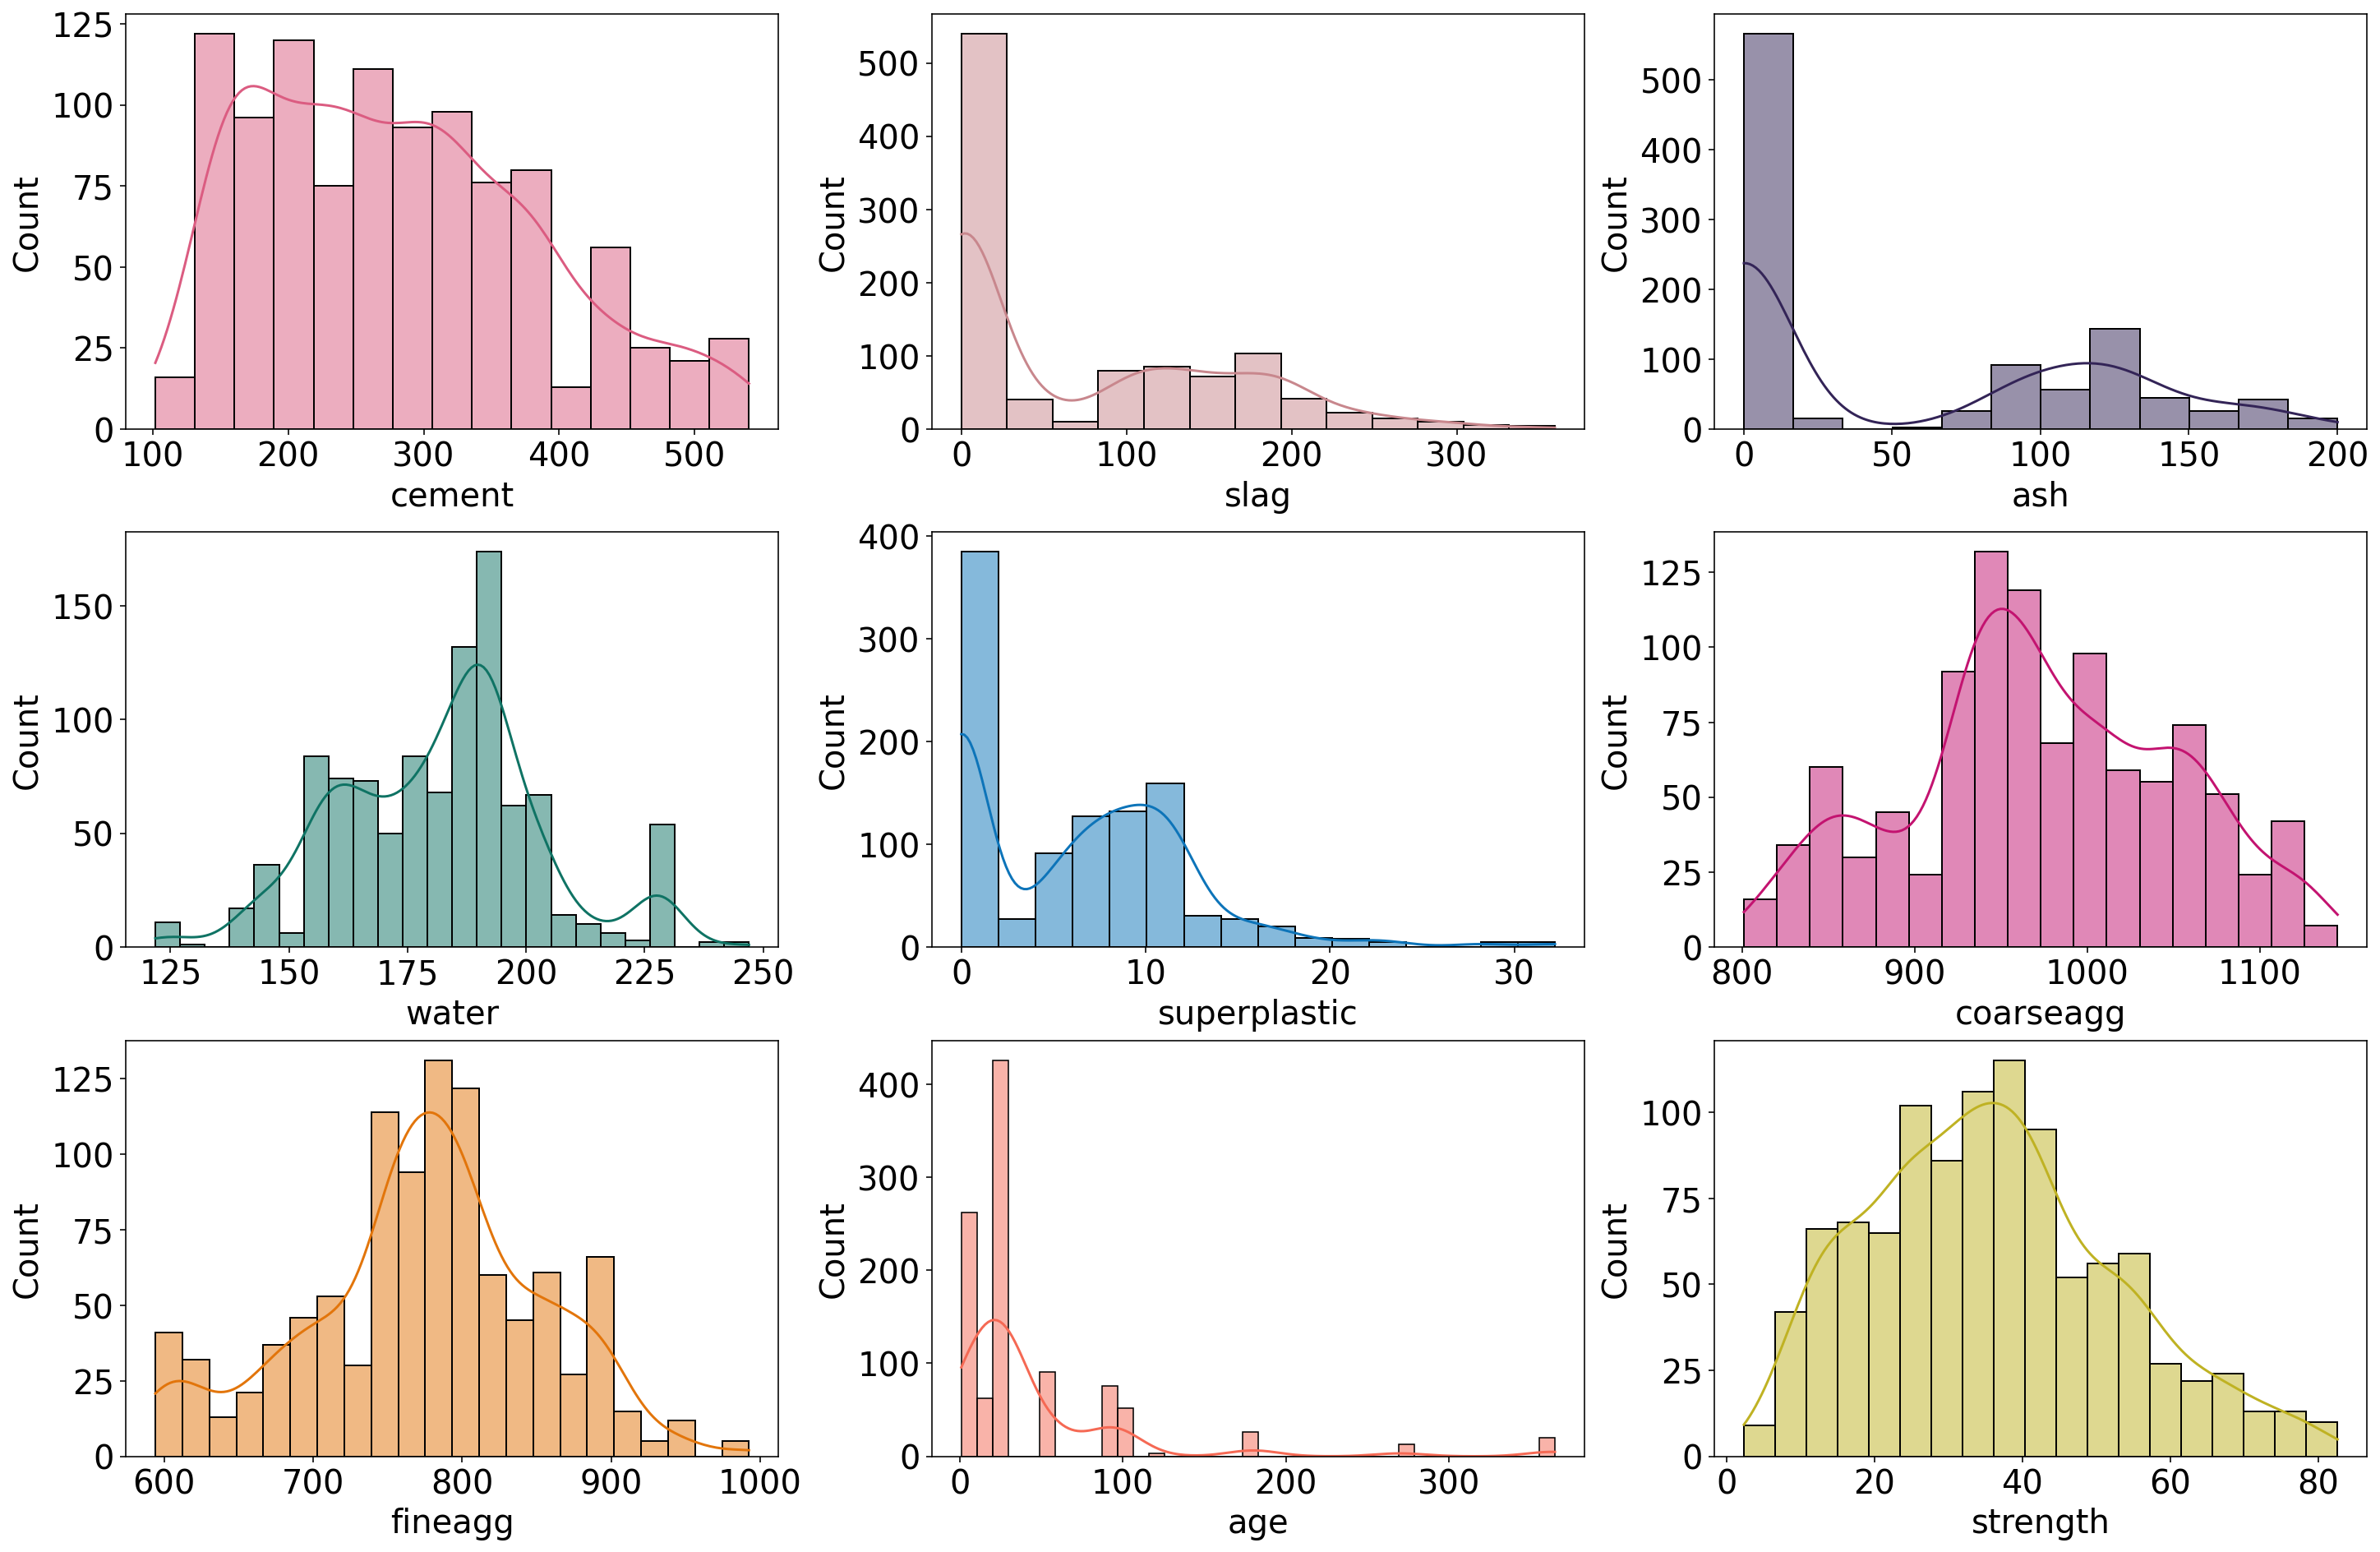

In [7]:
#plotting the data distributions

fig,axes = plt.subplots(3, 3, constrained_layout = True)
for i,ax in enumerate(axes.ravel()):
    rgb = np.random.rand(3,)
    sns.histplot( x = df.iloc[:,i], kde = True, color = rgb, ax = ax)

In [8]:
#printing the correlations of the features with the strength

corr = df.corr().strength
corr

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
Name: strength, dtype: float64

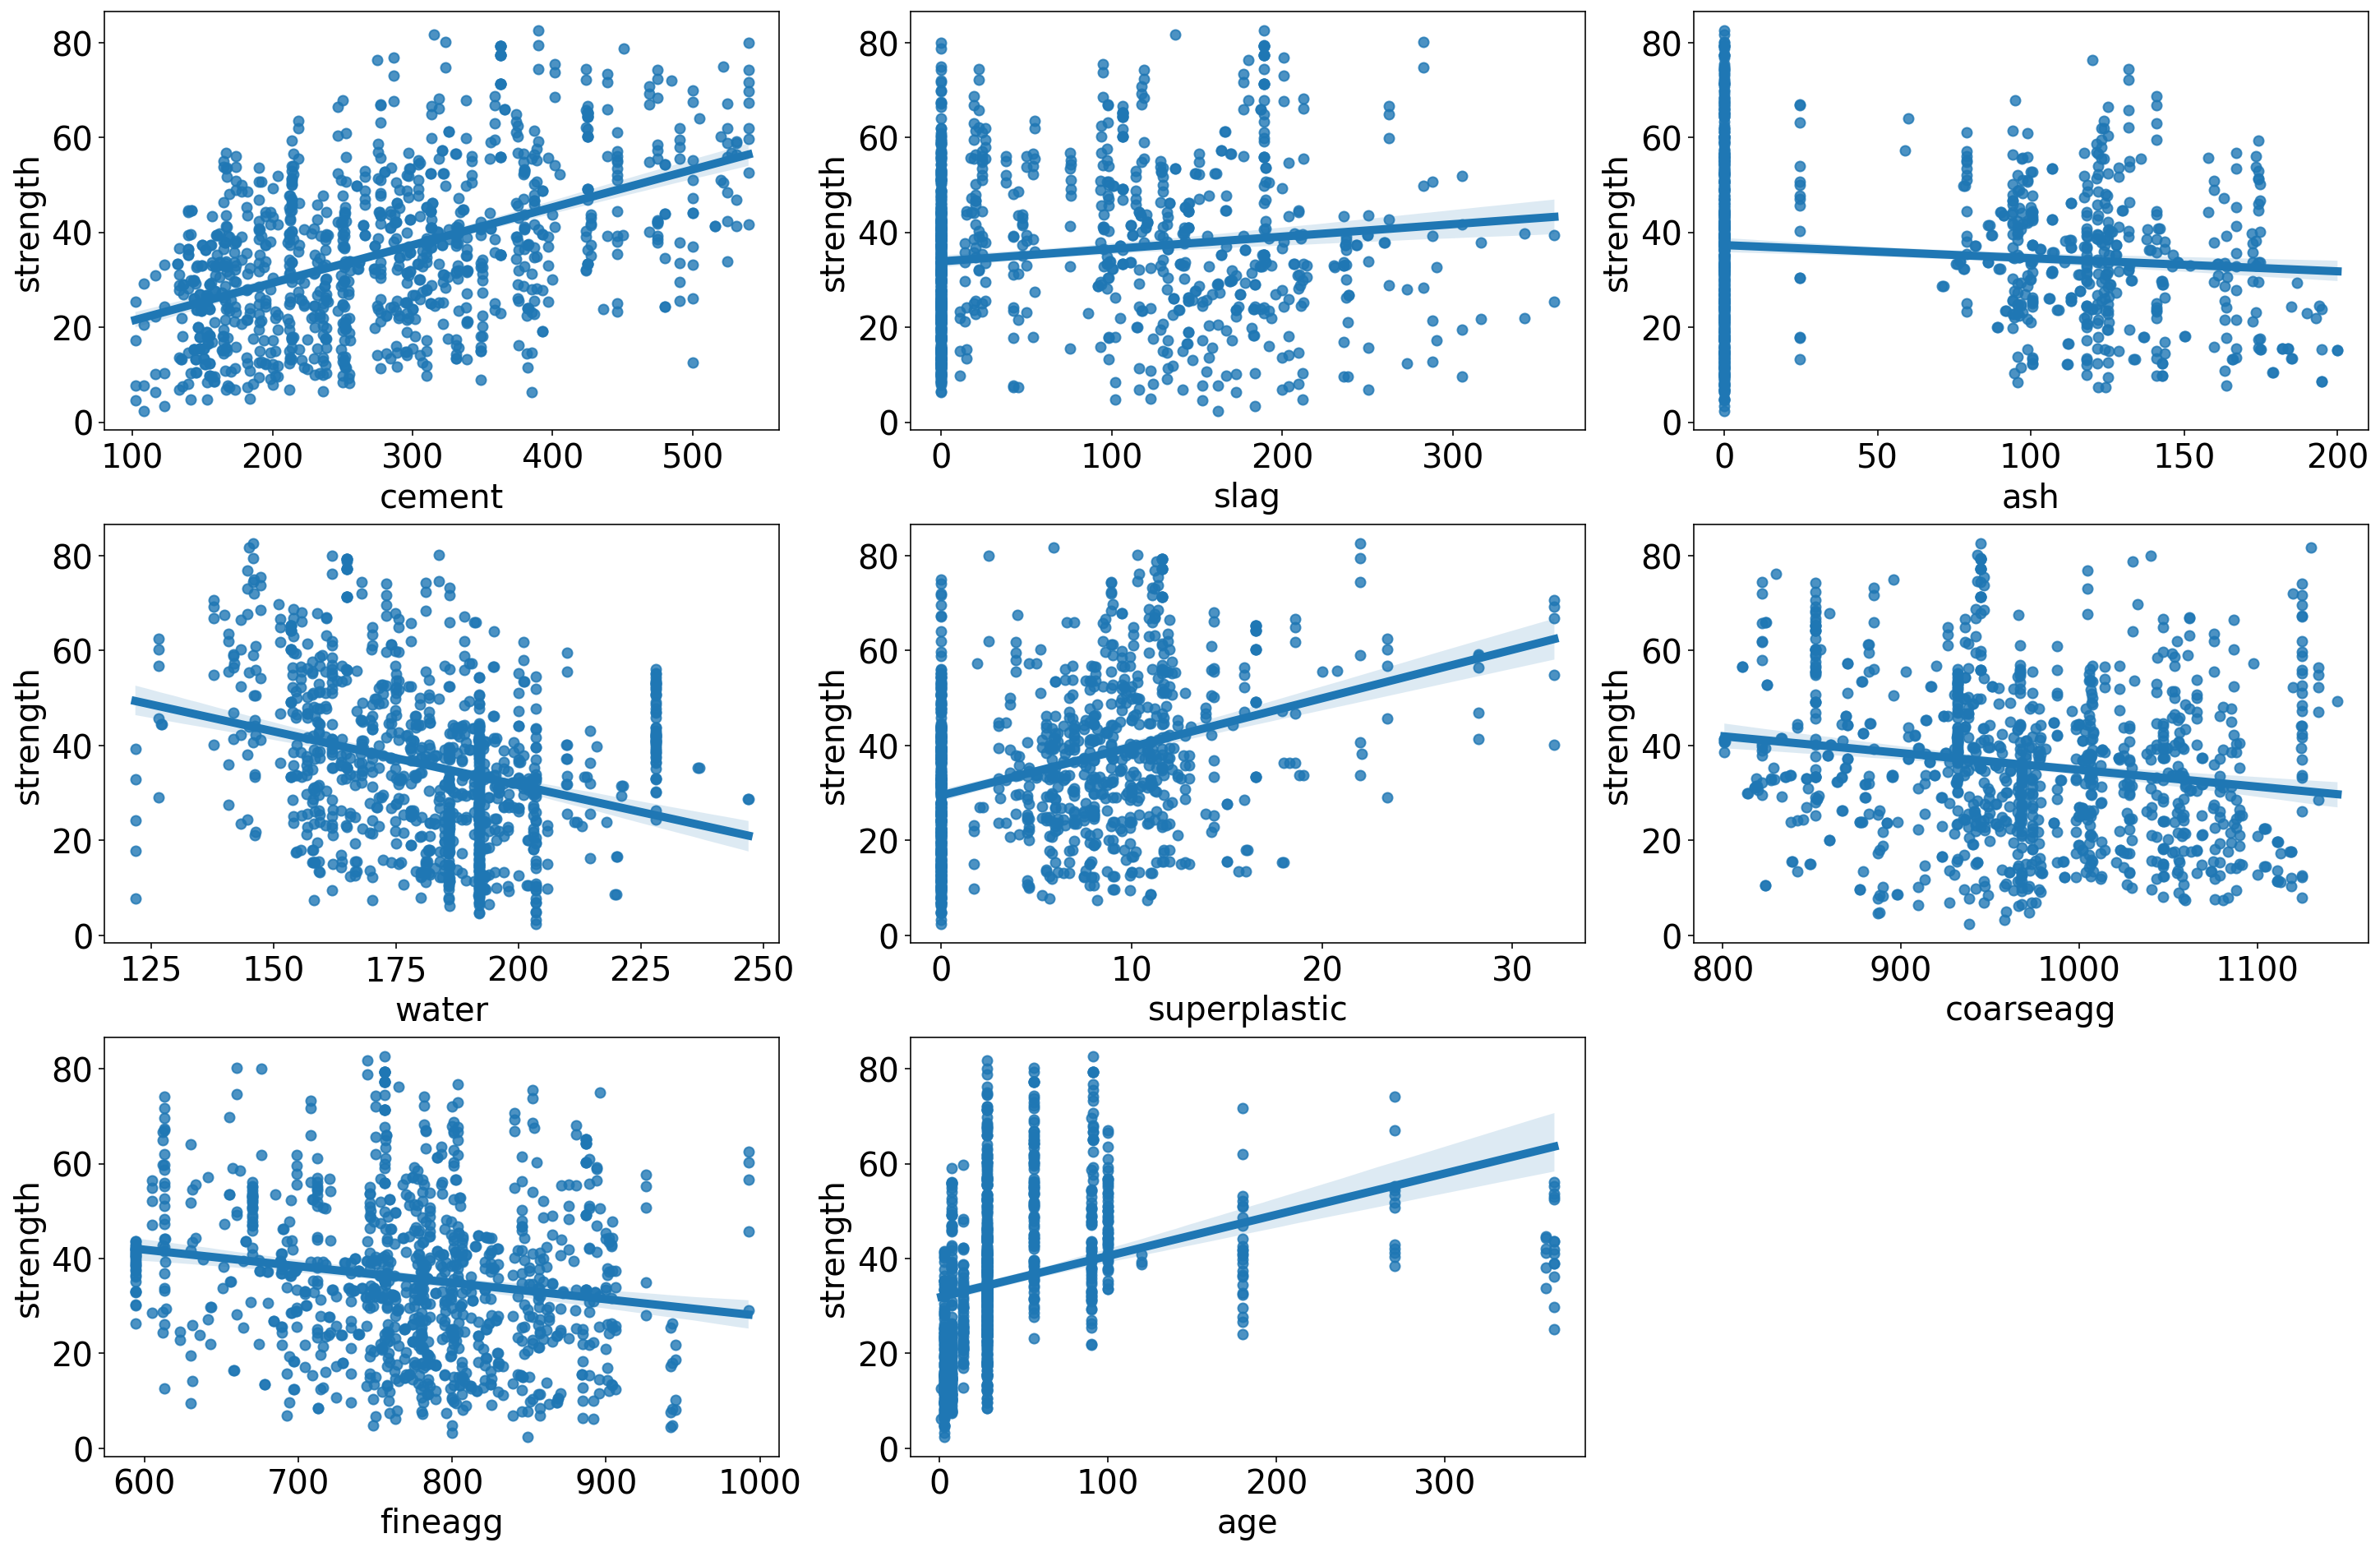

In [9]:
#plotting the correlations of the features with the strength

fig, axes = plt.subplots(3,3, constrained_layout = True)
for i, ax in enumerate(axes.ravel()):
    if i == 8:
        fig.delaxes(ax)
        continue
    sns.regplot(x = df[corr.index[i]], y = df[corr.index[8]], line_kws={'linewidth':5}, ax = ax)

In [10]:
#importing the scaler from scikit-learn

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

In [12]:
# fit scaler normalisation
scaler = MinMaxScaler().fit(X)

# transform training data
X_norm = scaler.transform(X)

df_norm =pd.DataFrame(X_norm, columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age'])
df_norm.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean      0.409059     0.205609     0.270806     0.477374      0.192691   
std       0.238599     0.240065     0.319825     0.170561      0.185523   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.206336     0.000000     0.000000     0.344249      0.000000   
50%       0.390183     0.061213     0.000000     0.504792      0.198758   
75%       0.566210     0.397746     0.591204     0.560703      0.316770   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         coarseagg      fineagg          age  
count  1030.000000  1030.000000  1030.000000  
mean      0.499764     0.450528     0.122698  
std       0.226029     0.201144     0.173544  
min       0.000000     0.000000     0.000000  
25%       0.380814     0.343578     0.016484  
50%       0.485465     0.465379     0.074176  
75%       0.663953     0.577020     0.151099  
max       1.000000     1.000000     1.000000

In [13]:
# fit scaler standardisation
scaler = StandardScaler().fit(X)

# transform training data
X_std = scaler.transform(X)

df_std =pd.DataFrame(X_std, columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age'])
df_std.describe()

cement          slag           ash         water  superplastic  \
count  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03   
mean  -3.862875e-16  8.057740e-16  9.156645e-17  1.746176e-17 -3.951532e-16   
std    1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00   
min   -1.715253e+00 -8.568879e-01 -8.471439e-01 -2.800211e+00 -1.039143e+00   
25%   -8.500535e-01 -8.568879e-01 -8.471439e-01 -7.808939e-01 -1.039143e+00   
50%   -7.915193e-02 -6.017783e-01 -8.471439e-01  1.608294e-01  3.271508e-02   
75%    6.589606e-01  8.007446e-01  1.002278e+00  4.887927e-01  6.691307e-01   
max    2.477915e+00  3.310675e+00  2.281084e+00  3.065647e+00  4.353642e+00   

          coarseagg       fineagg           age  
count  1.030000e+03  1.030000e+03  1.030000e+03  
mean   7.295135e-16 -2.917030e-16  1.534910e-16  
std    1.000486e+00  1.000486e+00  1.000486e+00  
min   -2.212138e+00 -2.240917e+00 -7.073594e-01  
25%   -5.265174e-01 -5.319697e-01 -6.123314e-01  
50%   -6.329352e-02  7.386739e-02 -2.797331e-01  
75%    7.267605e-01  6.291661e-01  1.637312e-01  
max    2.214224e+00  2.733062e+00  5.057677e+00

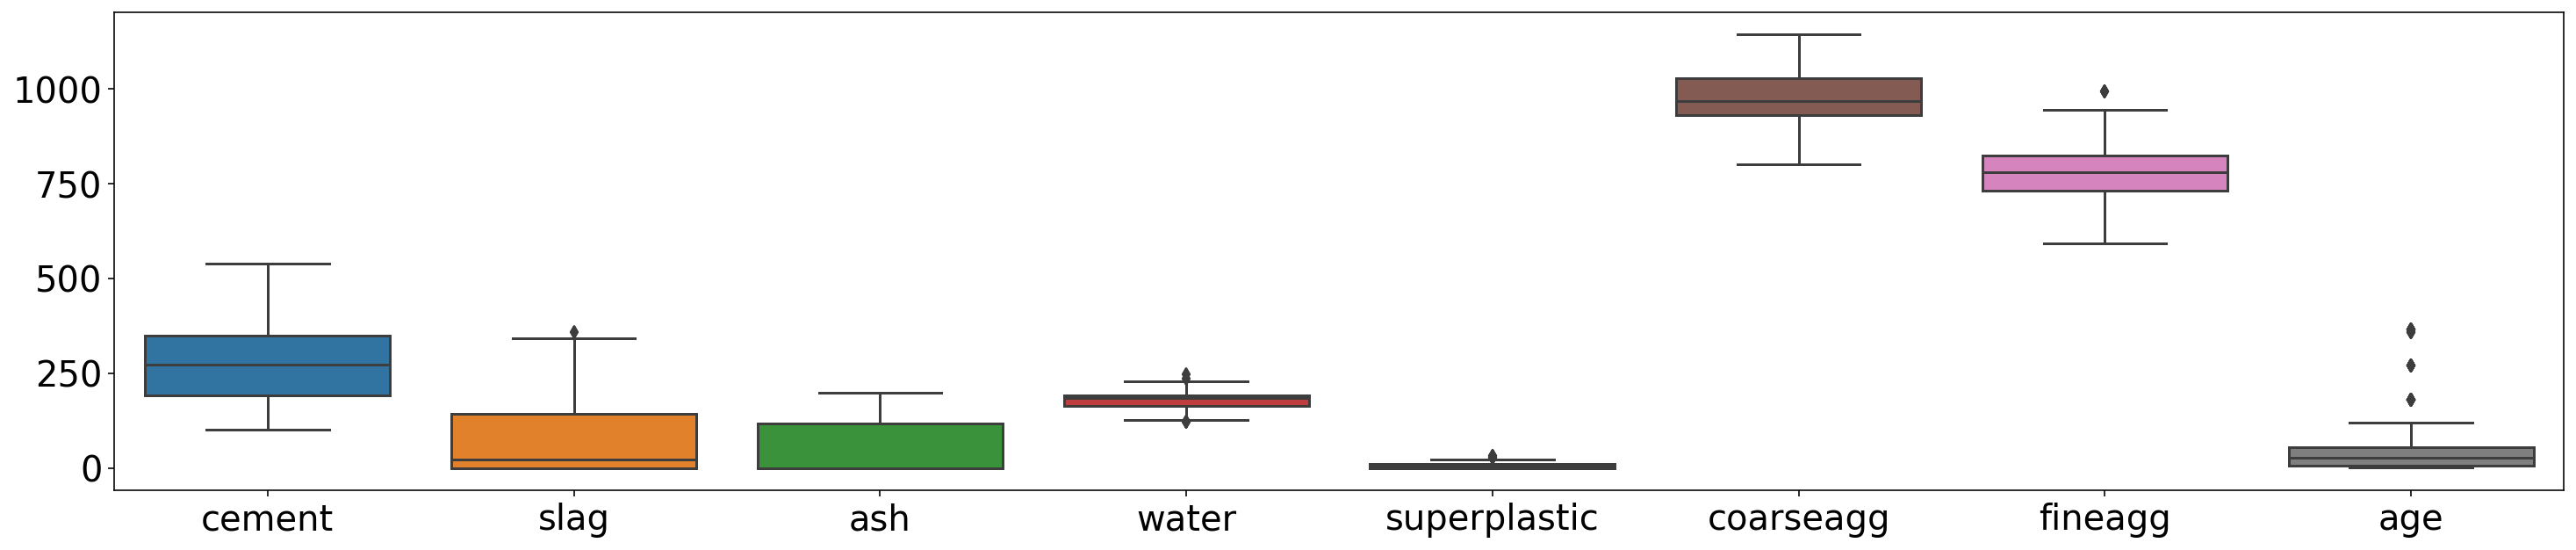

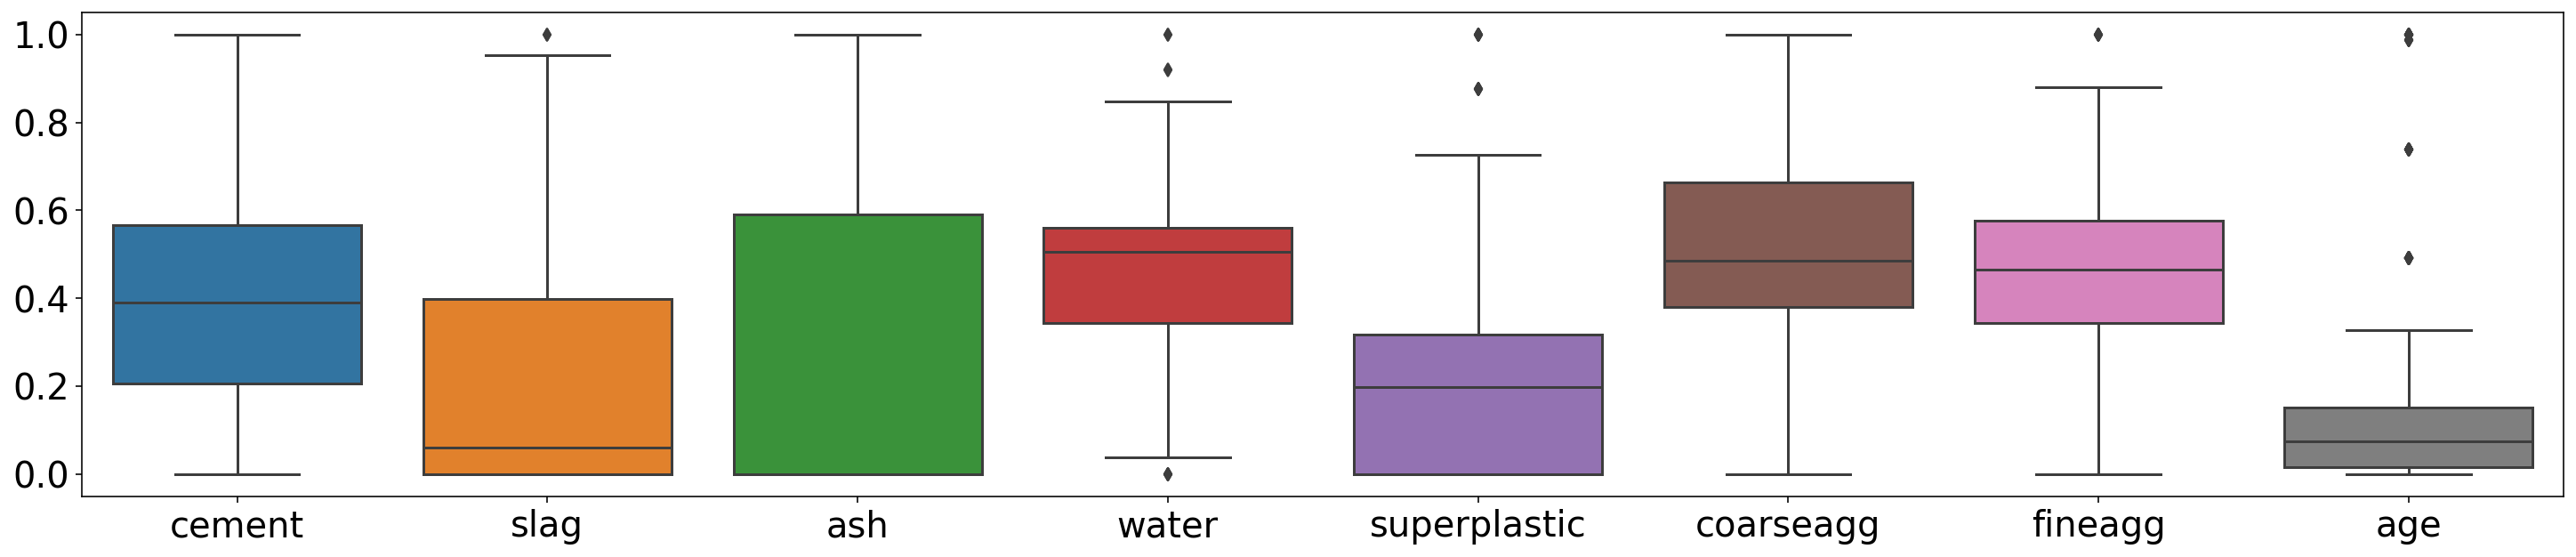

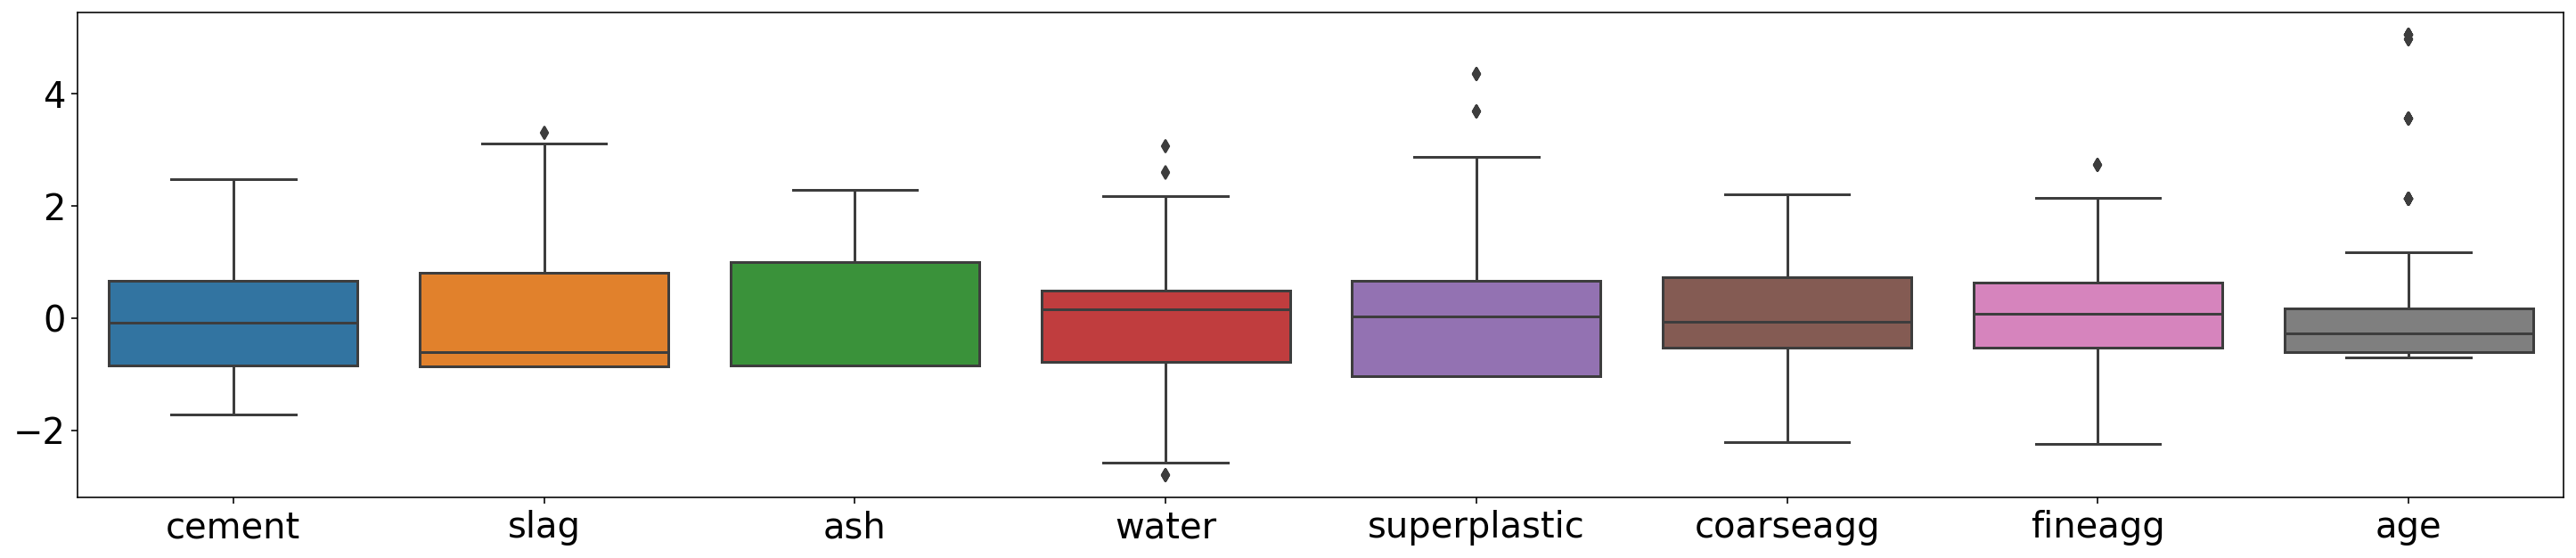

In [14]:
col=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']

#plotting the data magnitude of the baseline

plt.figure(figsize=(25,5))
sns.boxplot(data=df[col]);

#plotting the normalized data

plt.figure(figsize=(25,5))
sns.boxplot(data=df_norm[col]);

#plotting the standardized data

plt.figure(figsize=(25,5))
sns.boxplot(data=df_std[col]);

In [15]:
#importing the data splitting and the regressor from scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [16]:
#splitting the baseline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [17]:
#splitting the standardized data

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.15, random_state=42)

In [18]:
#splitting the normalized data

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.15, random_state=42)

In [19]:
k=[i for i in range(2,30) if i%2!=0]
dist=['euclidean','cosine','manhattan']

The best choice is to use the cosine distance, with a k=3 and a score of 79.66%


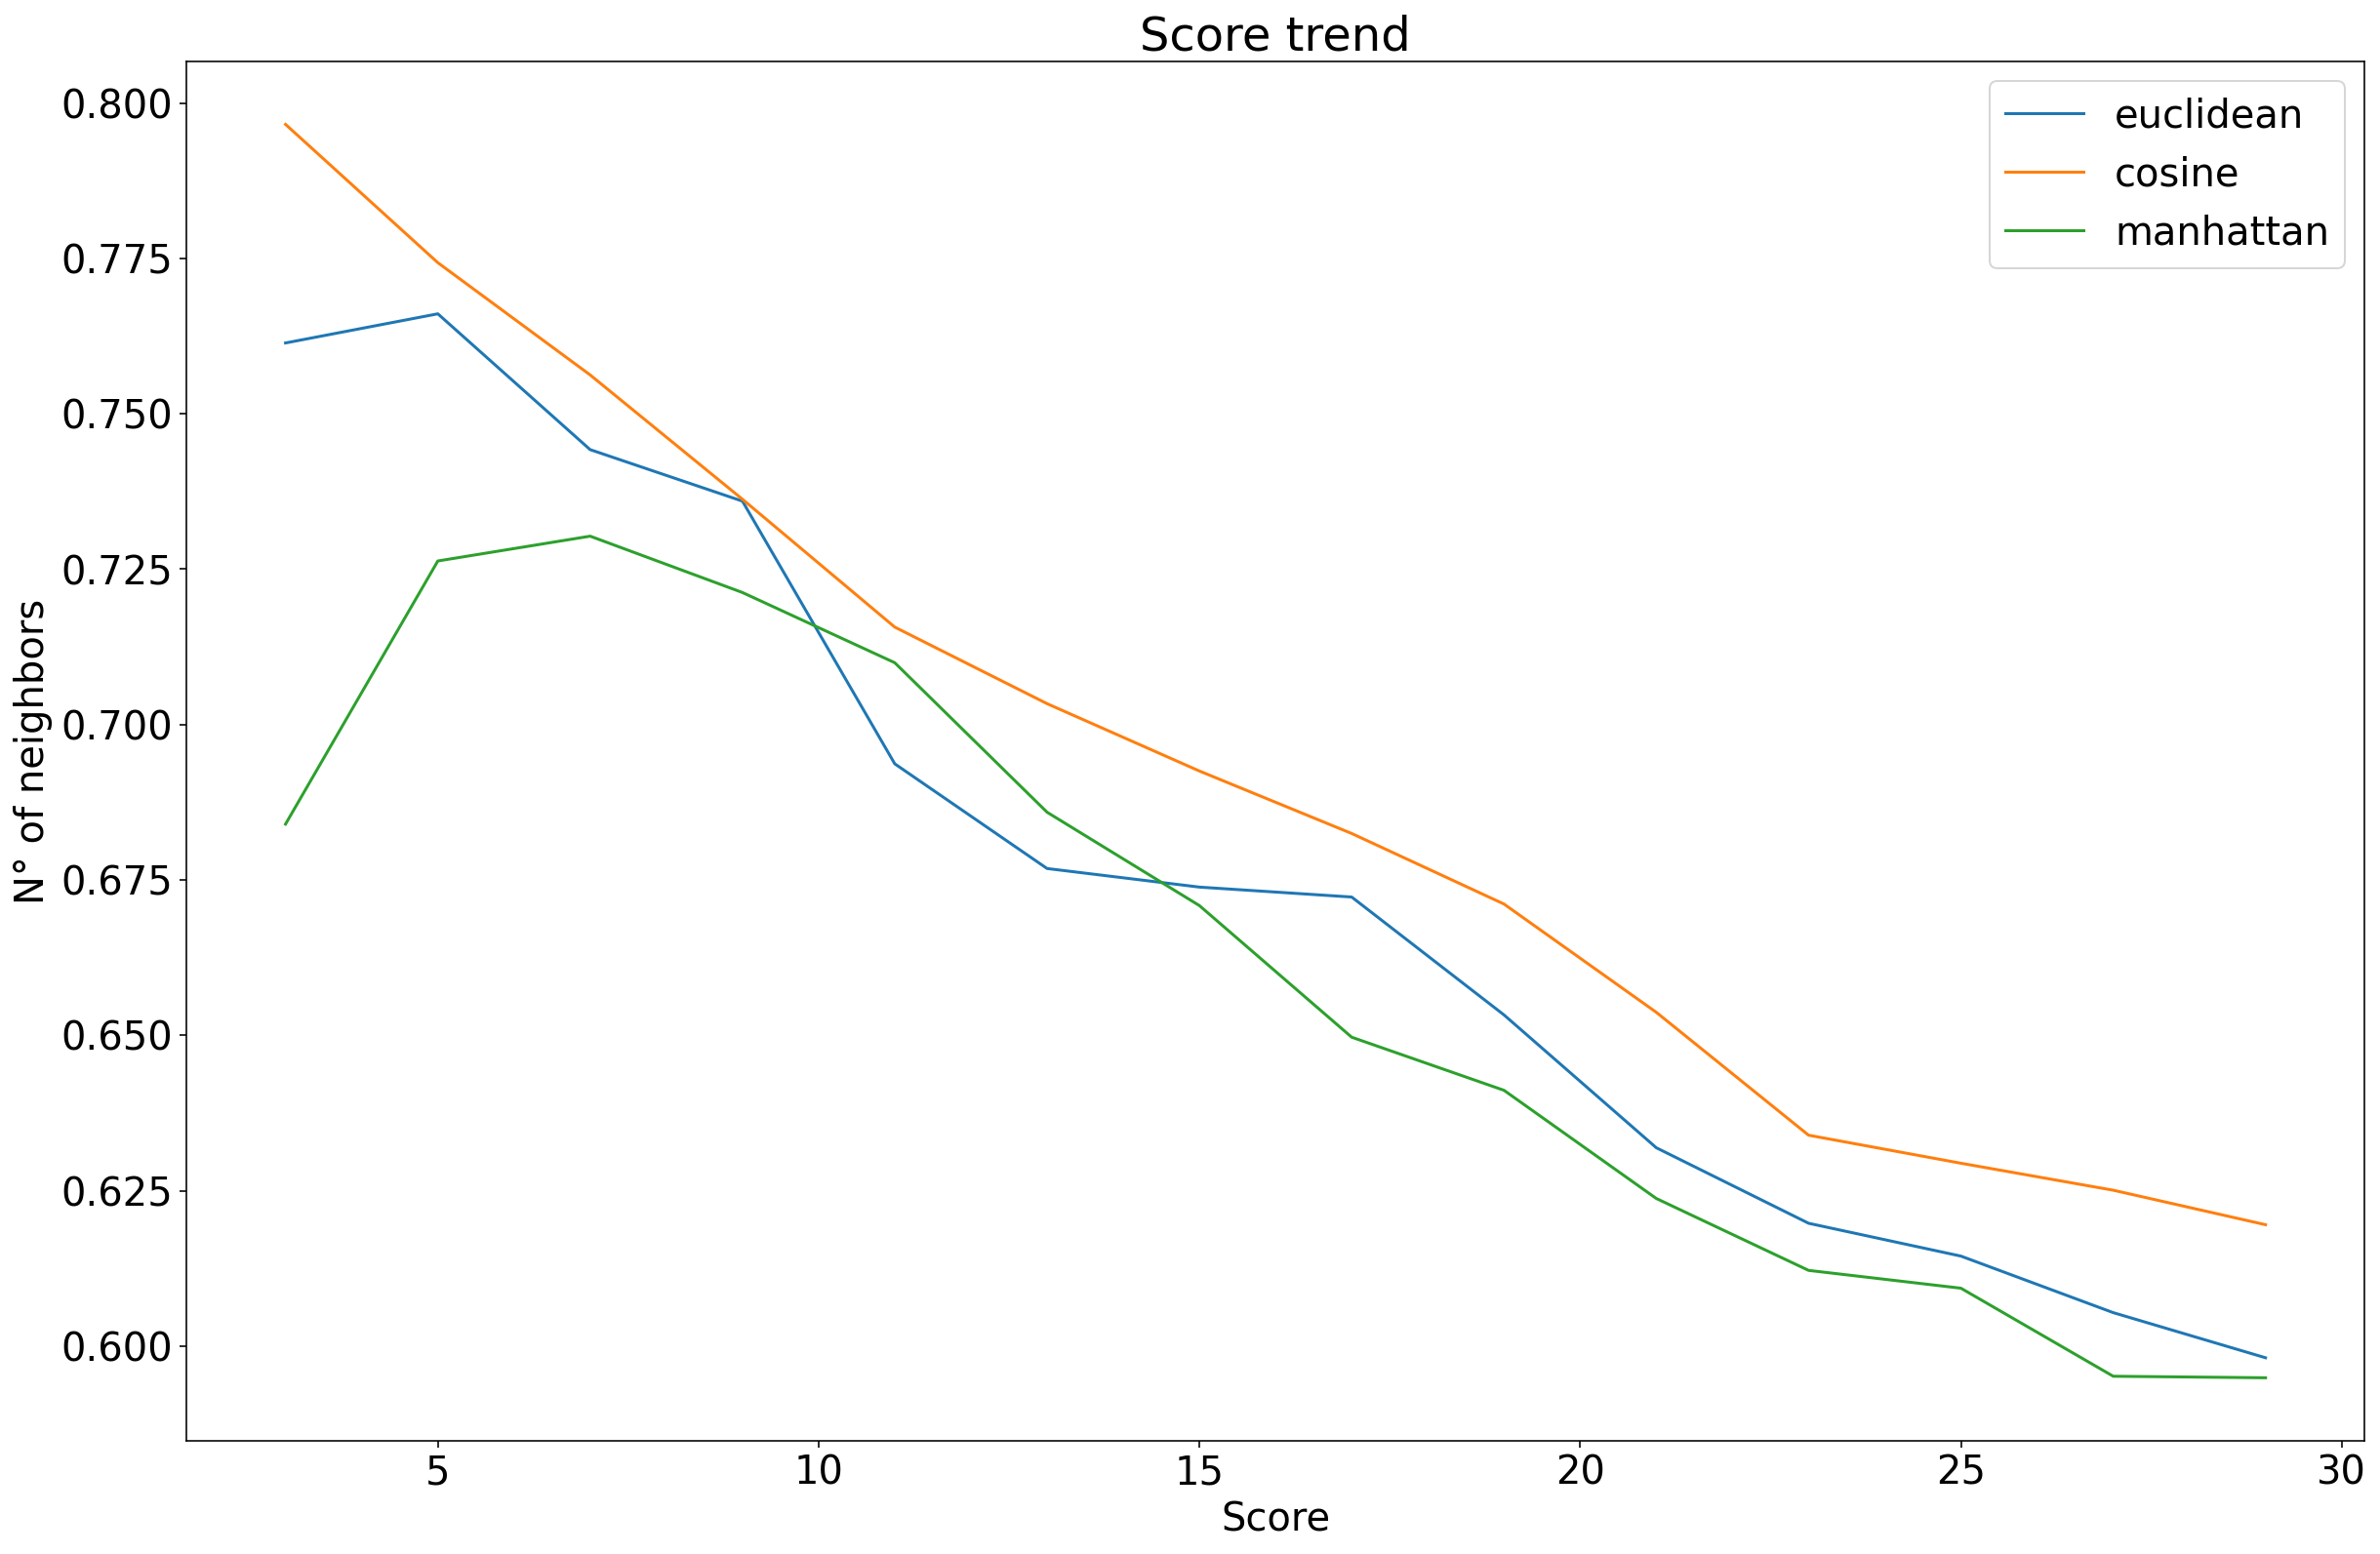

In [20]:
#plotting of the best paramiters for the knn-regressor applied on baseline data

best_scores=[]
best_k=[]
for j in dist:
    scores=[]
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i, metric=j)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test, y_test))
    
    best_scores.append(np.max(scores))
    best_k.append(k[np.argmax(scores)])
    plt.plot(k,scores,label=j)
    
plt.xlabel('Score')  # Add an x-label to the axes.
plt.ylabel('N° of neighbors')  # Add a y-label to the axes.
plt.title("Score trend")
plt.legend()

print(f'The best choice is to use the {dist[np.argmax(best_scores)]} distance, with a k={best_k[np.argmax(best_scores)]} and a score of {np.round(np.max(best_scores)*100,2)}%')

In [21]:
#calculation of different metrics

knn = KNeighborsRegressor(n_neighbors=best_k[np.argmax(best_scores)], metric=dist[np.argmax(best_scores)])
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(f'R2={np.round(knn.score(X_test, y_test),2)*100}%')
rel_err=abs(y_pred-y_test)/y_test
print(f'Relative error= {np.round(np.mean(rel_err),2)*100}%')
ass_err=abs(y_pred-y_test)
print(f'Absolute error= {np.round(np.mean(ass_err),2)}')

R2=80.0%
Relative error= 22.0%
Absolute error= 5.77


The best choice is to use the cosine distance, with a k=5 and a score of 75.42%


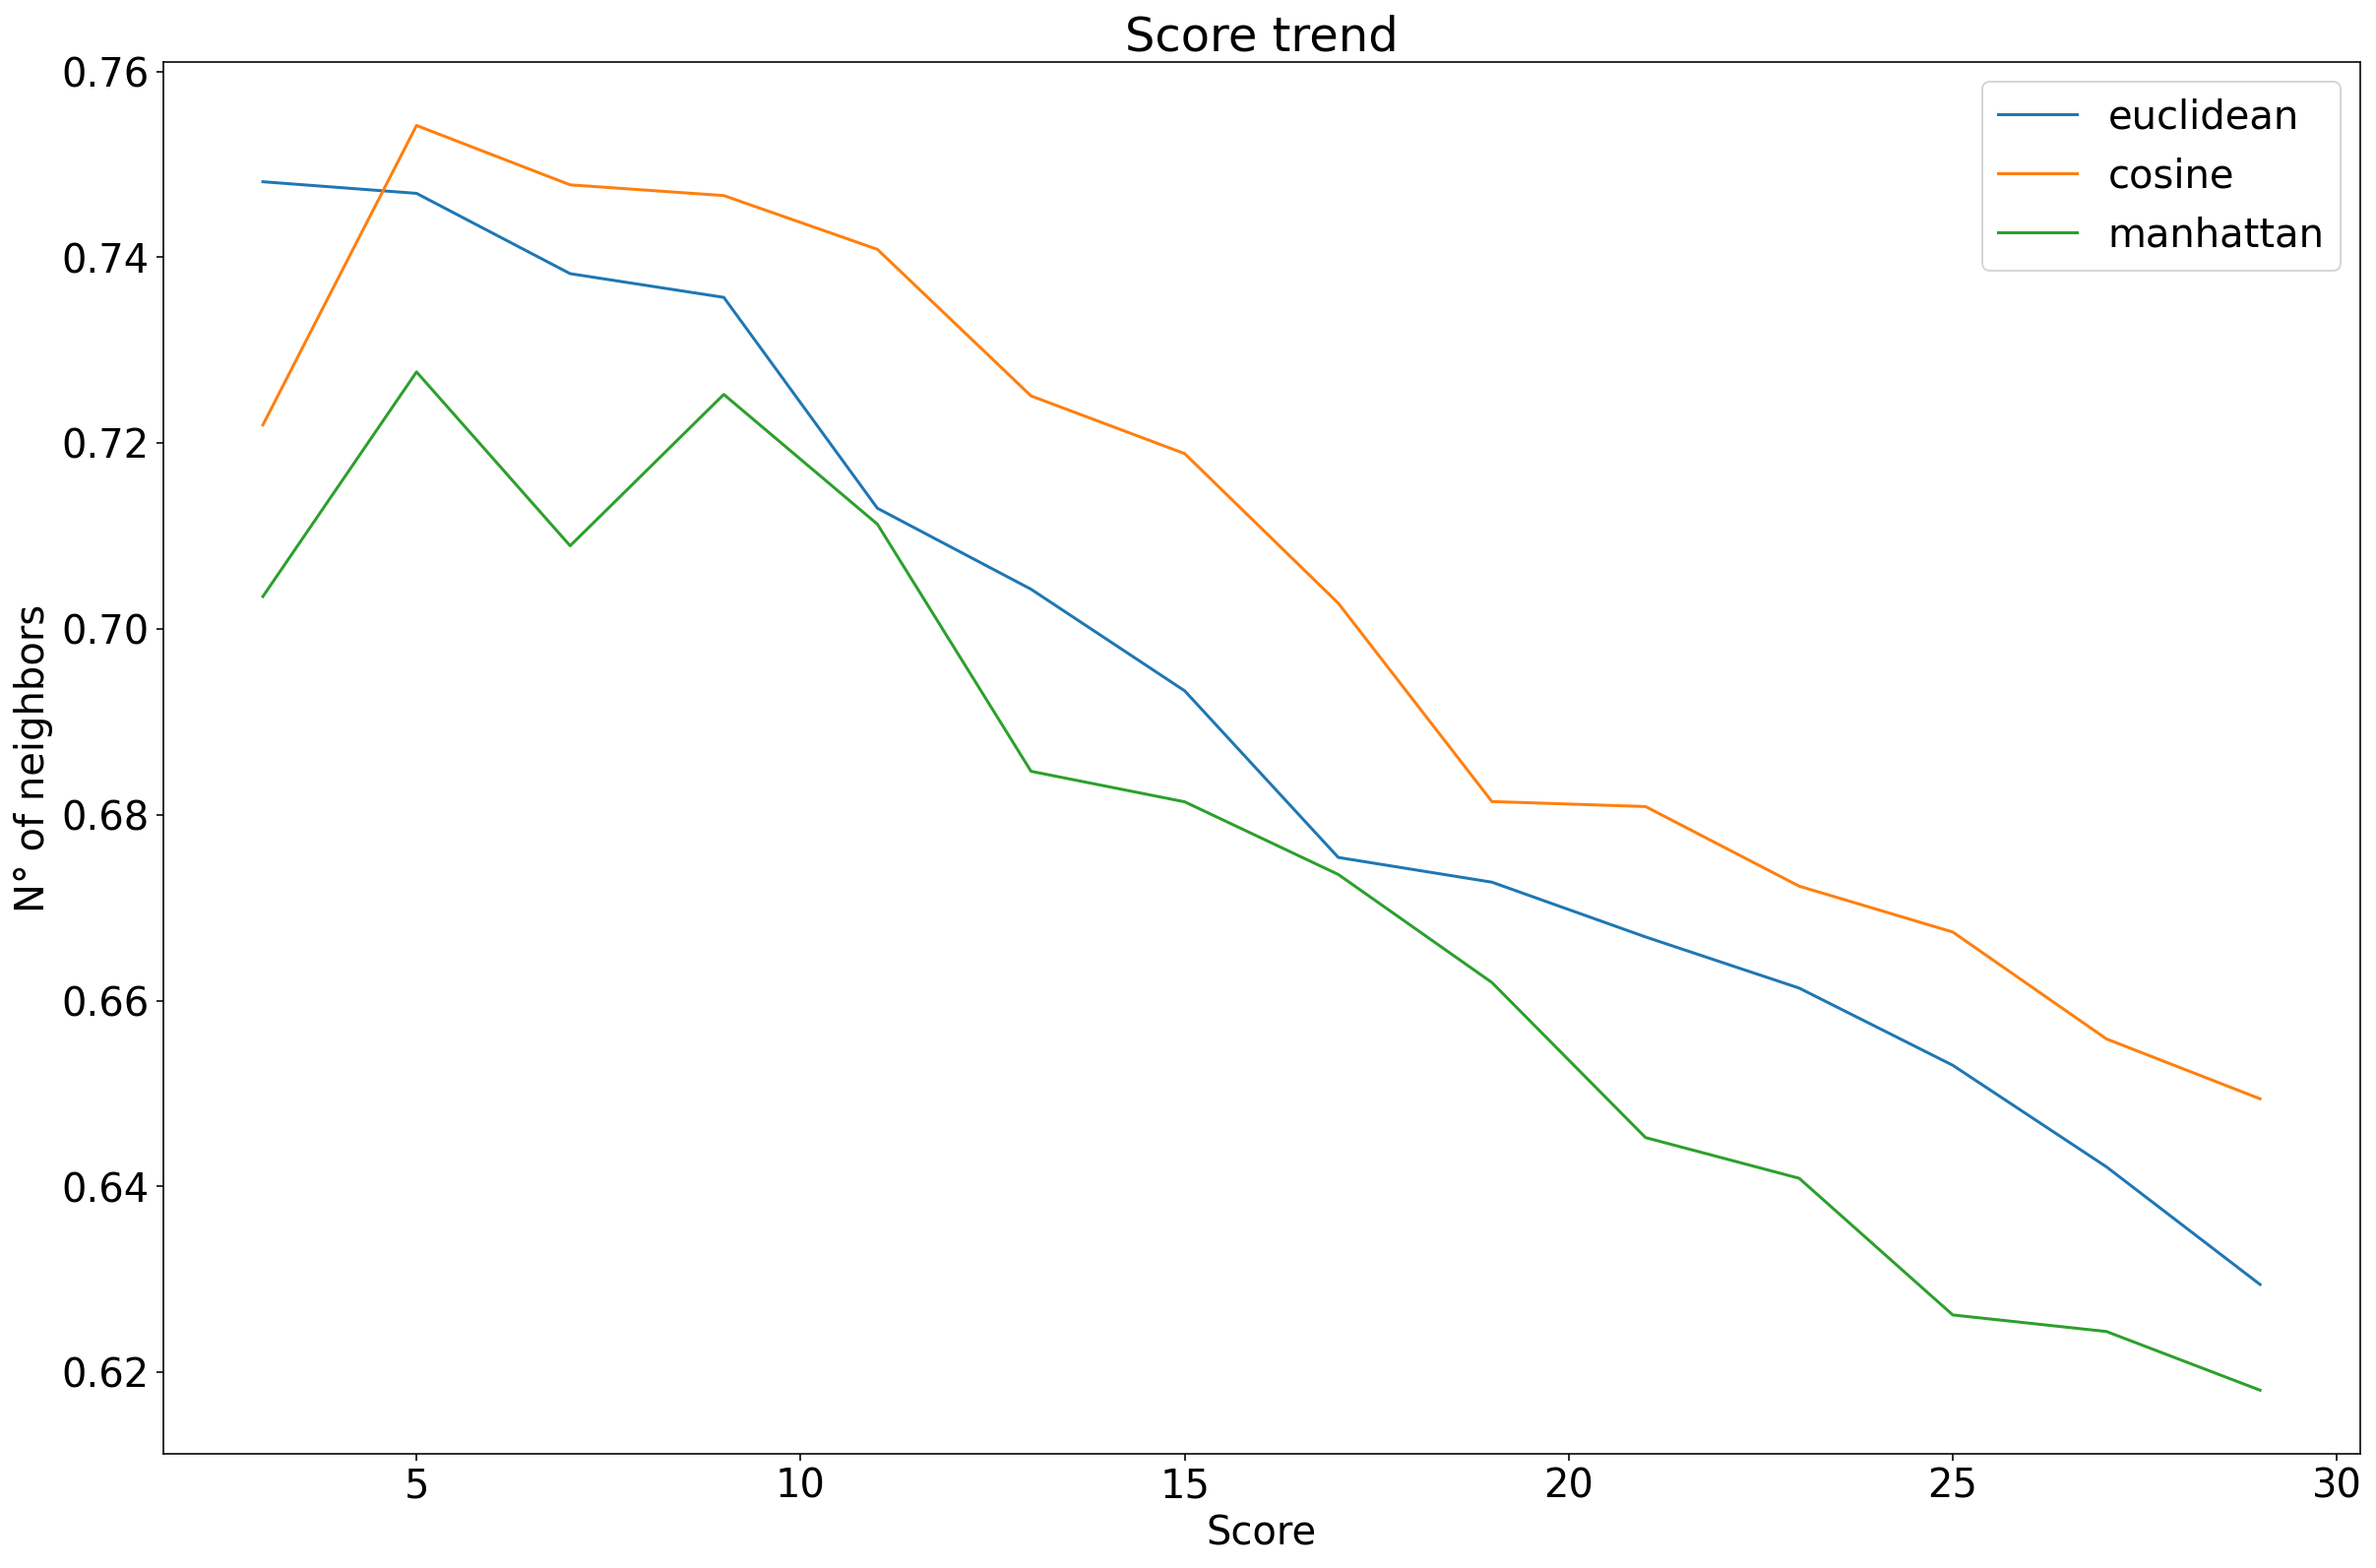

In [22]:
#plotting of the best paramiters for the knn-regressor applied on standardized data

best_scores=[]
best_k=[]
for j in dist:
    scores=[]
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i, metric=j)
        knn.fit(X_train_std,y_train_std)
        scores.append(knn.score(X_test_std, y_test_std))
    best_scores.append(np.max(scores))
    best_k.append(k[np.argmax(scores)])
    plt.plot(k,scores,label=j)
    
plt.xlabel('Score')  # Add an x-label to the axes.
plt.ylabel('N° of neighbors')  # Add a y-label to the axes.
plt.title("Score trend")
plt.legend()

print(f'The best choice is to use the {dist[np.argmax(best_scores)]} distance, with a k={best_k[np.argmax(best_scores)]} and a score of {np.round(np.max(best_scores)*100,2)}%')

In [23]:
#calculation of different error metrics

knn = KNeighborsRegressor(n_neighbors=best_k[np.argmax(best_scores)], metric=dist[np.argmax(best_scores)])
knn.fit(X_train_std,y_train_std)
y_pred_std=knn.predict(X_test_std)
print(f'R2={np.round(knn.score(X_test_std, y_test_std),2)*100}%')
rel_err_std=abs(y_pred_std-y_test_std)/y_test_std
print(f'Relative error= {np.round(np.mean(rel_err_std),2)*100}%')
ass_err_std=abs(y_pred_std-y_test_std)
print(f'Absolute error= {np.round(np.mean(ass_err_std),2)}')

R2=75.0%
Relative error= 25.0%
Absolute error= 6.59


The best choice is to use the cosine distance, with a k=3 and a score of 75.99%


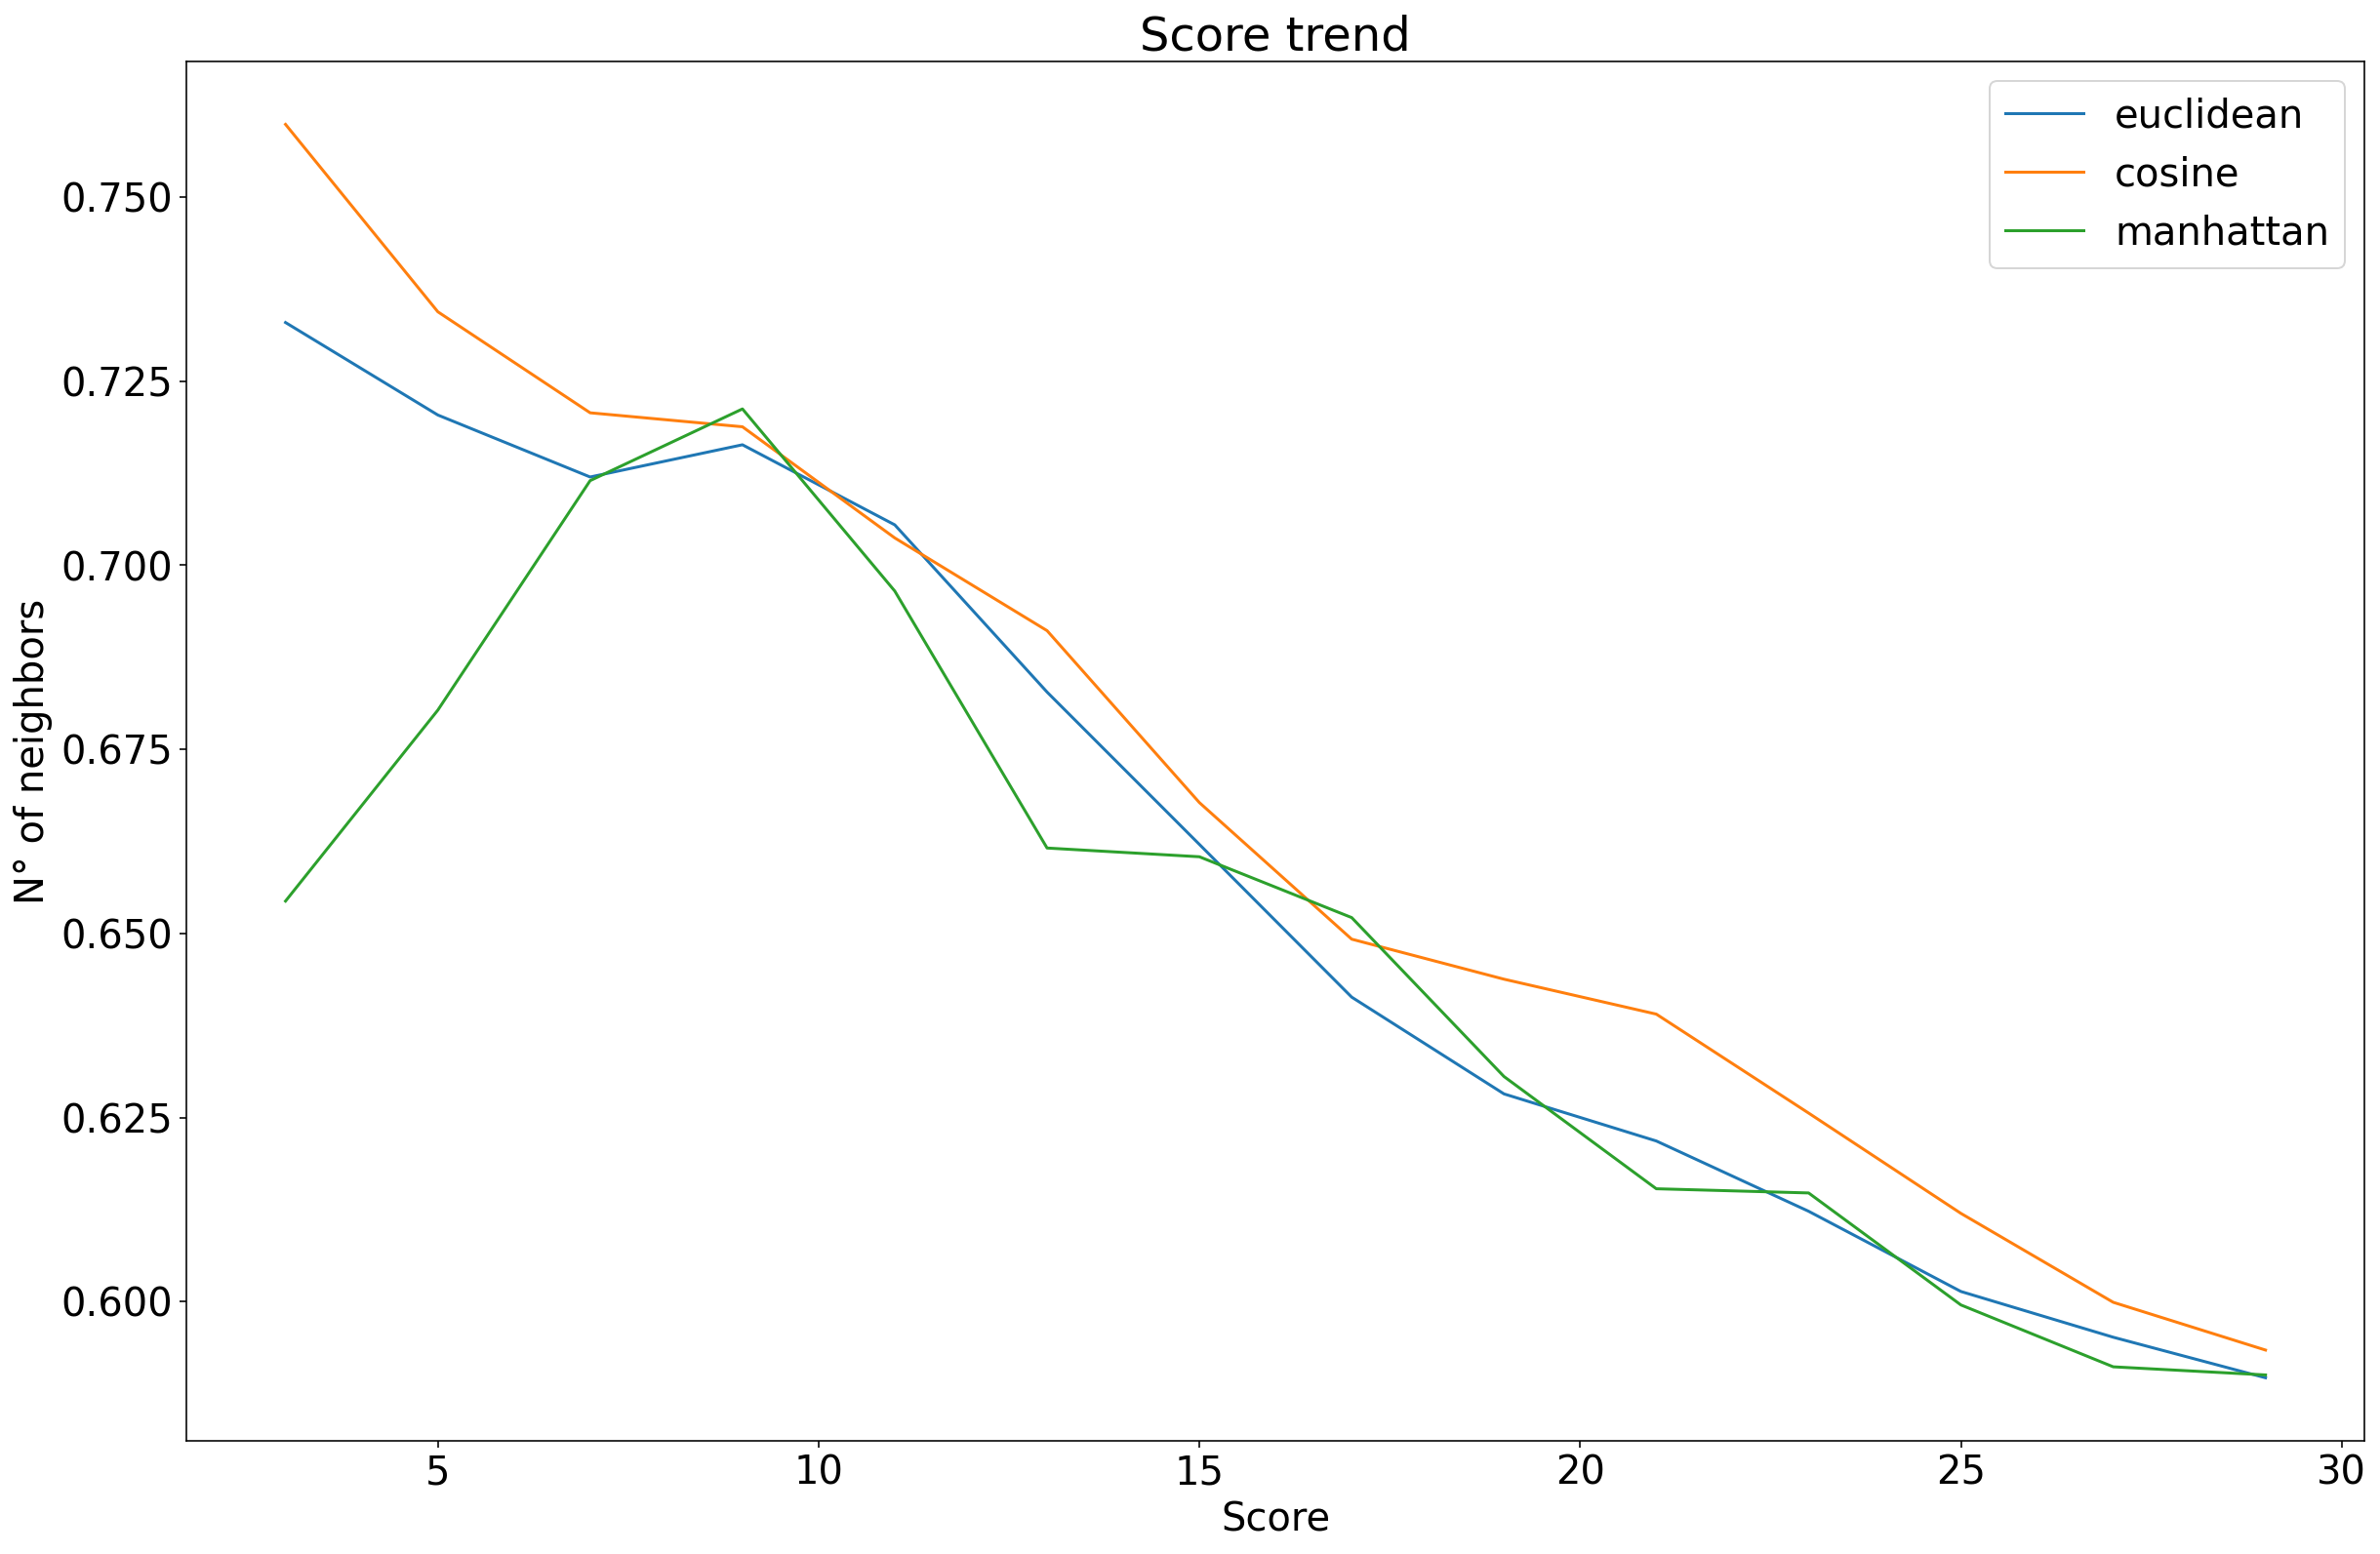

In [24]:
#plotting of the best paramiters for the knn-regressor applied on standardized data

best_scores=[]
best_k=[]
for j in dist:
    scores=[]
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i, metric=j)
        knn.fit(X_train_norm,y_train_norm)
        scores.append(knn.score(X_test_norm, y_test_norm))
        
    best_scores.append(np.max(scores))
    best_k.append(k[np.argmax(scores)])
    plt.plot(k,scores,label=j)
    
plt.xlabel('Score')  # Add an x-label to the axes.
plt.ylabel('N° of neighbors')  # Add a y-label to the axes.
plt.title("Score trend")
plt.legend()

print(f'The best choice is to use the {dist[np.argmax(best_scores)]} distance, with a k={best_k[np.argmax(best_scores)]} and a score of {np.round(np.max(best_scores)*100,2)}%')

In [25]:
#calculation of different error metrics

knn = KNeighborsRegressor(n_neighbors=best_k[np.argmax(best_scores)], metric=dist[np.argmax(best_scores)])
knn.fit(X_train_norm,y_train_norm)
y_pred_norm=knn.predict(X_test_norm)
print(f'R2={np.round(knn.score(X_test_norm, y_test_norm),2)*100}%')
rel_err_norm=abs(y_pred_norm-y_test_norm)/y_test_norm
print(f'Relative error= {np.round(np.mean(rel_err_norm),2)*100}%')
ass_err_norm=abs(y_pred_norm-y_test_norm)
print(f'Absolute error= {np.round(np.mean(ass_err_norm),2)}')

R2=76.0%
Relative error= 24.0%
Absolute error= 6.22


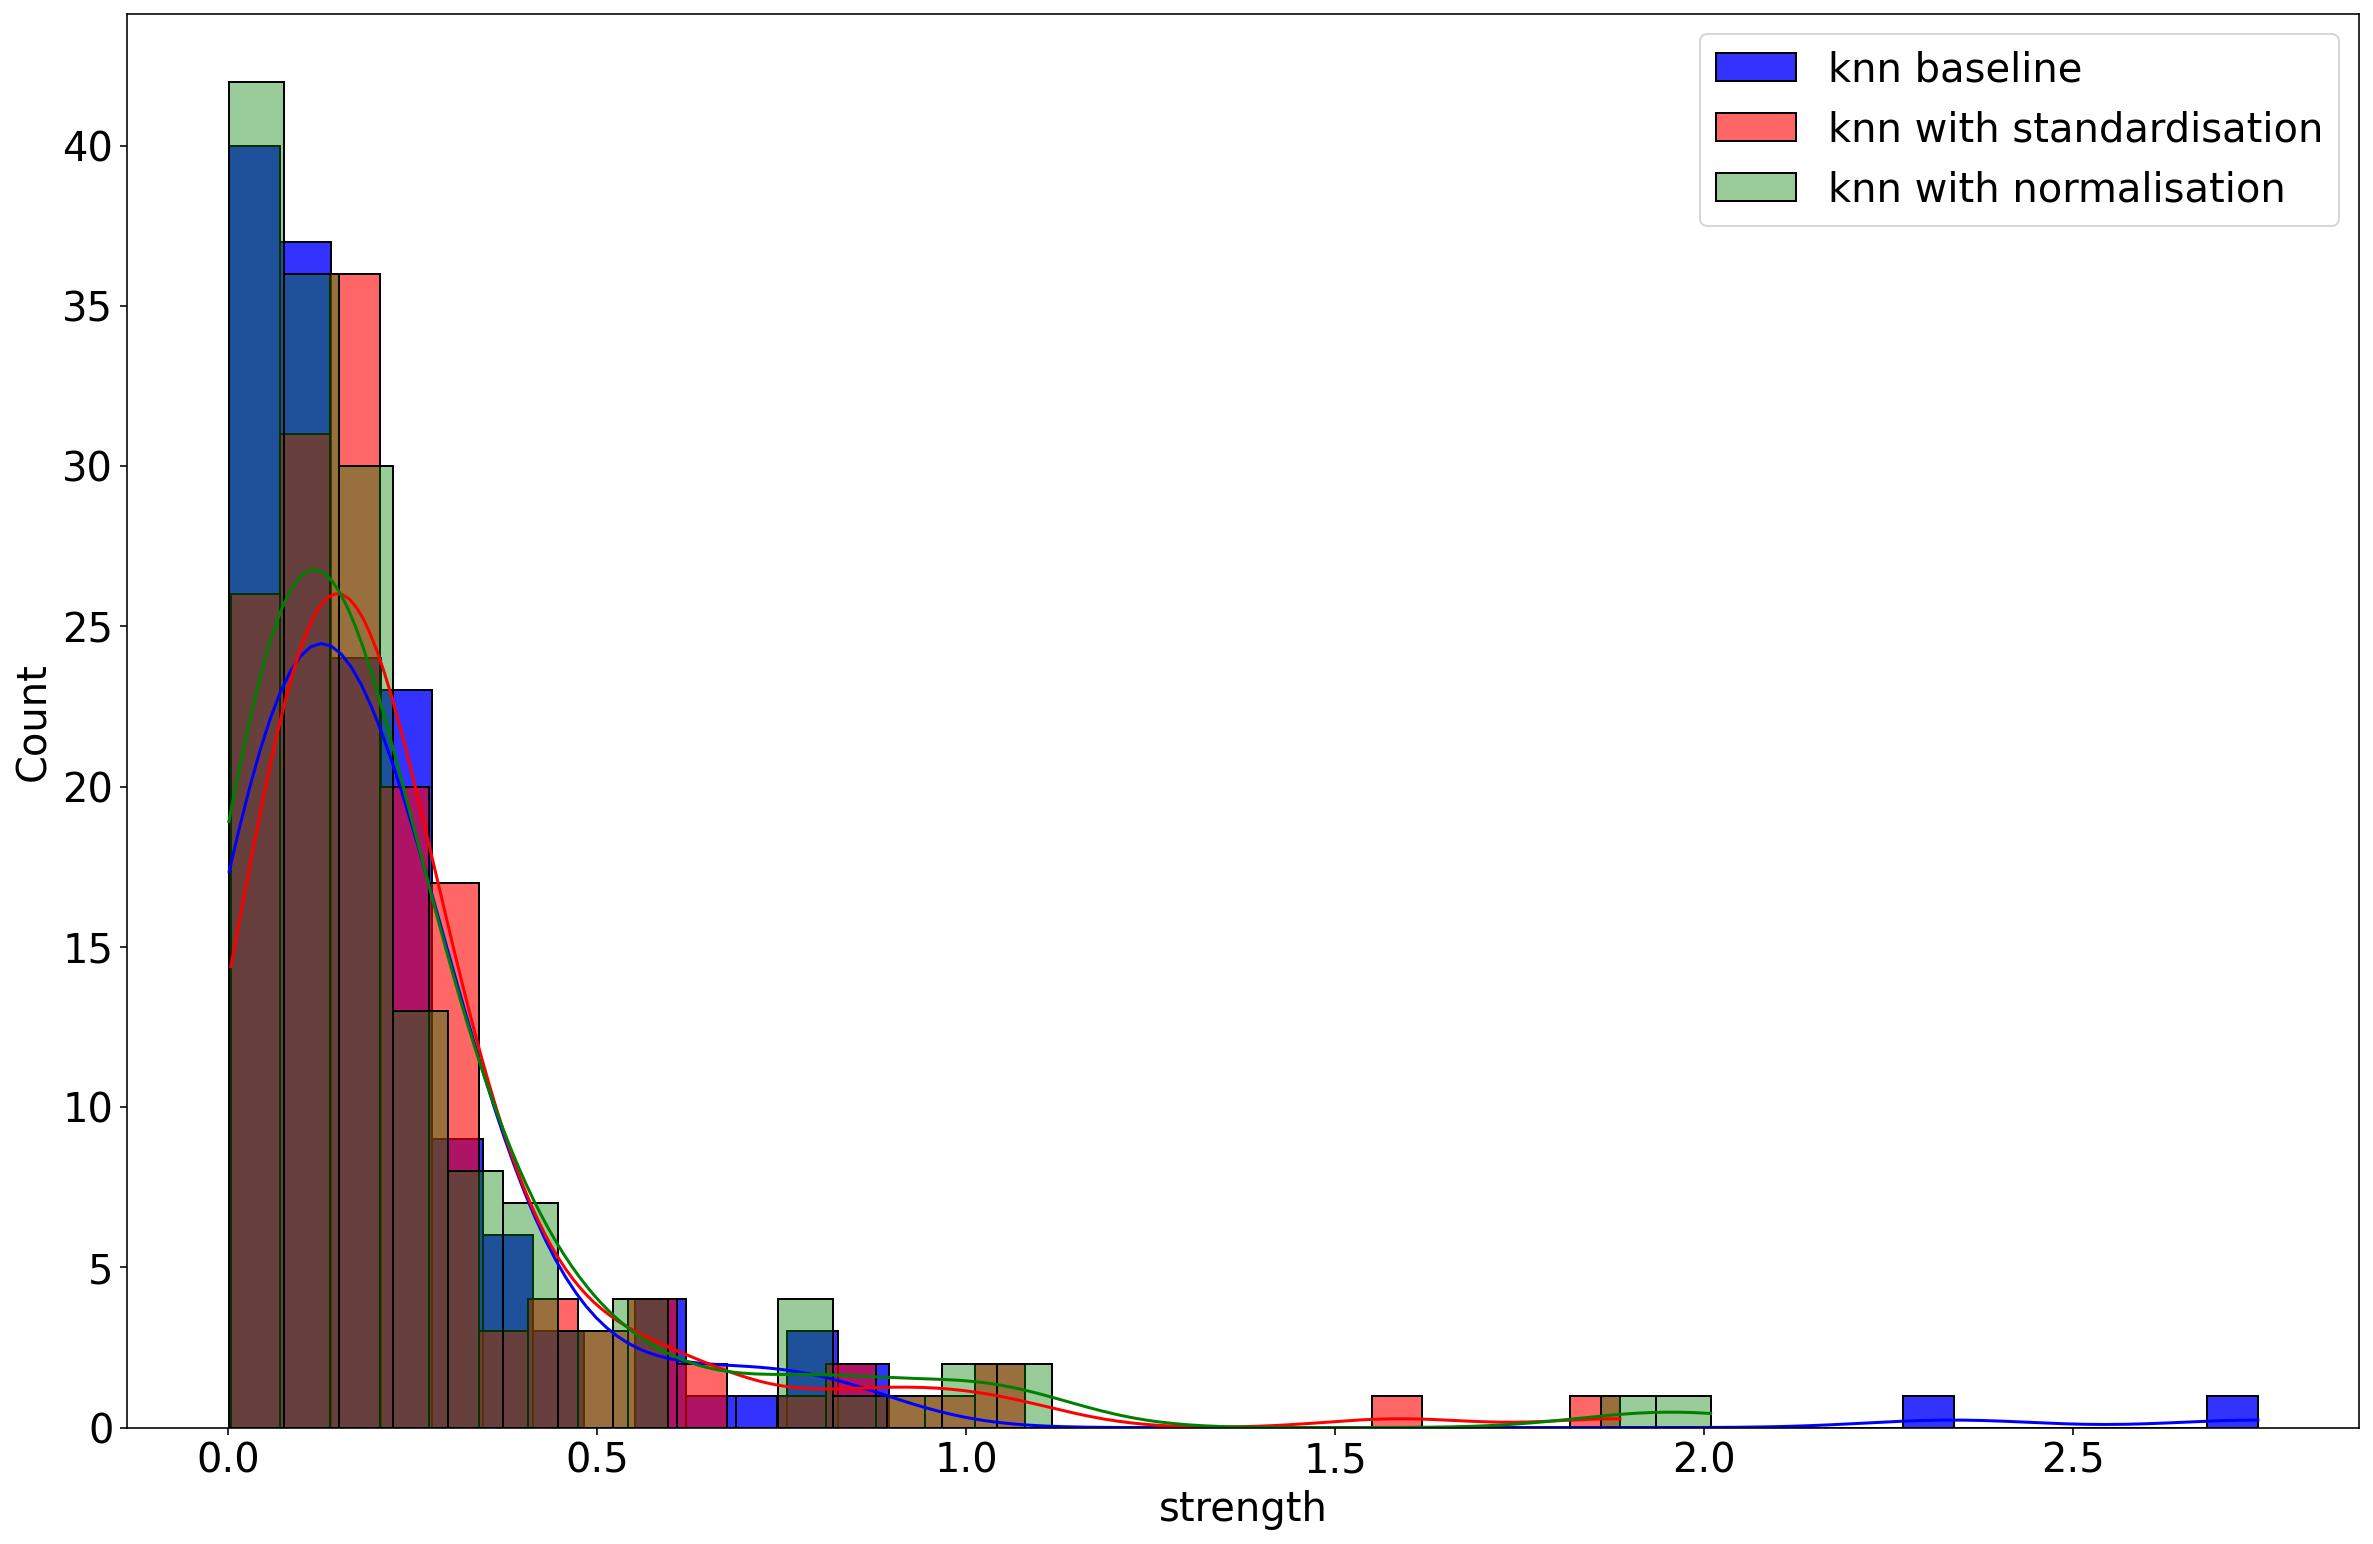

In [26]:
#plotting the relative error of the three models

c = np.random.uniform(0,0.5,3)

sns.histplot(rel_err, alpha = 0.8, label = 'knn baseline', kde = True, color = 'b' )
sns.histplot(rel_err_std, alpha = 0.6, label = 'knn with standardisation', kde = True, color = 'r')
sns.histplot(rel_err_norm, alpha = 0.4, label = 'knn with normalisation', kde = True, color = 'g')

#plt.xlim(-0.6, 1.2)
plt.legend()

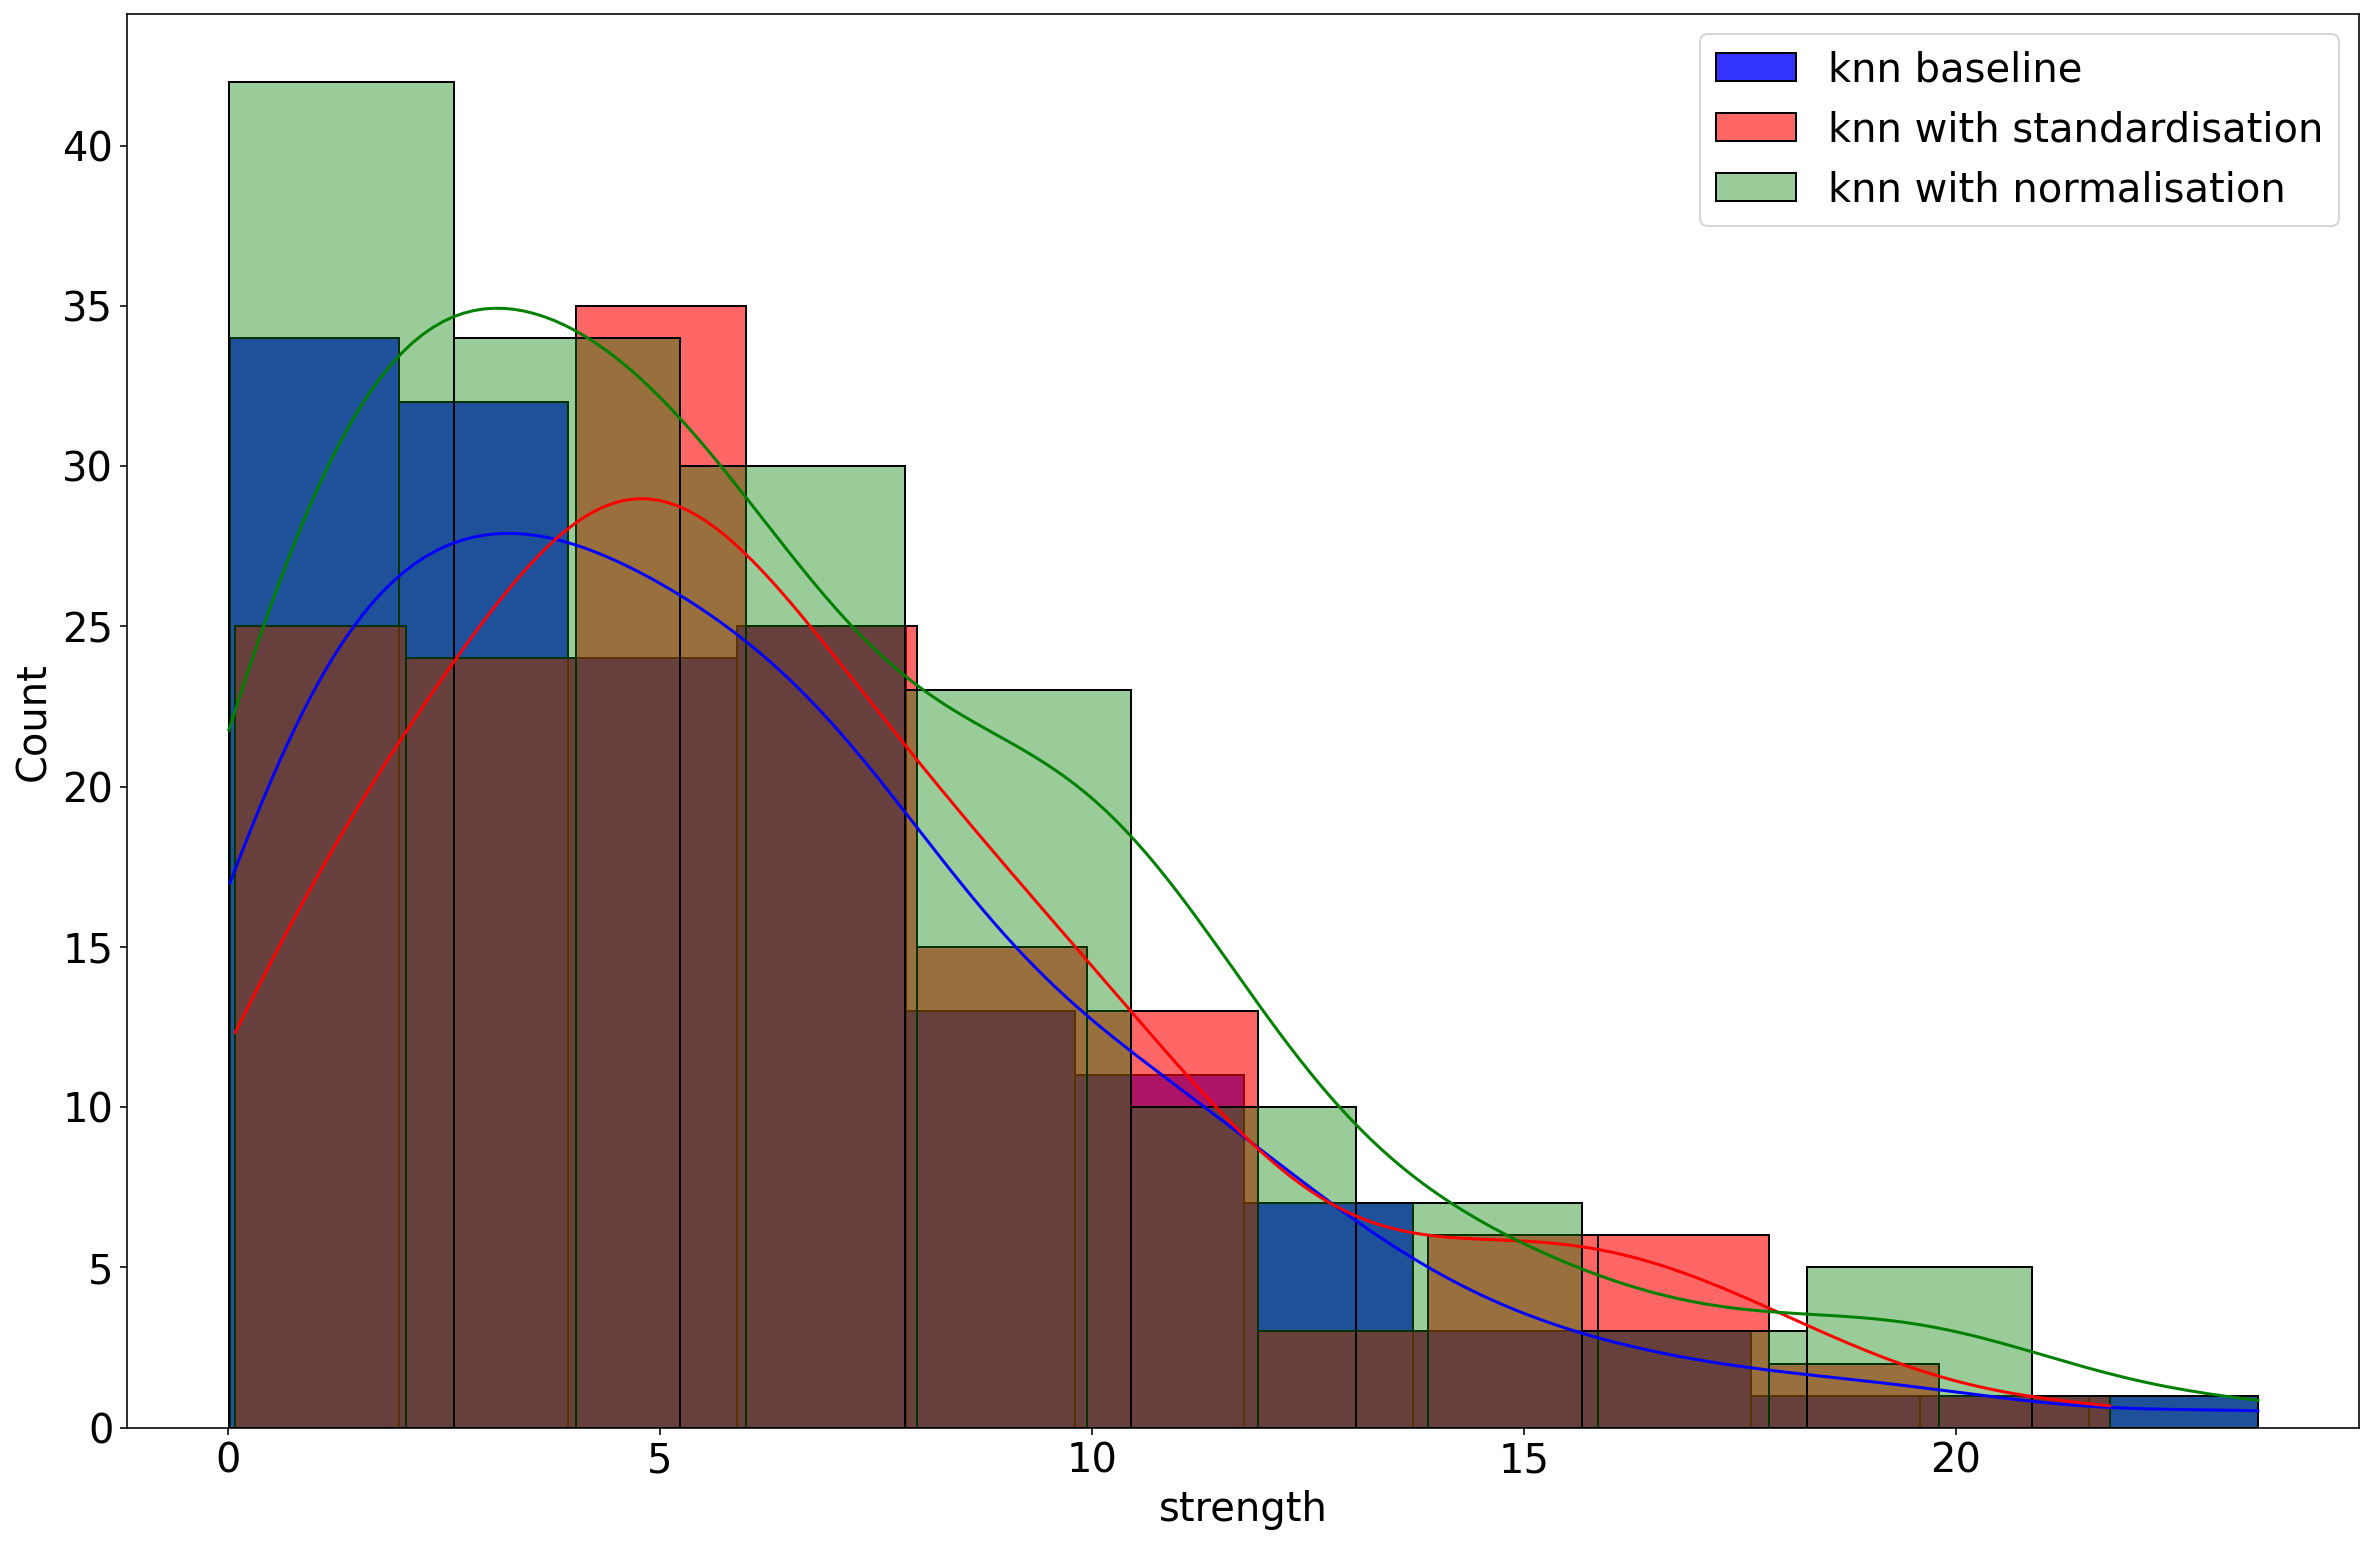

In [27]:
#plotting the absolute error of the three models

c = np.random.uniform(0,0.5,3)

sns.histplot(ass_err, alpha = 0.8, label = 'knn baseline', kde = True, color = 'b' )
sns.histplot(ass_err_std, alpha = 0.6, label = 'knn with standardisation', kde = True, color = 'r')
sns.histplot(ass_err_norm, alpha = 0.4, label = 'knn with normalisation', kde = True, color = 'g')

#plt.xlim(-0.6, 1.2)
plt.legend()

From the calculations done on the three models, resulted that the baseline model is the one with the highest score an the lowest errors. So the scaling operations were not useful to increase the precision of the model.

In [28]:
#printing of the correlations

corr=df.corr().strength[:-1]
corr

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
Name: strength, dtype: float64

Now I try to modify the feature by adding a column corresponding to the weighted sum with the correlations for all the previous models 

In [29]:
df_corr=X*corr
df_corr['New']=df_corr.cement+df_corr.slag+df_corr.ash+df_corr.water+df_corr.superplastic+df_corr.coarseagg+df_corr.fineagg+df_corr.age
df_corr['strenght']=y

In [30]:
df_corr_std=df_std*corr
df_corr_std['New']=df_corr_std.cement+df_corr_std.slag+df_corr_std.ash+df_corr_std.water+df_corr_std.superplastic+df_corr_std.coarseagg+df_corr_std.fineagg+df_corr_std.age
df_corr_std['strenght']=y

In [31]:
df_corr_norm=df_norm*corr
df_corr_norm['New']=df_corr_norm.cement+df_corr_norm.slag+df_corr_norm.ash+df_corr_norm.water+df_corr_norm.superplastic+df_corr_norm.coarseagg+df_corr_norm.fineagg+df_corr_norm.age
df_corr_norm['strenght']=y

In [32]:
#calculation of the best paramiters for the baseline with the new data

X_corr = df_corr[df_corr.columns[0:-1]].values
y_corr = df_corr[df_corr.columns[-1]].values
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.15, random_state=42)

scores=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(X_train_corr,y_train_corr)
    scores.append(knn.score(X_test_corr, y_test_corr))
print(f"The best choice for k is {k[np.argmax(scores)]}, with a score of {np.round(np.max(scores)*100,2)}%") 

The best choice for k is 5, with a score of 74.82%


In [33]:
knn = KNeighborsRegressor(n_neighbors=k[np.argmax(scores)], metric='cosine')
knn.fit(X_train_corr,y_train_corr)
y_pred_corr=knn.predict(X_test_corr)
print(f'R2={np.round(knn.score(X_test_corr, y_test_corr),2)*100}%')
rel_err_corr=abs(y_pred_corr-y_test_corr)/y_test_corr
print(f'Relative error= {np.round(np.mean(rel_err_corr),2)*100}%')
ass_err_corr=abs(y_pred_corr-y_test_corr)
print(f'Absolute error= {np.round(np.mean(ass_err_corr),2)}')

R2=75.0%
Relative error= 27.0%
Absolute error= 6.55


With the baseline there is a decrease in the precision the R2 drecreased form 80% to 75%, the relative error increased from 22% to 27% and the absolute errore increased from 5.77 to 6.55

In [34]:
#calculation of the best paramiters for the standardized data

X_corr_std = df_corr_std[df_corr_std.columns[0:-1]].values
y_corr_std = df_corr_std[df_corr_std.columns[-1]].values

X_train_corr_std, X_test_corr_std, y_train_corr_std, y_test_corr_std = train_test_split(X_corr_std, y_corr_std, test_size=0.15, random_state=42)

scores=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(X_train_corr_std,y_train_corr_std)
    scores.append(knn.score(X_test_corr_std, y_test_corr_std))
print(f"The best choice for k is {k[np.argmax(scores)]}, with a score of {np.round(np.max(scores)*100,2)}%") 

The best choice for k is 7, with a score of 79.79%


In [35]:
knn = KNeighborsRegressor(n_neighbors=k[np.argmax(scores)], metric='cosine')
knn.fit(X_train_corr_std,y_train_corr_std)
y_pred_corr_std=knn.predict(X_test_corr_std)
print(f'R2={np.round(knn.score(X_test_corr_std, y_test_corr_std),2)*100}%')
rel_err_corr_std=abs(y_pred_corr_std-y_test_corr_std)/y_test_corr_std
print(f'Relative error= {np.round(np.mean(rel_err_corr_std),2)*100}%')
ass_err_corr_std=abs(y_pred_corr_std-y_test_corr_std)
print(f'Absolute error= {np.round(np.mean(ass_err_corr_std),2)}')

R2=80.0%
Relative error= 23.0%
Absolute error= 5.97


With the standadized data there is a increase in the precision the R2 increased form 75% to 80%, the relative error decreased from 25% to 23% and the absolute errore decreased from 6.59 to 5.97

In [36]:
#calculation of the best paramiters for the normalized data

X_corr_norm = df_corr_norm[df_corr_norm.columns[0:-1]].values
y_corr_norm = df_corr_norm[df_corr_norm.columns[-1]].values
X_train_corr_norm, X_test_corr_norm, y_train_corr_norm, y_test_corr_norm = train_test_split(X_corr_norm, y_corr_norm, test_size=0.15, random_state=42)

scores=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(X_train_corr_norm,y_train_corr_norm)
    scores.append(knn.score(X_test_corr_norm, y_test_corr_norm))
print(f"The best choice for k is {k[np.argmax(scores)]}, with a score of {np.round(np.max(scores)*100,2)}%")    

The best choice for k is 7, with a score of 78.02%


In [37]:
knn = KNeighborsRegressor(n_neighbors=k[np.argmax(scores)], metric='cosine')
knn.fit(X_train_corr_norm,y_train_corr_norm)
y_pred_corr_norm=knn.predict(X_test_corr_norm)
print(f'R2={np.round(knn.score(X_test_corr_norm, y_test_corr_norm),2)*100}%')
rel_err_corr_norm=abs(y_pred_corr_norm-y_test_corr_norm)/y_test_corr_norm
print(f'Relative error= {np.round(np.mean(rel_err_corr_norm),2)*100}%')
ass_err_corr_norm=abs(y_pred_corr_norm-y_test_corr_norm)
print(f'Absolute error= {np.round(np.mean(ass_err_corr_norm),2)}')

R2=78.0%
Relative error= 24.0%
Absolute error= 6.22


With the normalized data there is a increase in the precision the R2 increased form 76% to 78%, the relative error  and the absolute error didn't change. So no visible improvements

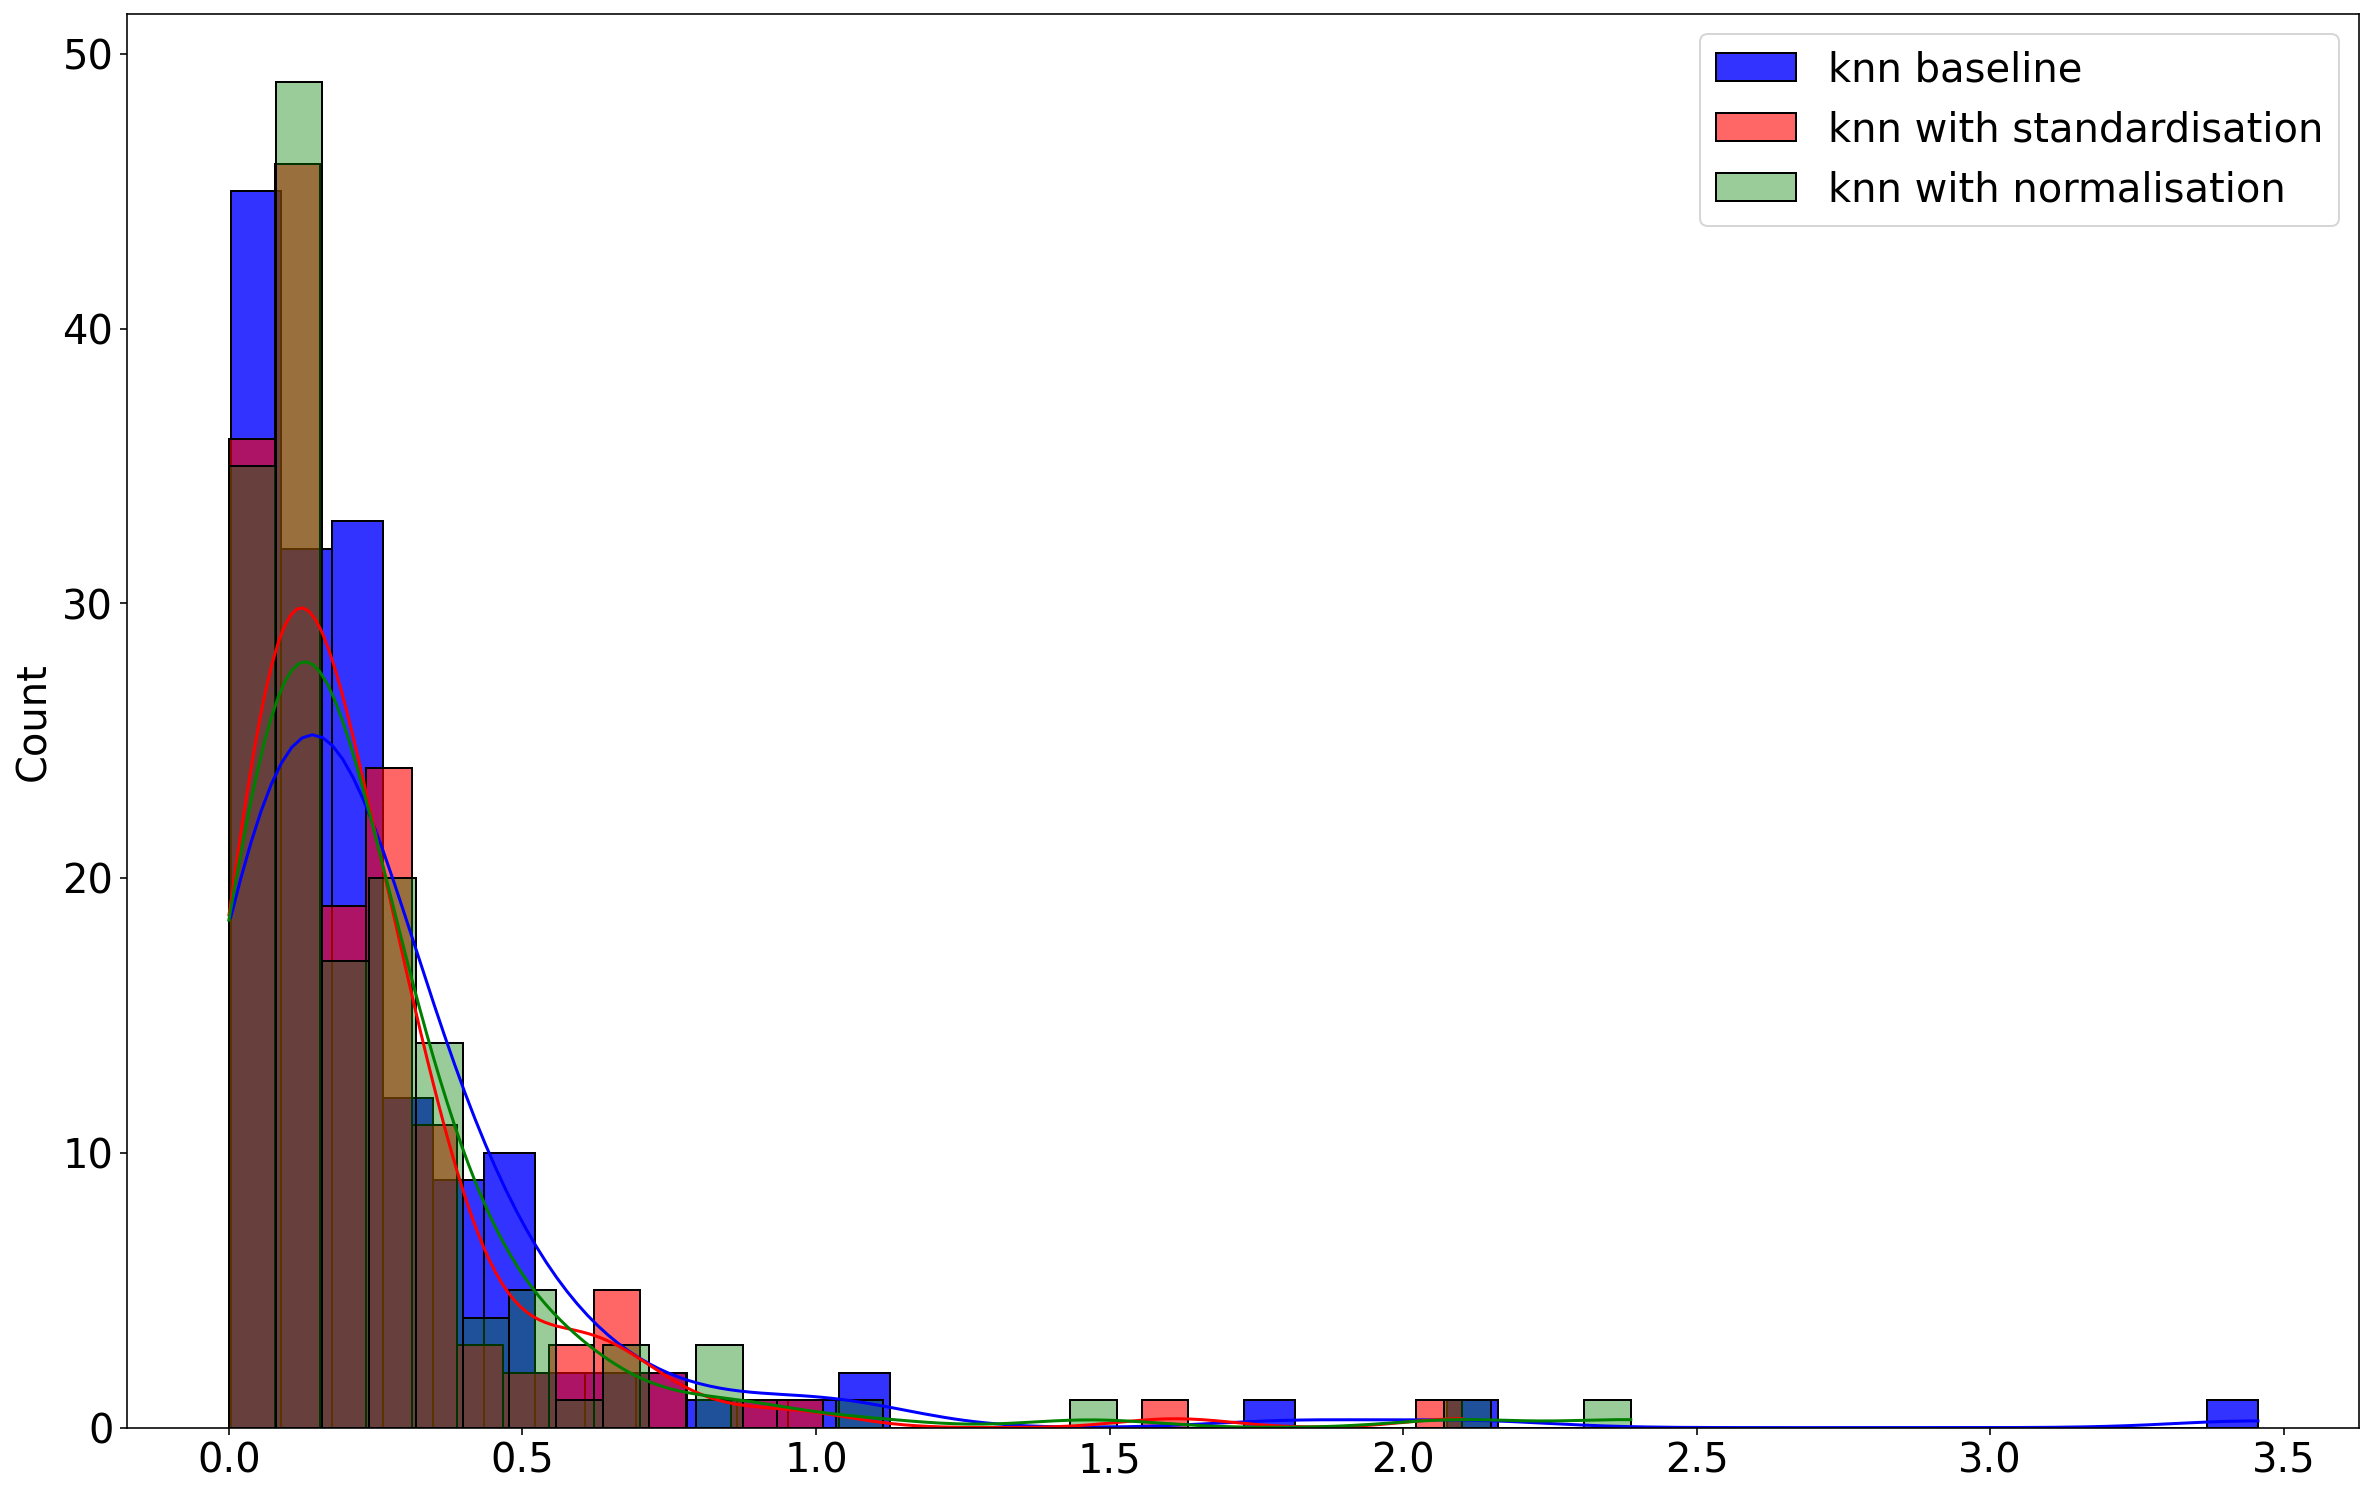

In [38]:
#plotting the relative error of the three models

c = np.random.uniform(0,0.5,3)

sns.histplot(rel_err_corr, alpha = 0.8, label = 'knn baseline', kde = True, color = 'b' )
sns.histplot(rel_err_corr_std, alpha = 0.6, label = 'knn with standardisation', kde = True, color = 'r')
sns.histplot(rel_err_corr_norm, alpha = 0.4, label = 'knn with normalisation', kde = True, color = 'g')

plt.legend()

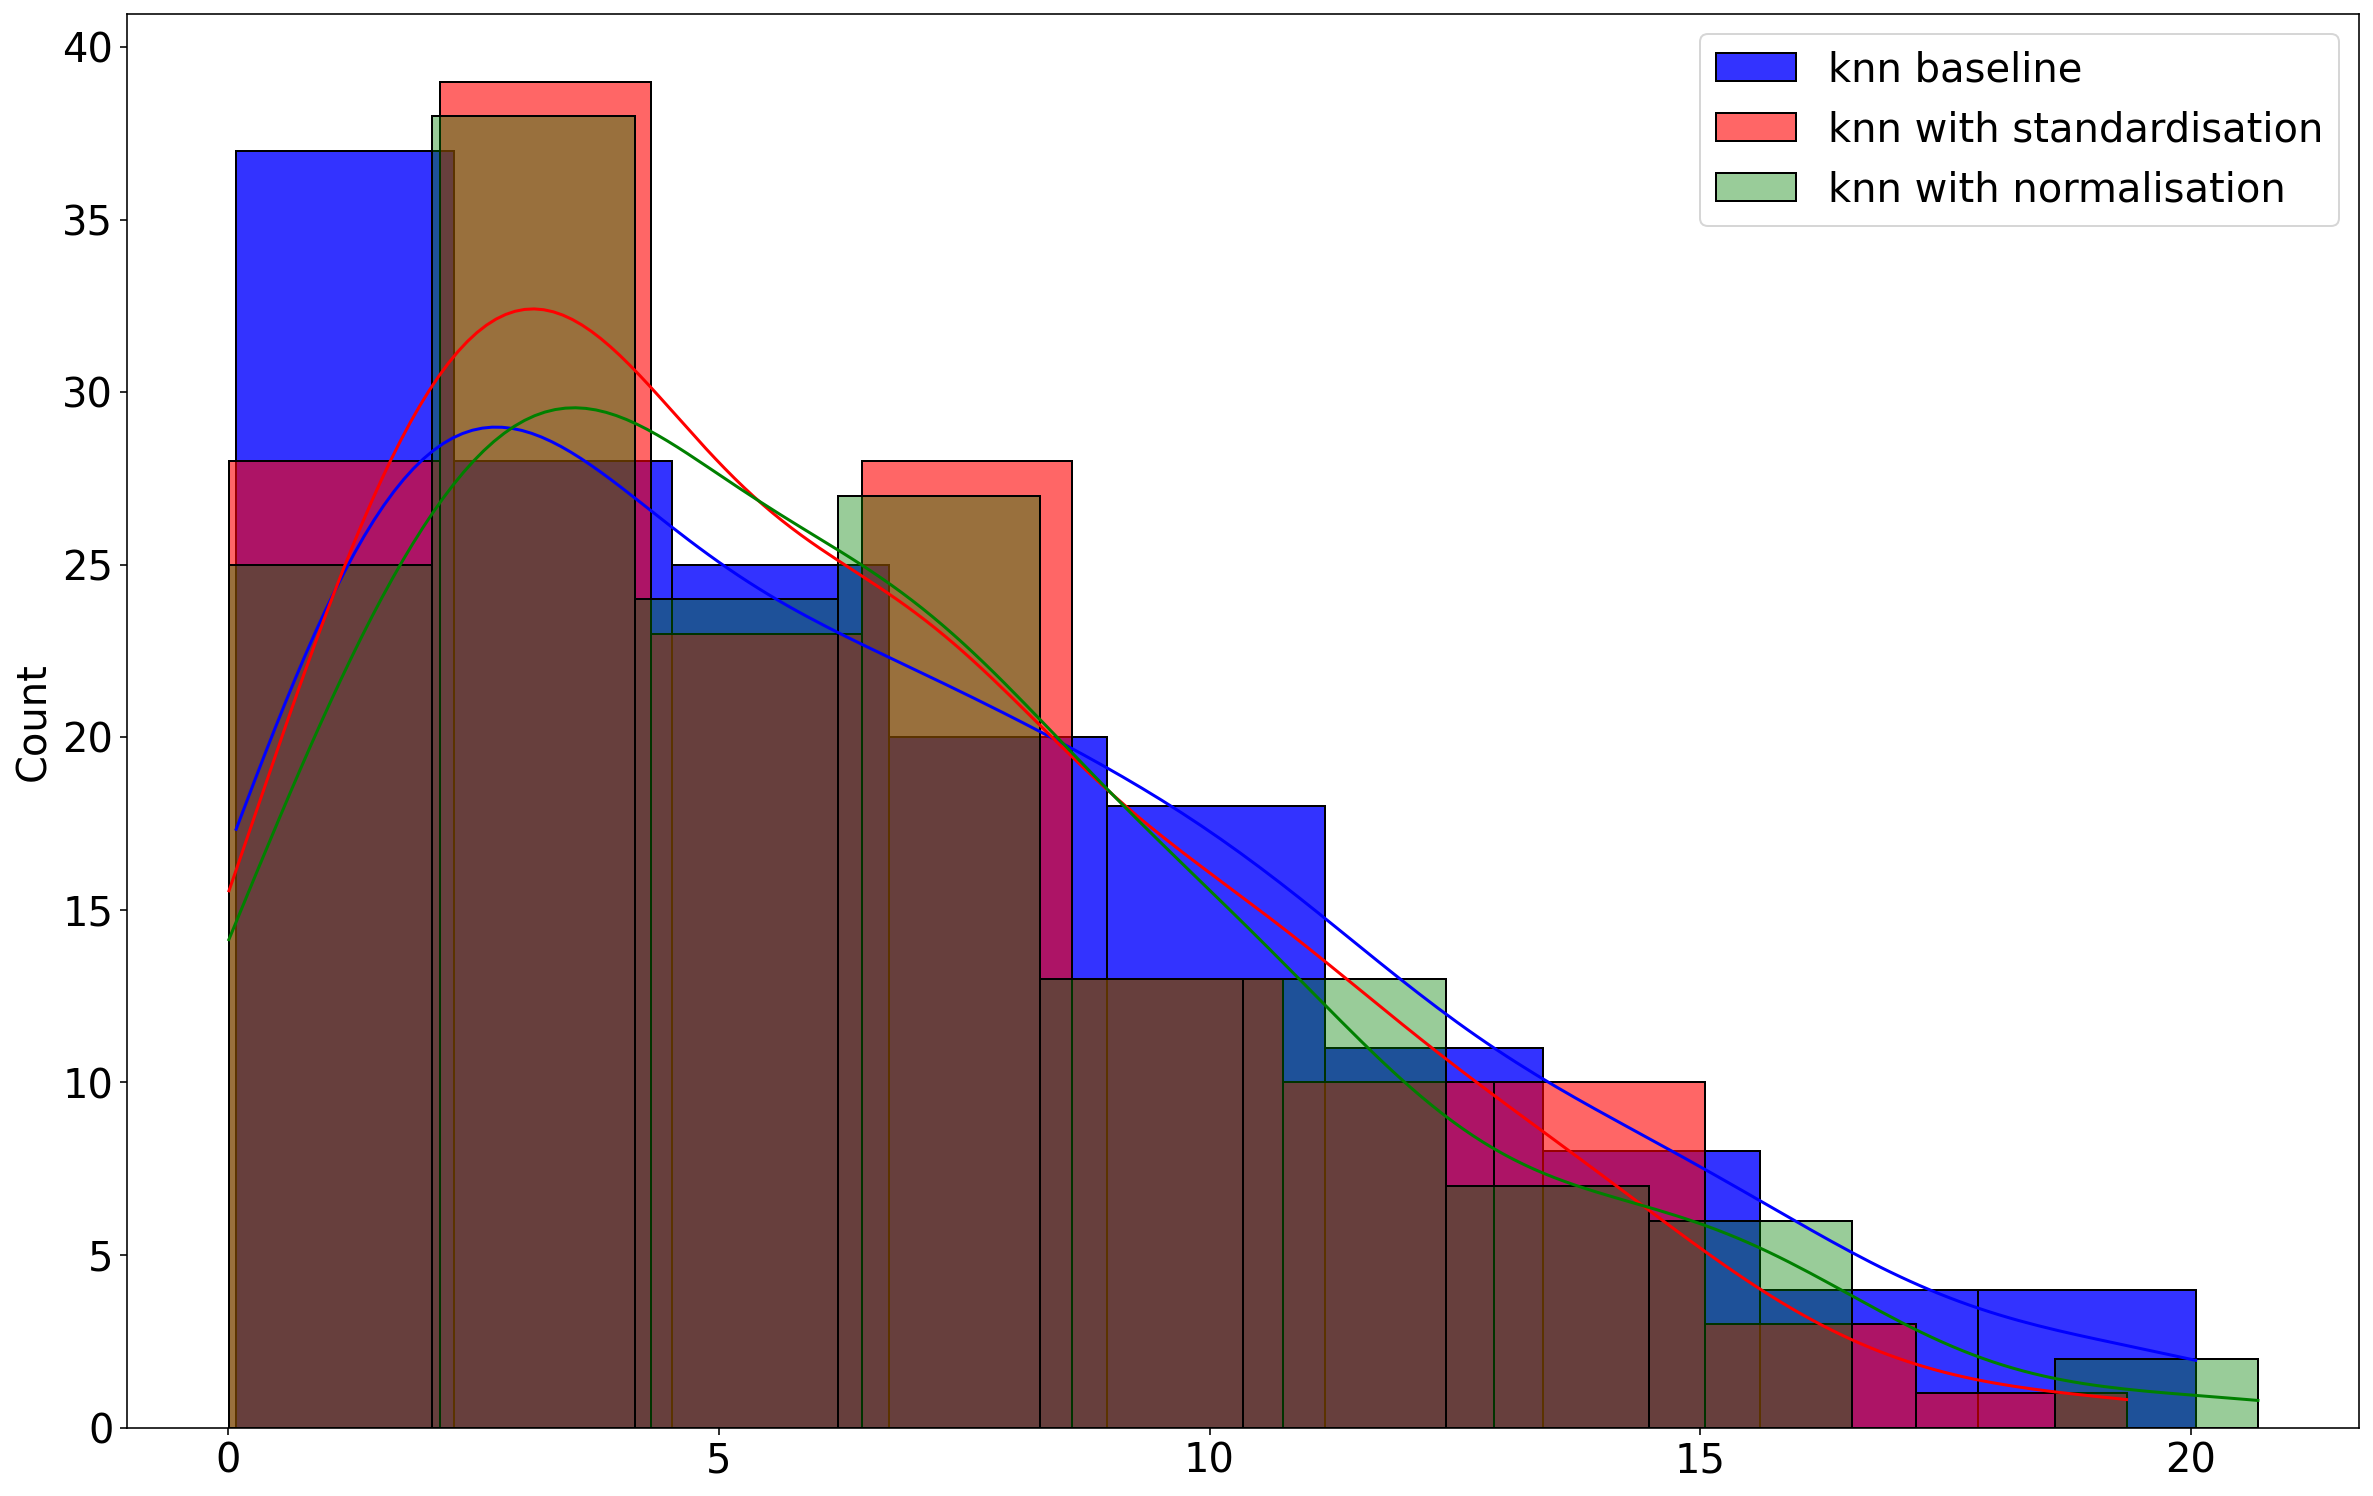

In [39]:
#plotting the absolute error of the three models

c = np.random.uniform(0,0.5,3)

sns.histplot(ass_err_corr, alpha = 0.8, label = 'knn baseline', kde = True, color = 'b' )
sns.histplot(ass_err_corr_std, alpha = 0.6, label = 'knn with standardisation', kde = True, color = 'r')
sns.histplot(ass_err_corr_norm, alpha = 0.4, label = 'knn with normalisation', kde = True, color = 'g')

plt.legend()

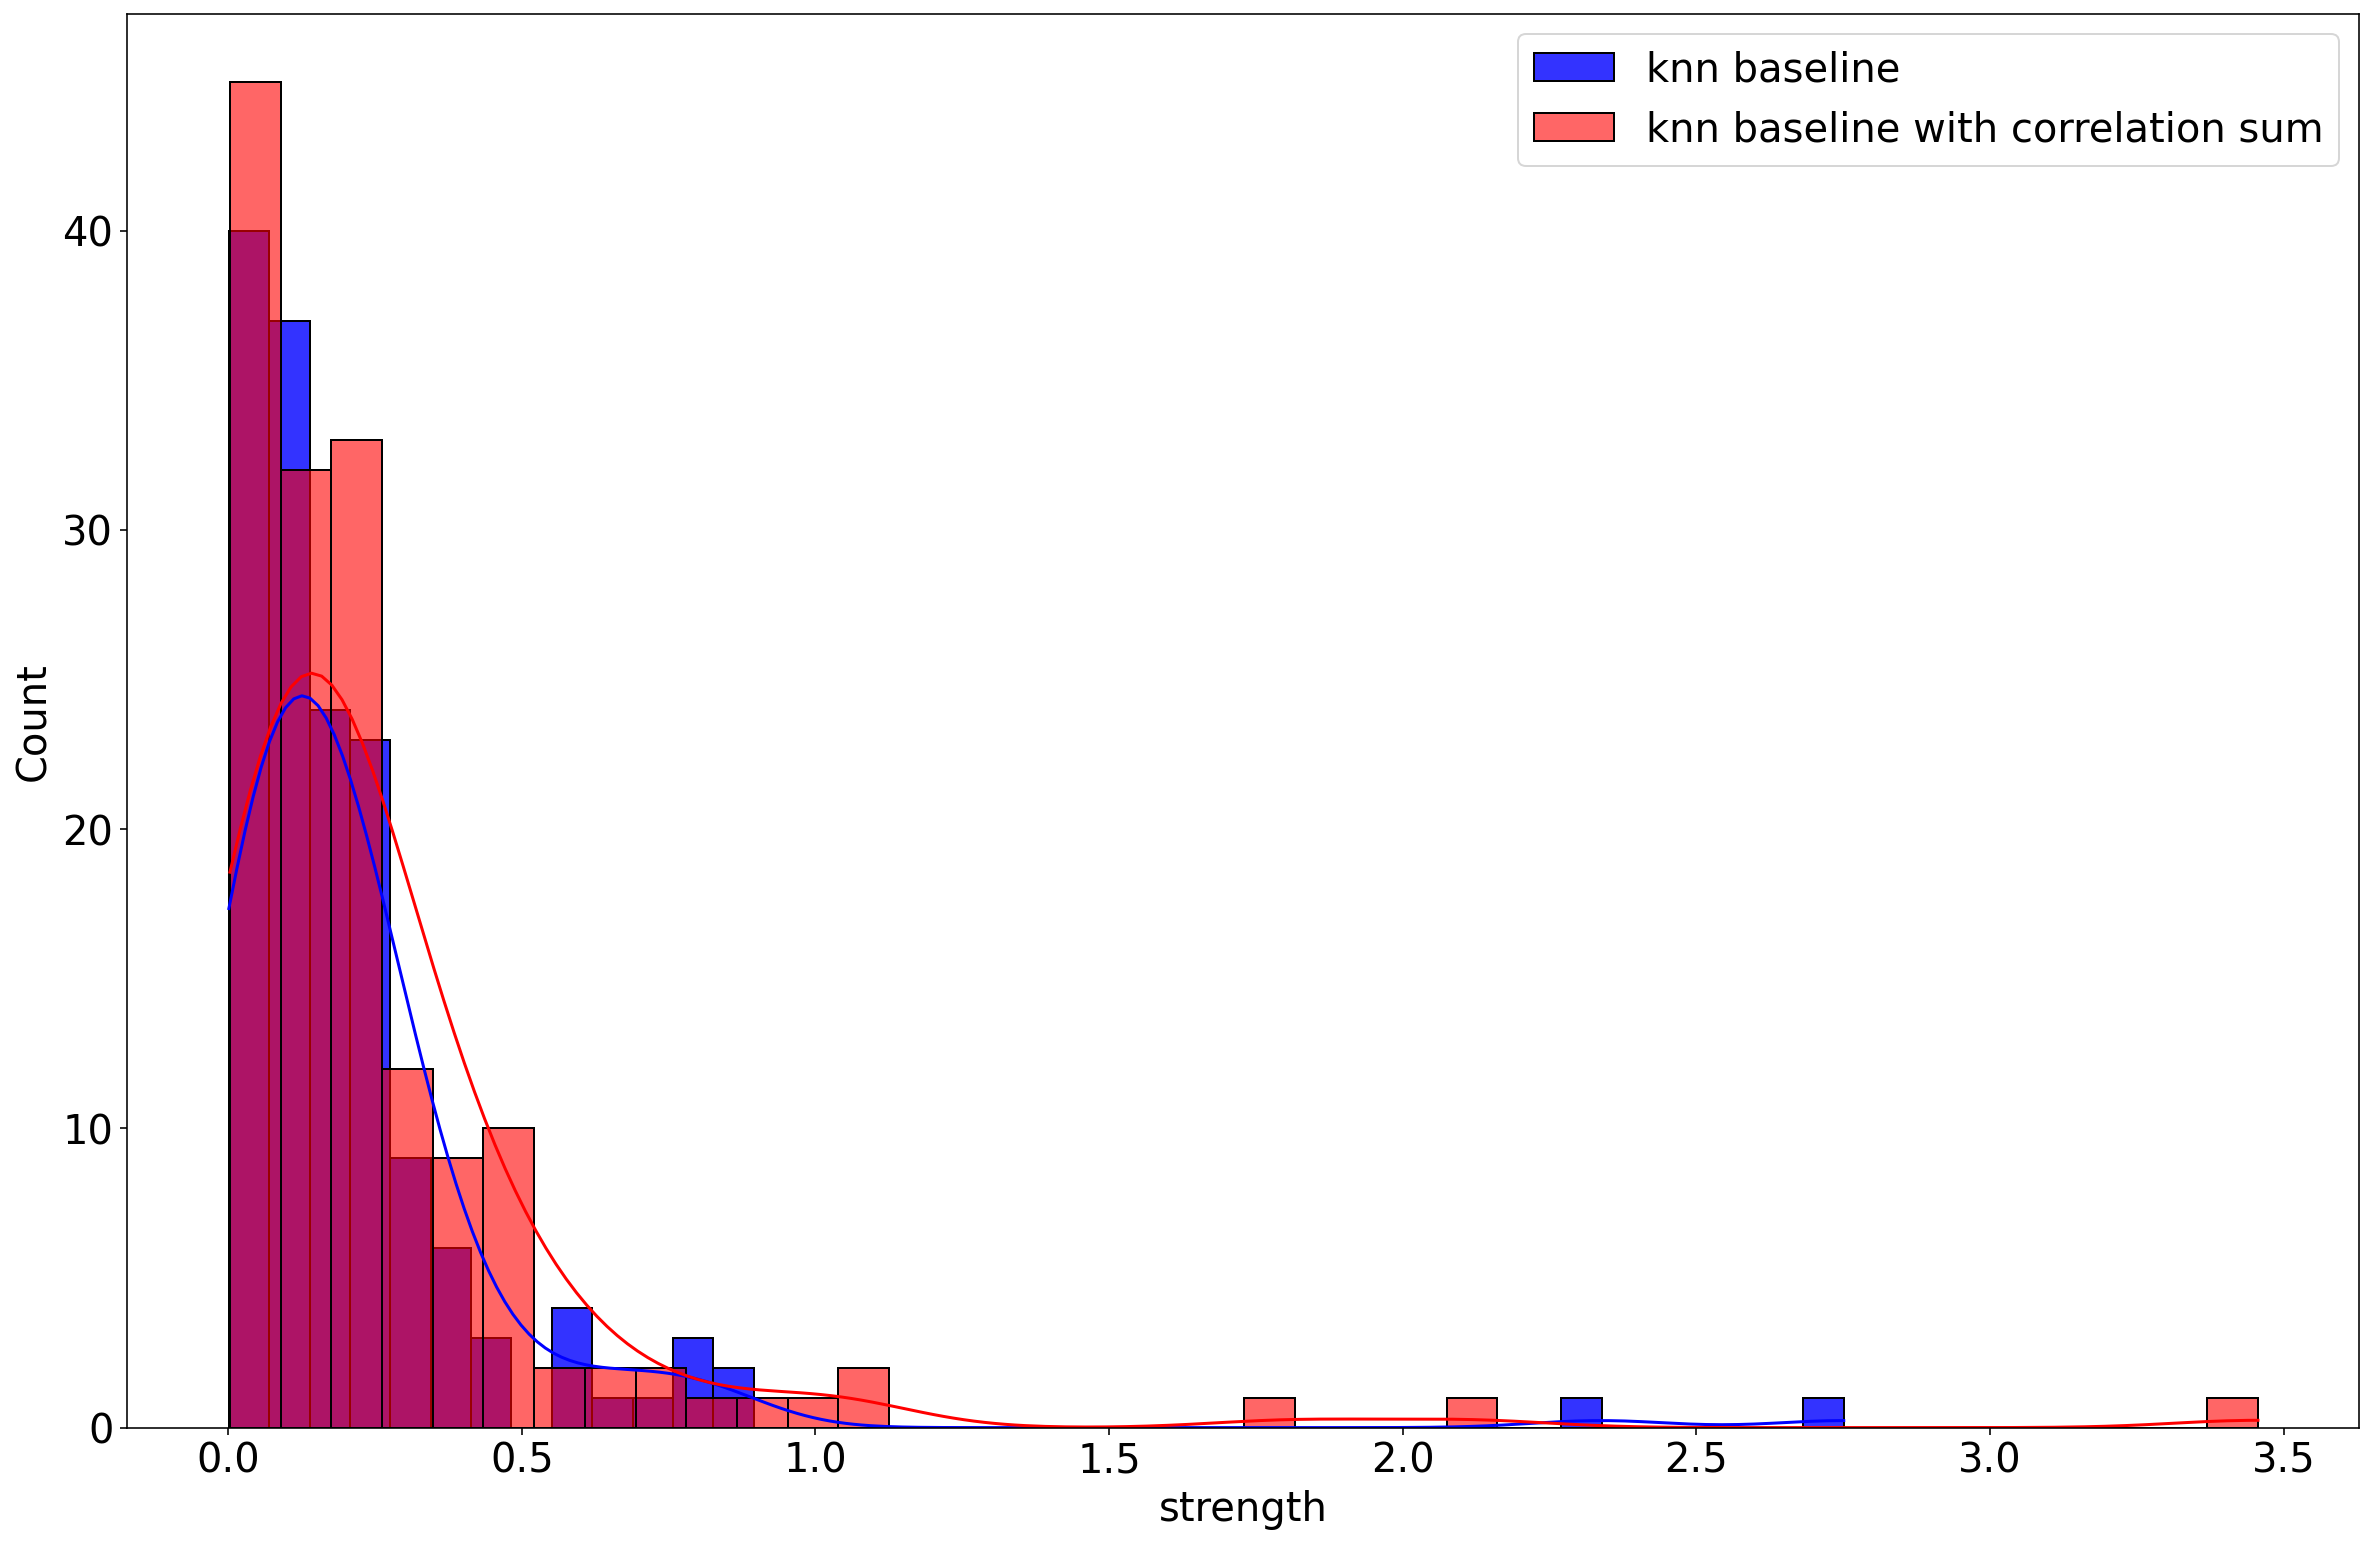

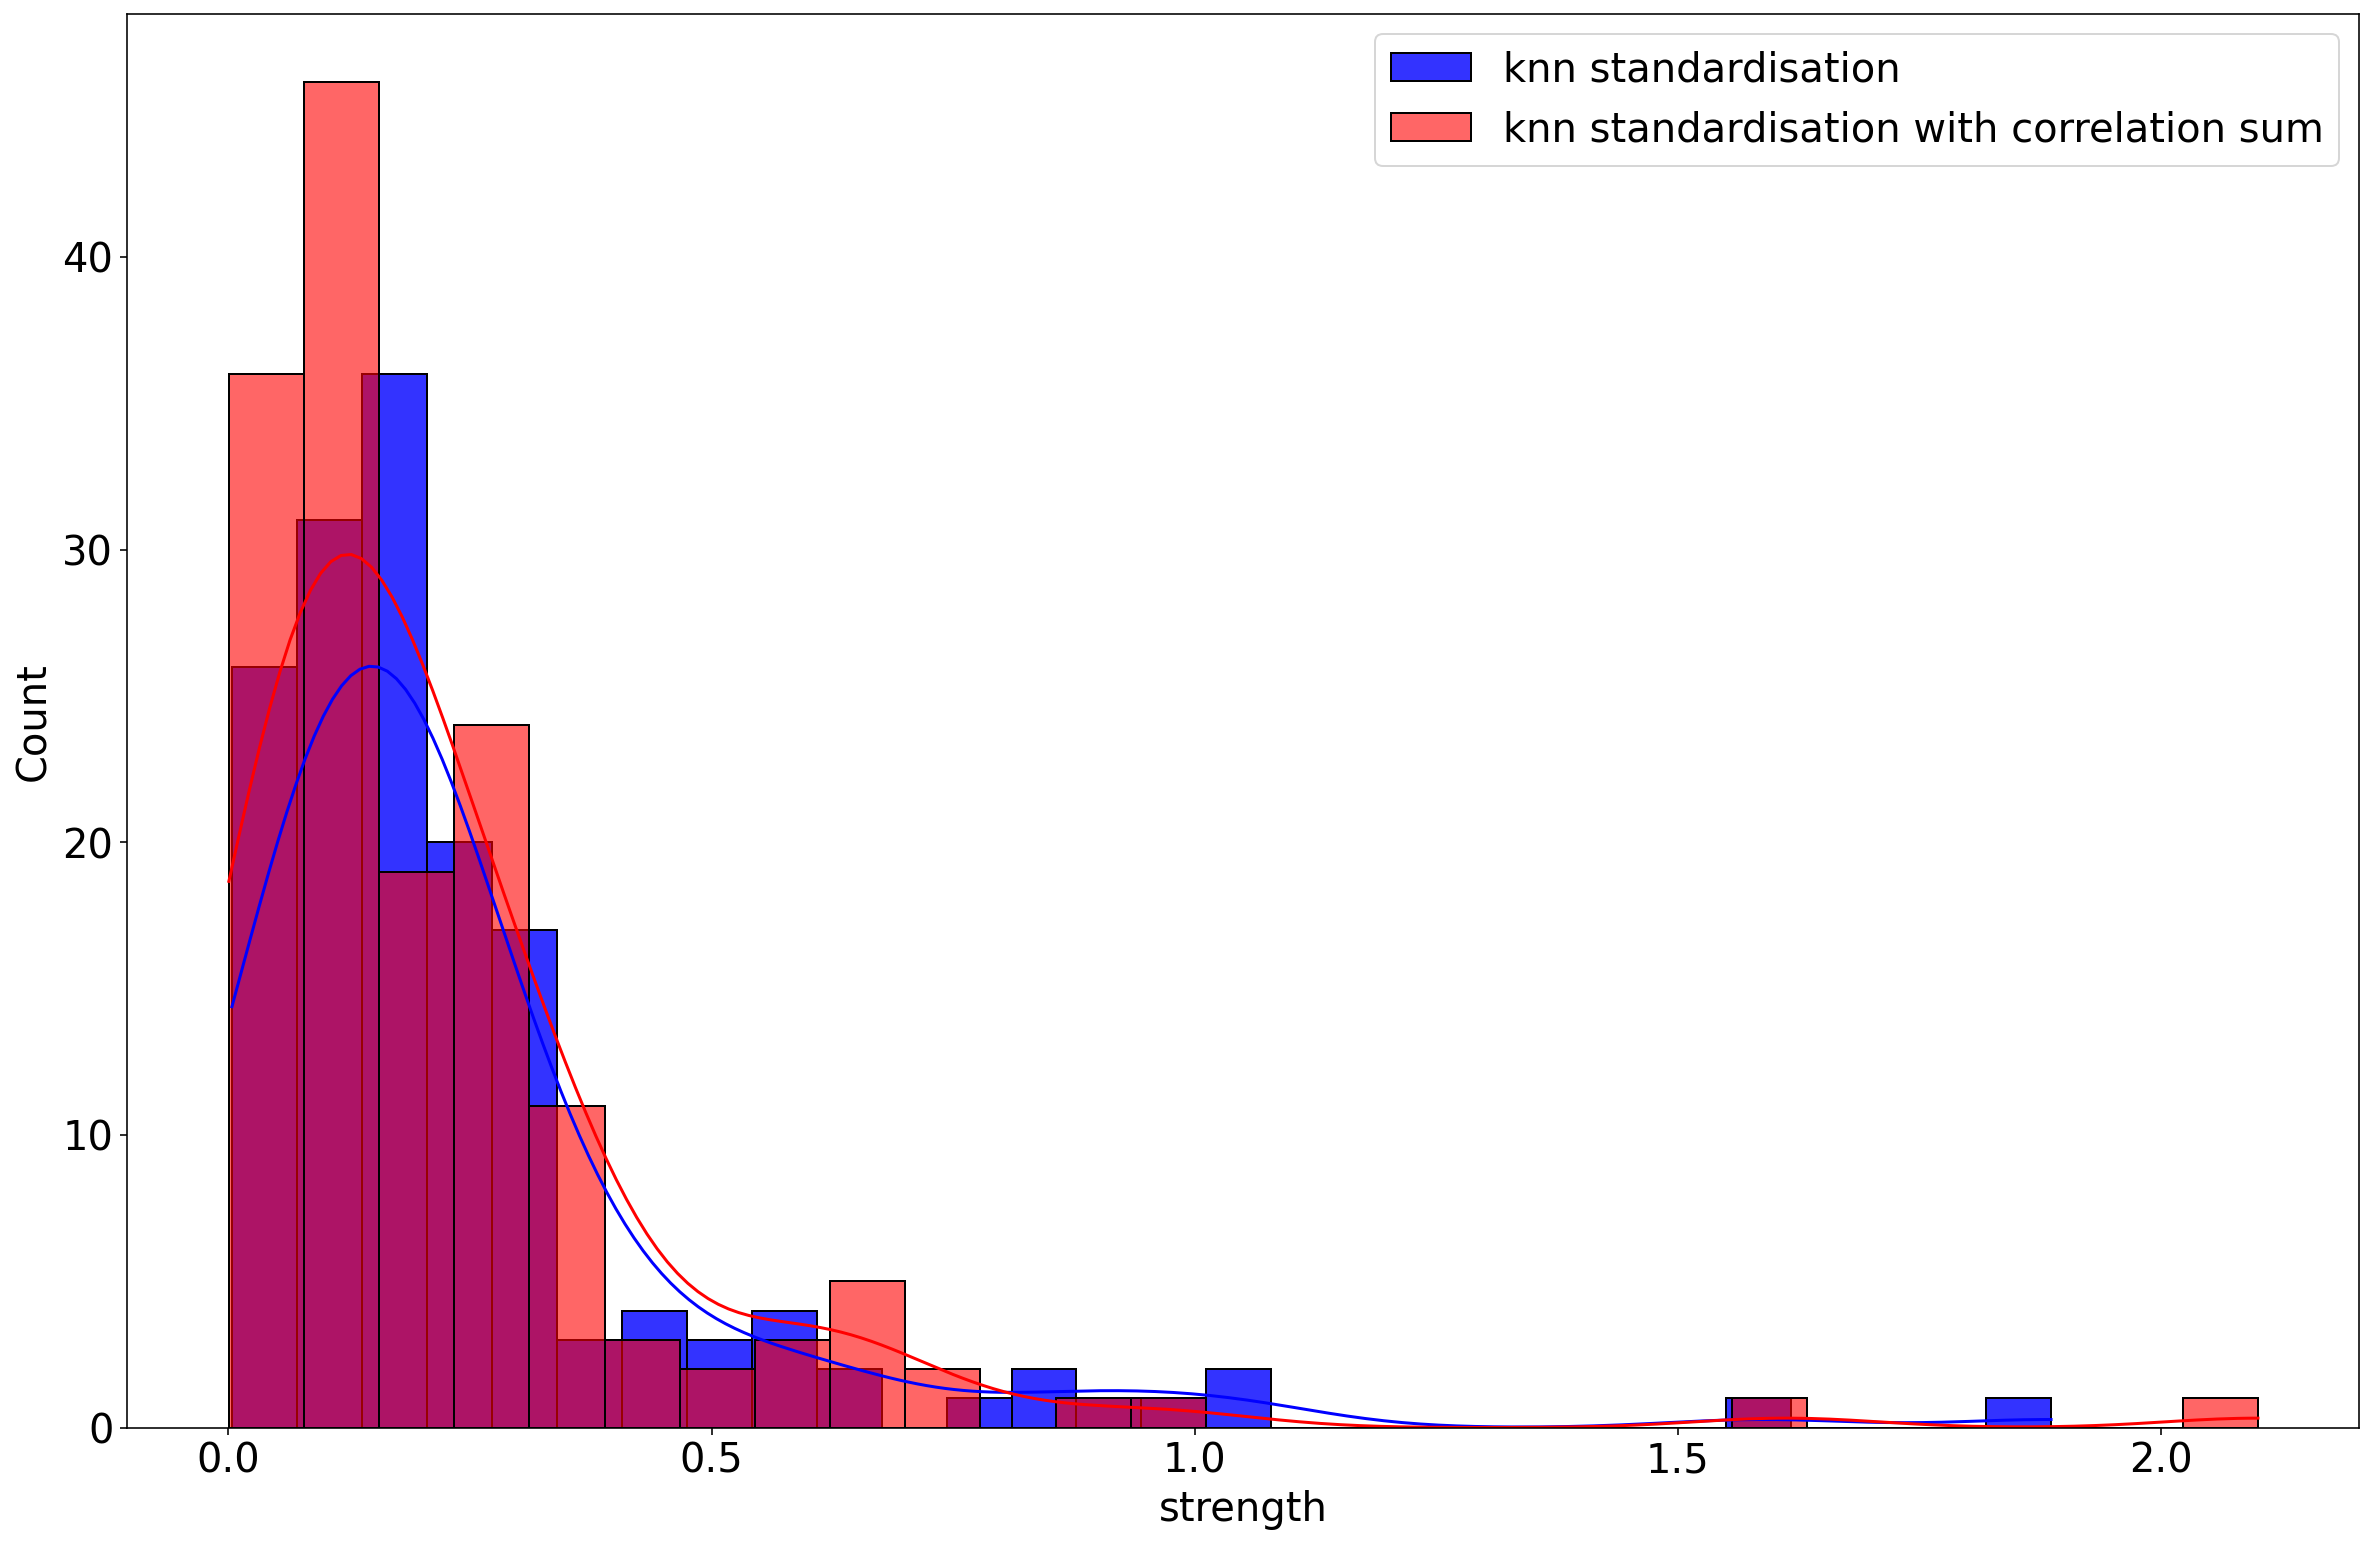

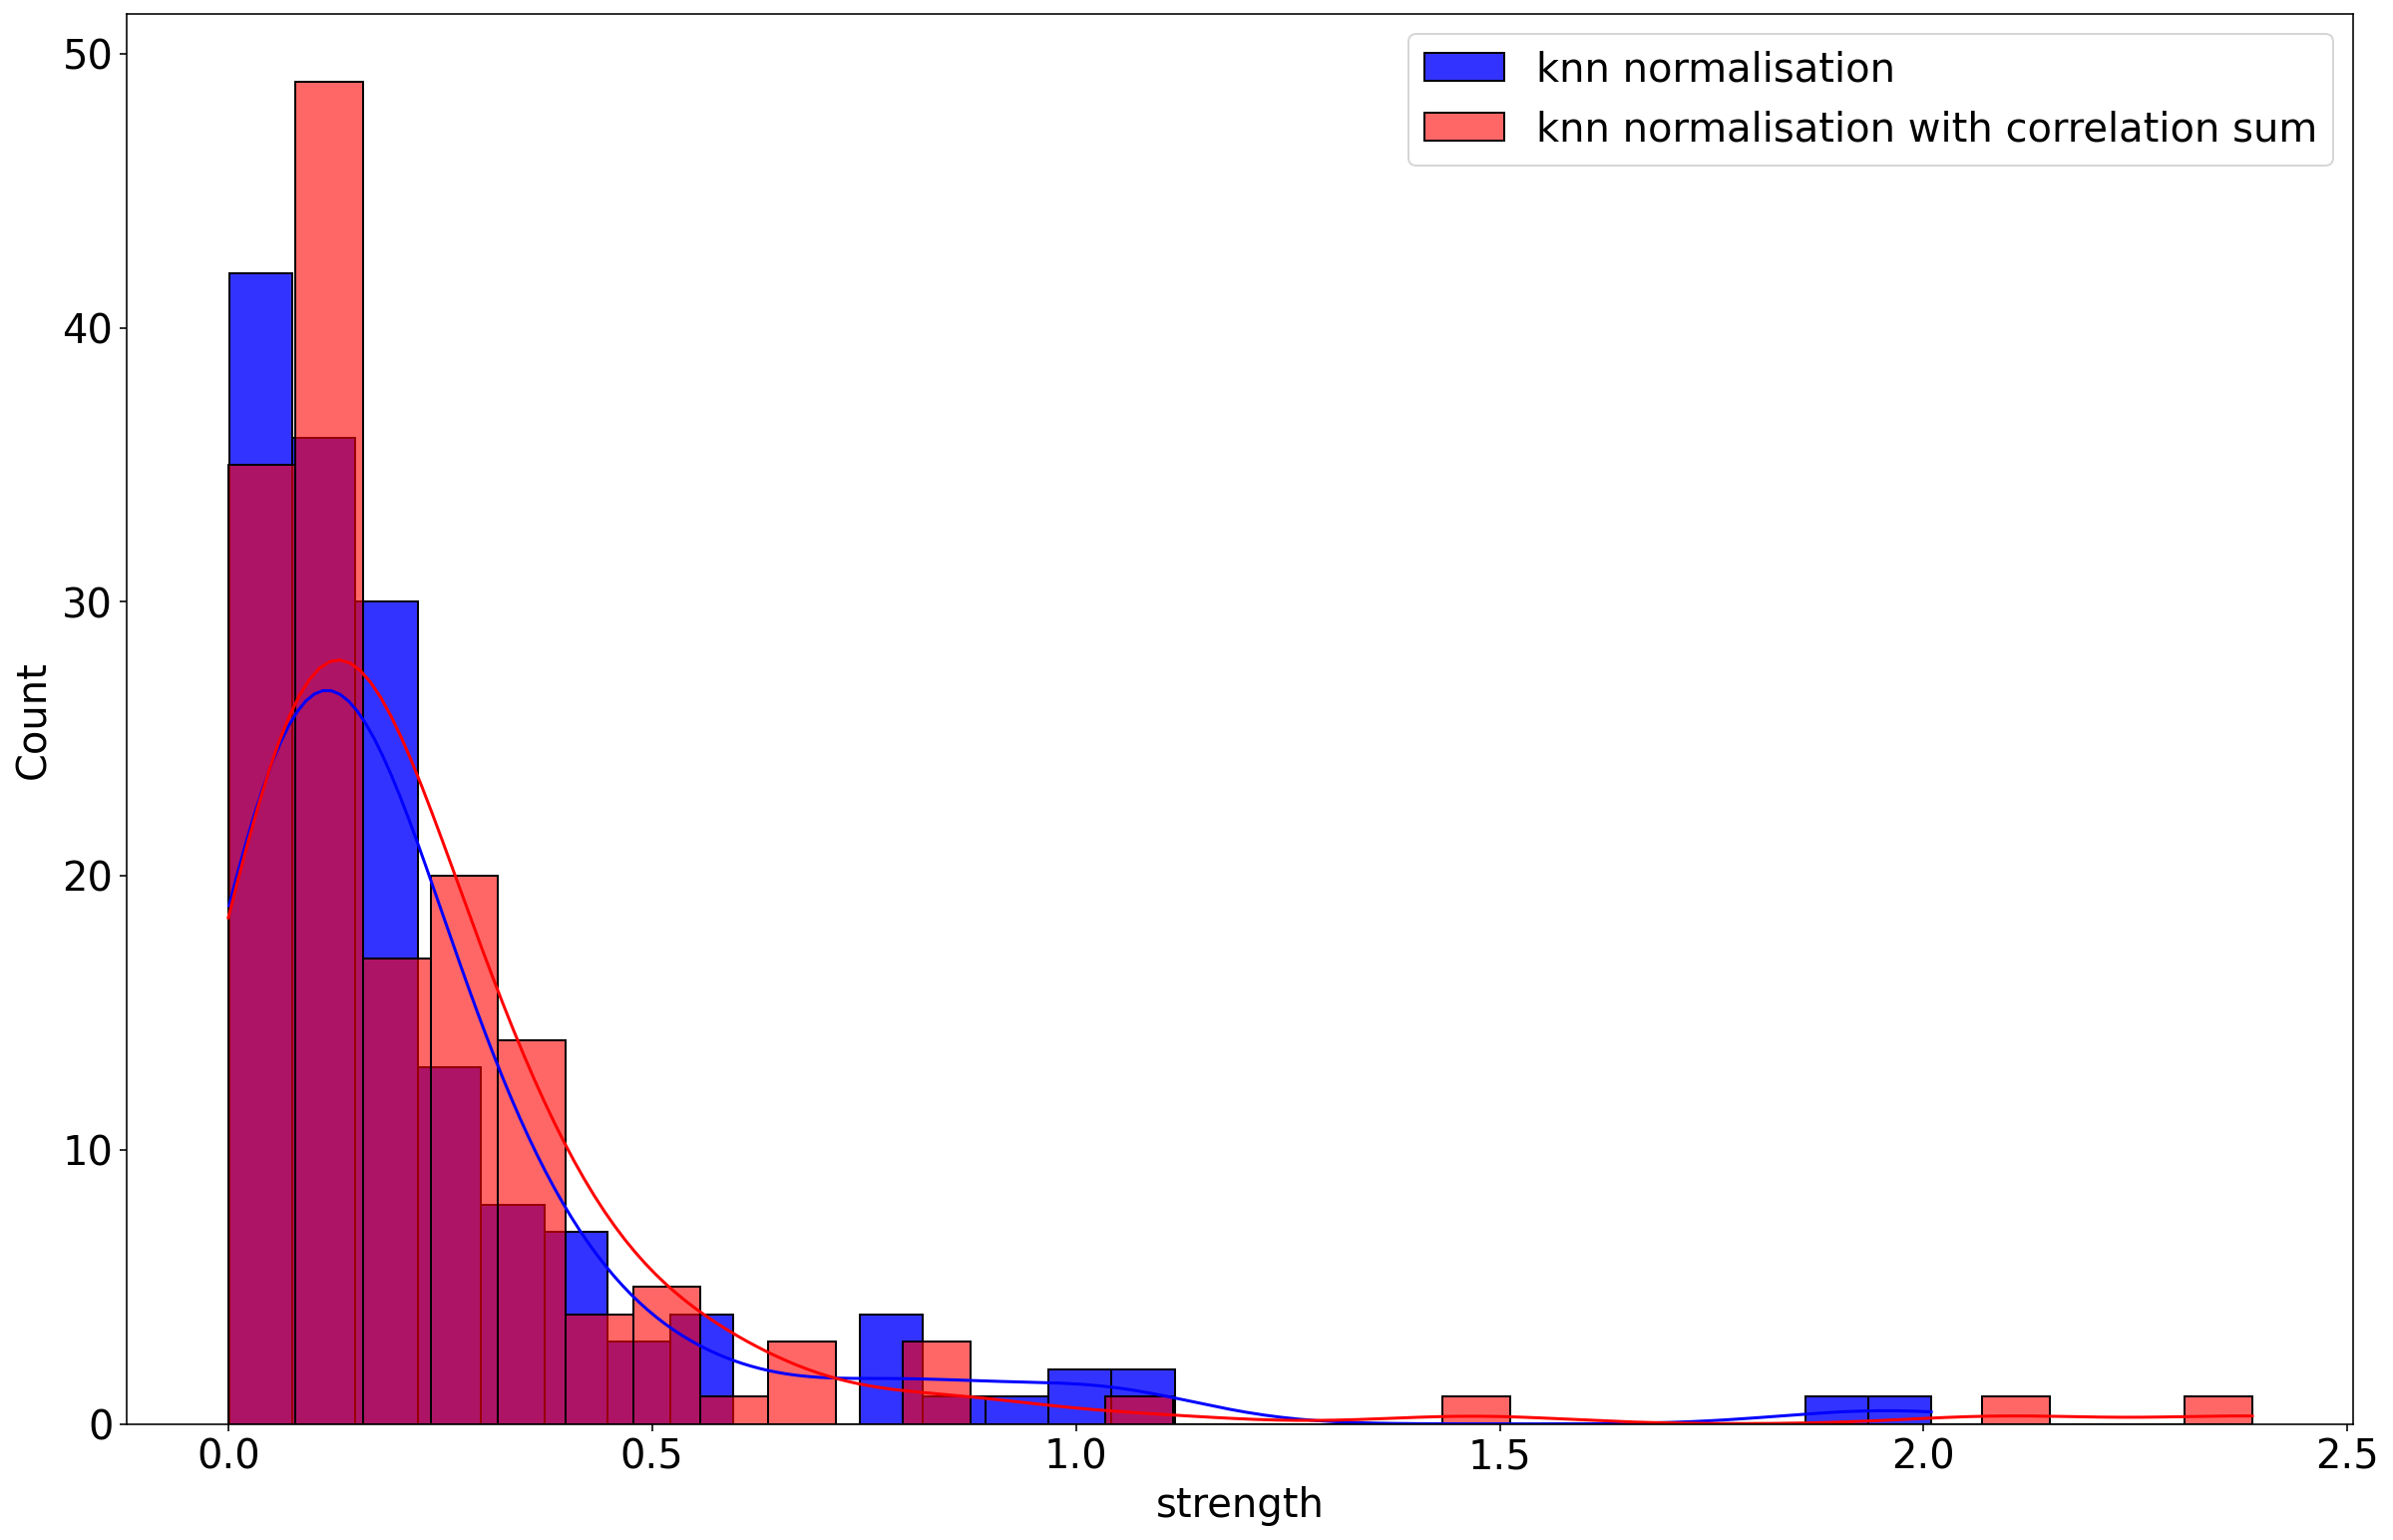

In [59]:
list1=[rel_err,rel_err_std,rel_err_norm]
list2=[rel_err_corr,rel_err_corr_std,rel_err_corr_norm]
list3=['baseline','standardisation','normalisation']
z=0
for i,j in zip(list1,list2):
    fig= plt.subplots(1, 1)
    c = np.random.uniform(0,0.5,3)
    sns.histplot(i, alpha = 0.8, label = 'knn '+list3[z], kde = True, color = 'b' )
    sns.histplot(j, alpha = 0.6, label = 'knn '+list3[z]+' with correlation sum', kde = True, color = 'r')
    plt.legend()
    z=z+1

The model that shows improvements is the one with the standardization of the data. The other two model didn't show improvements (Normalization) or the performances have even decreased (baseline)

I try to modify the dataset by eliminating the columns with correlation less than 0.2 (in absolute value) and adding two even columns corresponding to the weighted sum with the corresponding correlation (two by two) of the eliminated variables

In [41]:
#printing the correlation lower the |0.2|

abs(corr)<=0.2

cement          False
slag             True
ash              True
water           False
superplastic    False
coarseagg        True
fineagg          True
age             False
Name: strength, dtype: bool

In [42]:
#eliminating the columns with |corr|<0.2

df_col=df
df_col['first']=df['fineagg']*corr.fineagg+df['ash']*corr.ash
df_col['second']=df['coarseagg']*corr.coarseagg+df['slag']*corr.slag
df_col=df_col.drop(['slag','ash','coarseagg','fineagg'], axis=1)
df_col=df_col.reindex(columns=['cement', 'water', 'superplastic', 'age', 'first', 'second'])
df_col['strenght']=y

In [43]:
#eliminating the columns with |corr|<0.2

df_col_std=df_std
df_col_std['first']=df_std['fineagg']*corr.fineagg+df_std['ash']*corr.ash
df_col_std['second']=df_std['coarseagg']*corr.coarseagg+df_std['slag']*corr.slag
df_col_std=df_col_std.drop(['slag','ash','coarseagg','fineagg'], axis=1)
df_col_std=df_col_std.reindex(columns=['cement', 'water', 'superplastic', 'age', 'first', 'second'])
df_col_std['strenght']=y

In [44]:
#eliminating the columns with |corr|<0.2

df_col_norm=df_norm
df_col_norm['first']=df_norm['fineagg']*corr.fineagg+df_norm['ash']*corr.ash
df_col_norm['second']=df_norm['coarseagg']*corr.coarseagg+df_norm['slag']*corr.slag
df_col_norm=df_col_norm.drop(['slag','ash','coarseagg','fineagg'], axis=1)
df_col_norm=df_col_norm.reindex(columns=['cement', 'water', 'superplastic', 'age', 'first', 'second'])
df_col_norm['strenght']=y

In [45]:
#calculation of the best paramiters for the baseline with the new data

X_col = df_col[df_col.columns[0:-1]].values
y_col = df_col[df_col.columns[-1]].values
X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_col, y_col, test_size=0.15, random_state=42)

scores=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(X_train_col,y_train_col)
    scores.append(knn.score(X_test_col, y_test_col))
print(f"The best choice for k is {k[np.argmax(scores)]}, with a score of {np.round(np.max(scores)*100,2)}%") 

The best choice for k is 7, with a score of 79.43%


In [46]:
knn = KNeighborsRegressor(n_neighbors=k[np.argmax(scores)], metric='cosine')
knn.fit(X_train_col,y_train_col)
y_pred_col=knn.predict(X_test_col)
print(f'R2={np.round(knn.score(X_test_col, y_test_col),2)*100}%')
rel_err_col=abs(y_pred_col-y_test_col)/y_test_col
print(f'Relative error= {np.round(np.mean(rel_err_col),2)*100}%')
ass_err_col=abs(y_pred_col-y_test_col)
print(f'Absolute error= {np.round(np.mean(ass_err_col),2)}')

R2=79.0%
Relative error= 21.0%
Absolute error= 5.8


For the baseline there is a increase in the precision. In particular the R2 increased form 75% to 79%, the relative error decreased from 27% to 21% and the absolute errore increased from 6.55 to 5.8, but if we compare these results with the initial result there are no particular changes.

In [47]:
#calculation of the best paramiters for the standardized data

X_col_std = df_col_std[df_col_std.columns[0:-1]].values
y_col_std = df_col_std[df_col_std.columns[-1]].values

X_train_col_std, X_test_col_std, y_train_col_std, y_test_col_std = train_test_split(X_col_std, y_col_std, test_size=0.15, random_state=42)

scores=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(X_train_col_std,y_train_col_std)
    scores.append(knn.score(X_test_col_std, y_test_col_std))
print(f"The best choice for k is {k[np.argmax(scores)]}, with a score of {np.round(np.max(scores)*100,2)}%") 

The best choice for k is 5, with a score of 81.02%


In [48]:
knn = KNeighborsRegressor(n_neighbors=k[np.argmax(scores)], metric='cosine')
knn.fit(X_train_col_std,y_train_col_std)
y_pred_col_std=knn.predict(X_test_col_std)
print(f'R2={np.round(knn.score(X_test_col_std, y_test_col_std),2)*100}%')
rel_err_col_std=abs(y_pred_col_std-y_test_col_std)/y_test_col_std
print(f'Relative error= {np.round(np.mean(rel_err_col_std),2)*100}%')
ass_err_col_std=abs(y_pred_col_std-y_test_col_std)
print(f'Absolute error= {np.round(np.mean(ass_err_col_std),2)}')

R2=81.0%
Relative error= 19.0%
Absolute error= 5.49


For the standadized data there is another increase in the precision. In particular the R2 increase form 80% to 81%, the relative error decreased from 23% to 19% and the absolute errore decreased from 5.97 to 5.49. So we can appreciate a little improvement of the precision.

In [49]:
#calculation of the best paramiters for the normalized data

X_col_norm = df_col_norm[df_col_norm.columns[0:-1]].values
y_col_norm = df_col_norm[df_col_norm.columns[-1]].values
X_train_col_norm, X_test_col_norm, y_train_col_norm, y_test_col_norm = train_test_split(X_col_norm, y_col_norm, test_size=0.15, random_state=42)
scores=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(X_train_col_norm,y_train_col_norm)
    scores.append(knn.score(X_test_col_norm, y_test_col_norm))
print(f"The best choice for k is {k[np.argmax(scores)]}, with a score of {np.round(np.max(scores)*100,2)}%")    

The best choice for k is 3, with a score of 82.35%


In [50]:
knn = KNeighborsRegressor(n_neighbors=k[np.argmax(scores)], metric='cosine')
knn.fit(X_train_col_norm,y_train_col_norm)
y_pred_col_norm=knn.predict(X_test_col_norm)
print(f'R2={np.round(knn.score(X_test_col_norm, y_test_col_norm),2)*100}%')
rel_err_col_norm=abs(y_pred_col_norm-y_test_col_norm)/y_test_col_norm
print(f'Relative error= {np.round(np.mean(rel_err_col_norm),2)*100}%')
ass_err_col_norm=abs(y_pred_col_norm-y_test_col_norm)
print(f'Absolute error= {np.round(np.mean(ass_err_col_norm),2)}')

R2=82.0%
Relative error= 18.0%
Absolute error= 5.24


For the normalized data there is a increase in the precision. In particular the R2 increased form 78% to 82%, the relative error decreased from 24% to 18%  and the absolute error decreased form 6.22 to 5.24. So it is possible to appreciate an improvement of the precision.

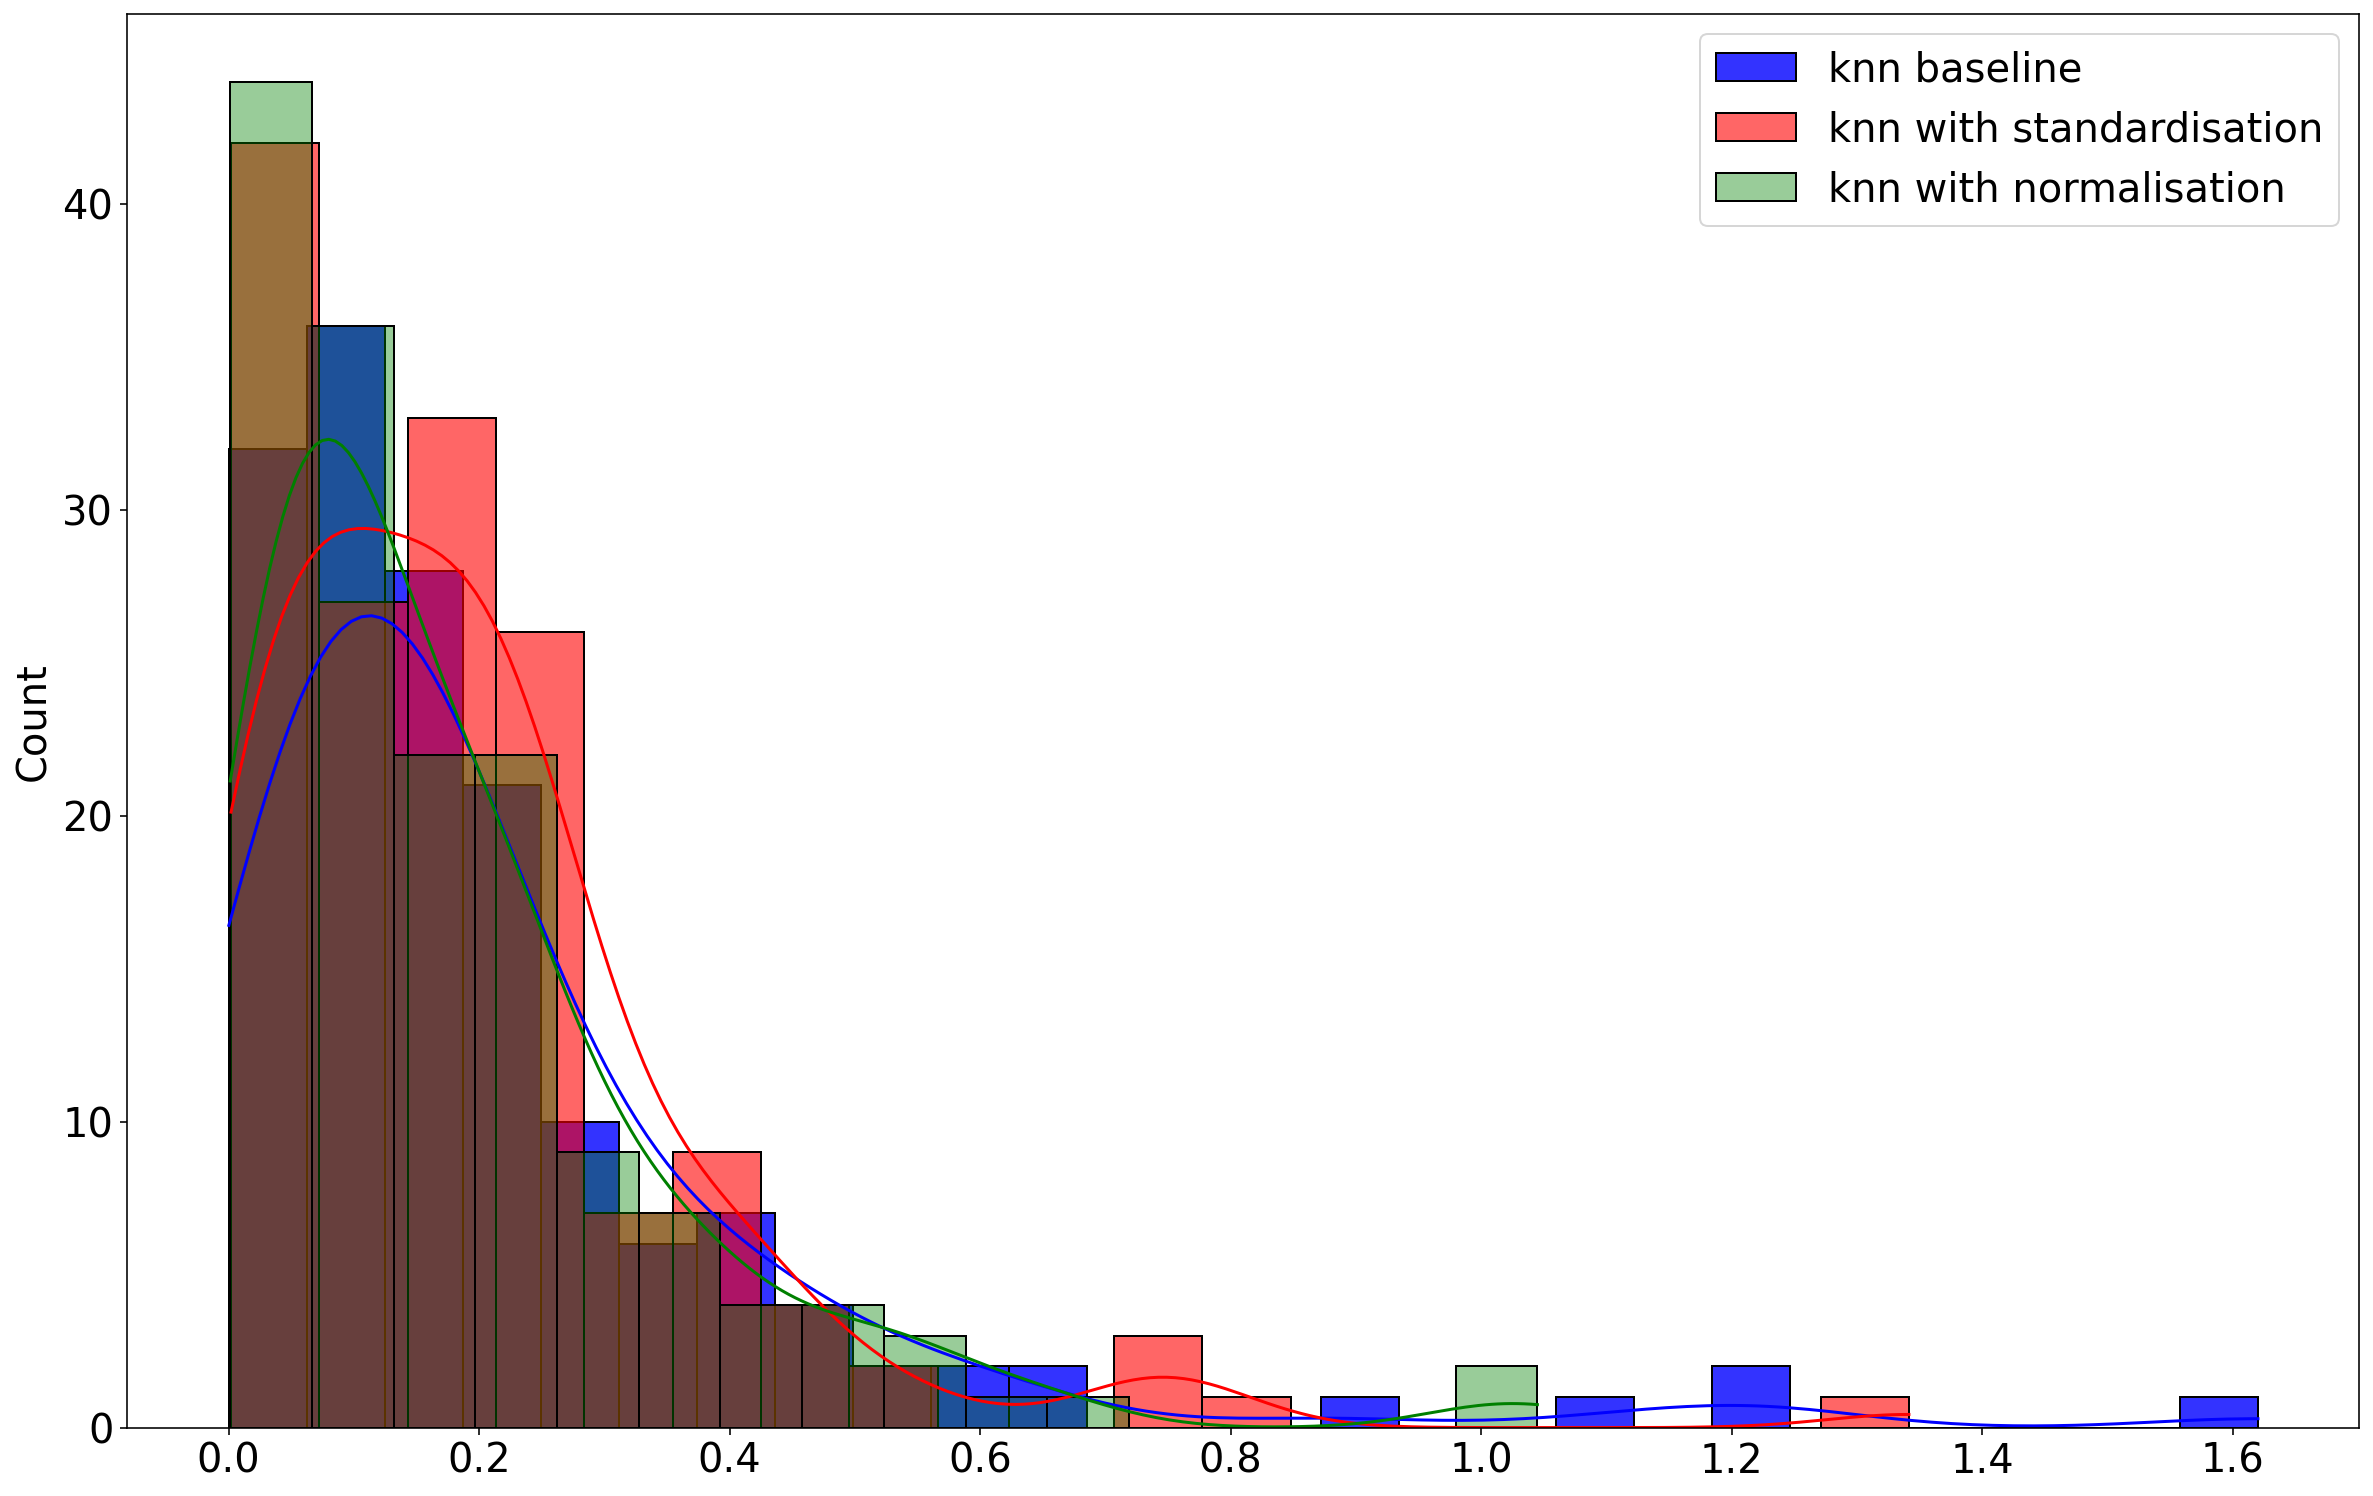

In [51]:
c = np.random.uniform(0,0.5,3)

sns.histplot(rel_err_col, alpha = 0.8, label = 'knn baseline', kde = True, color = 'b' )
sns.histplot(rel_err_col_std, alpha = 0.6, label = 'knn with standardisation', kde = True, color = 'r')
sns.histplot(rel_err_col_norm, alpha = 0.4, label = 'knn with normalisation', kde = True, color = 'g')

plt.legend()

From the chart it is possible to understand that the KNN-regressor applied on the normalized data provides a better precision than the other.

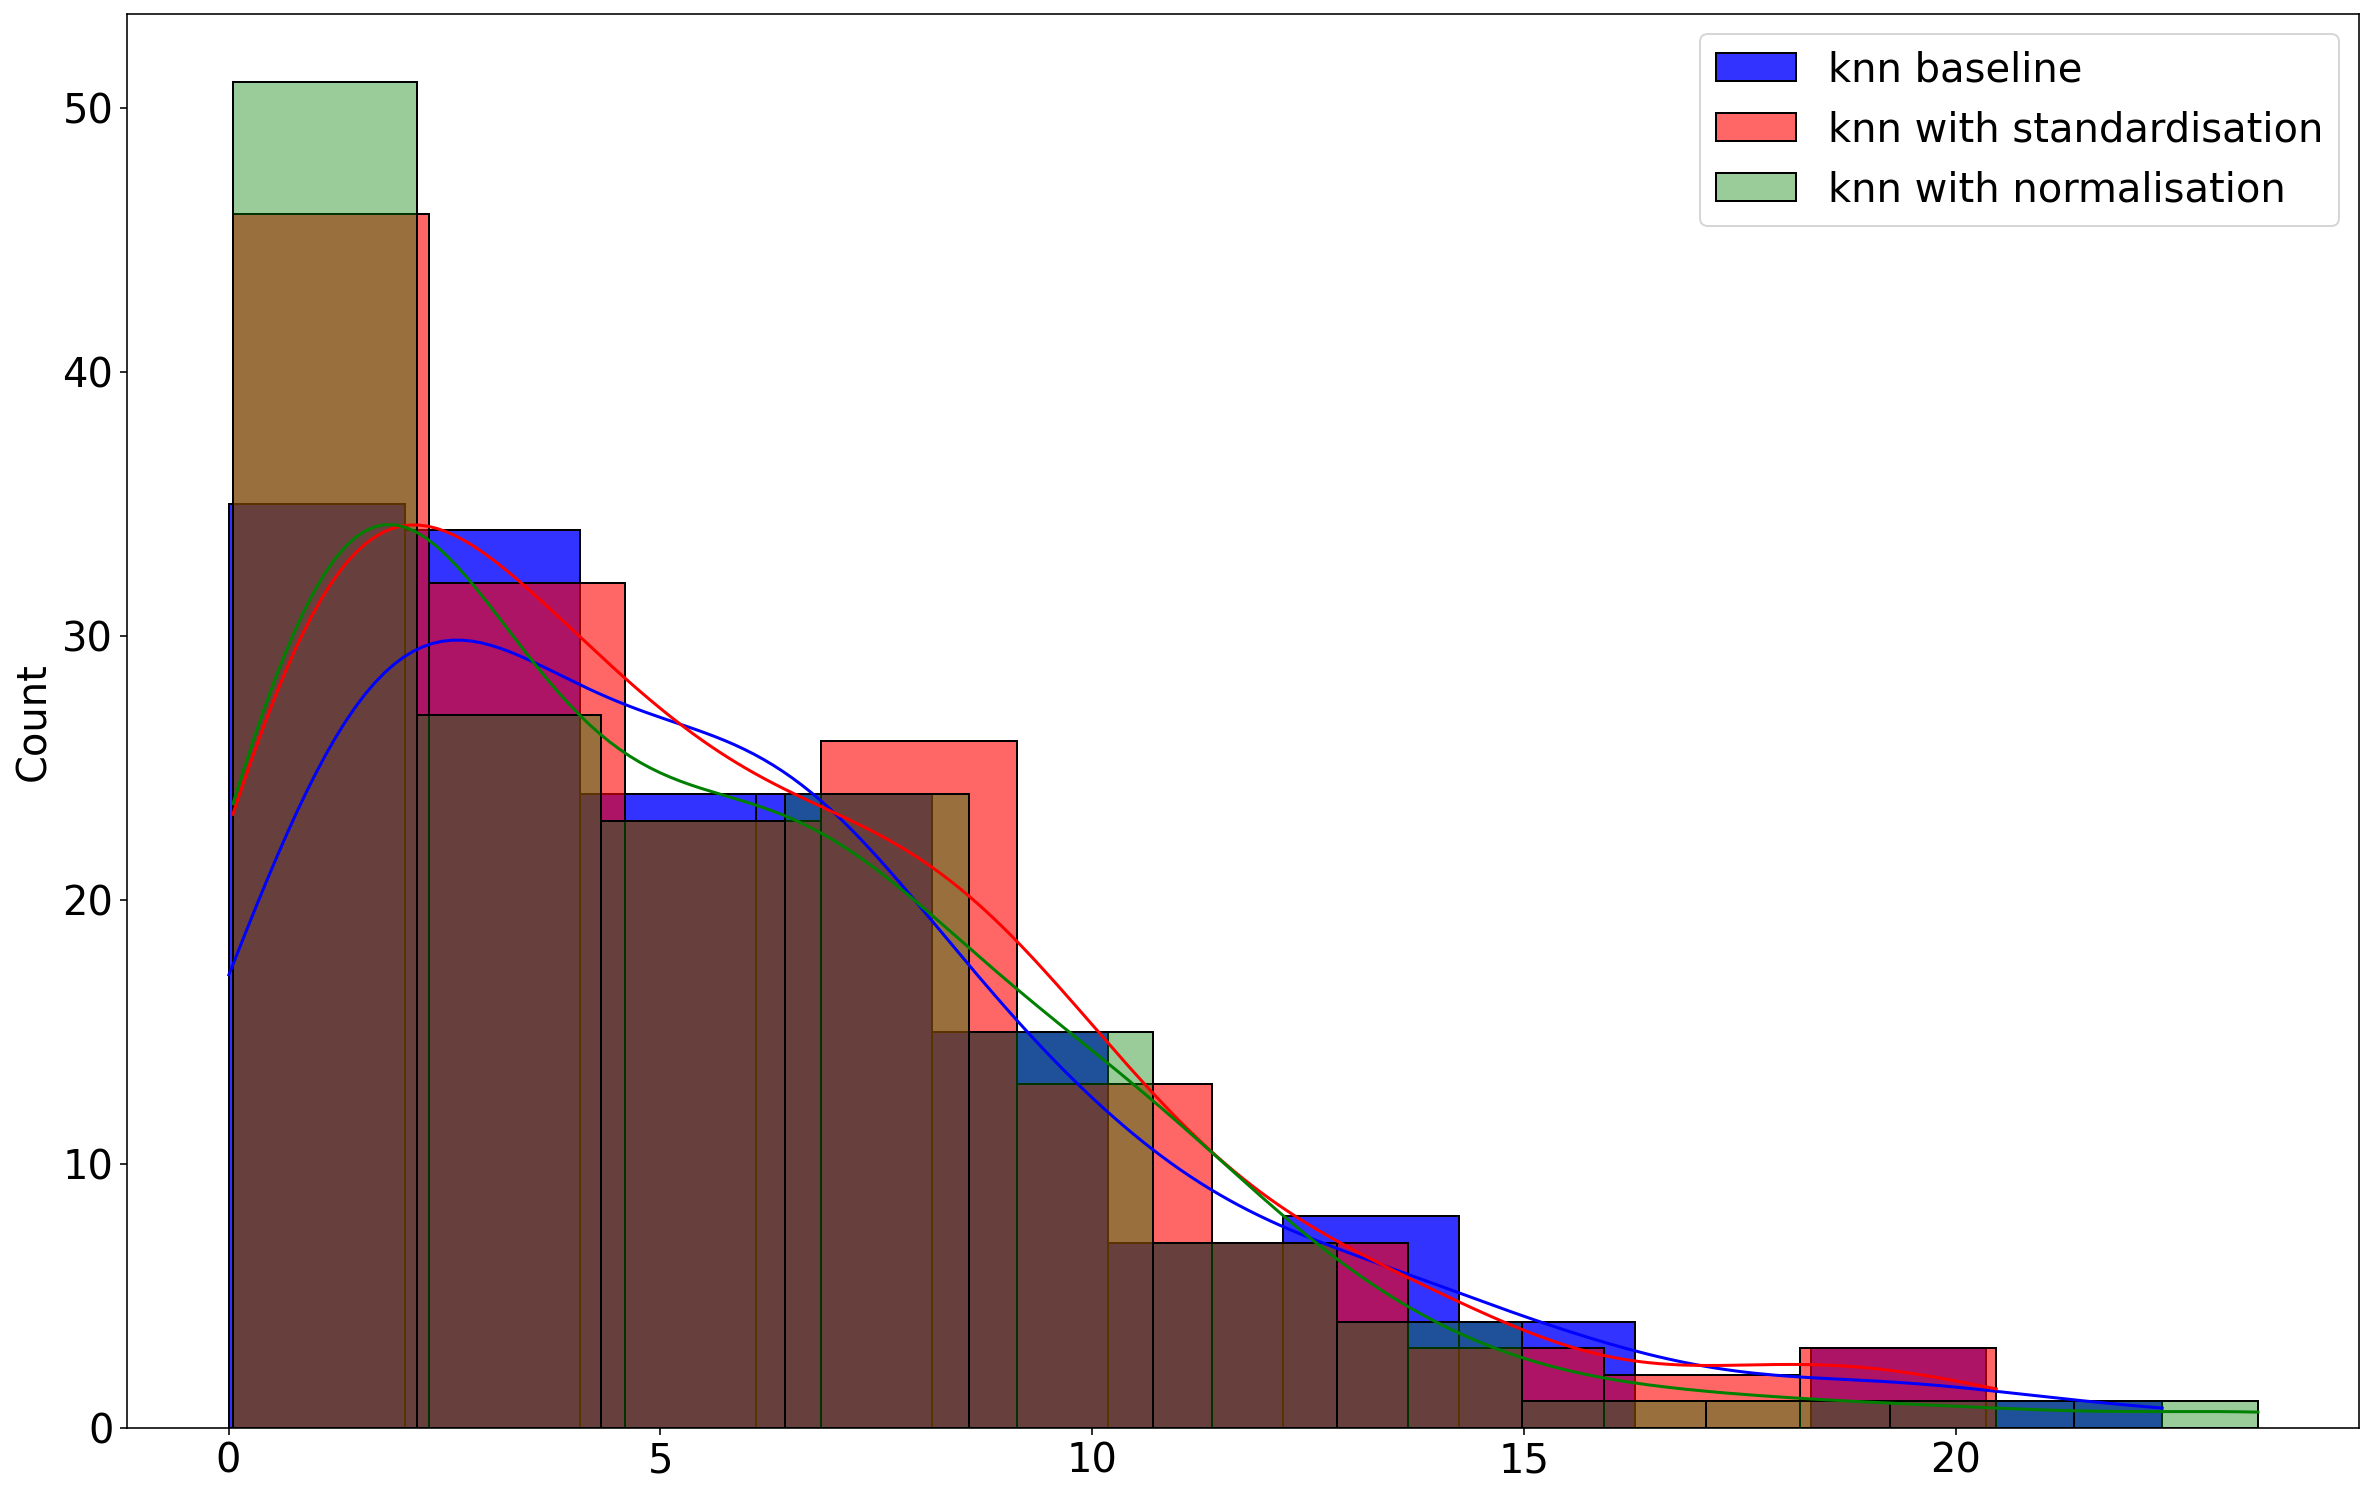

In [52]:
c = np.random.uniform(0,0.5,3)

sns.histplot(ass_err_col, alpha = 0.8, label = 'knn baseline', kde = True, color = 'b' )
sns.histplot(ass_err_col_std, alpha = 0.6, label = 'knn with standardisation', kde = True, color = 'r')
sns.histplot(ass_err_col_norm, alpha = 0.4, label = 'knn with normalisation', kde = True, color = 'g')

plt.legend()

Regarding the relative error both the normalized and the standardized data, the chart shows very close values. So It is better to use the R2 and the realative error as metrics for the evauation.

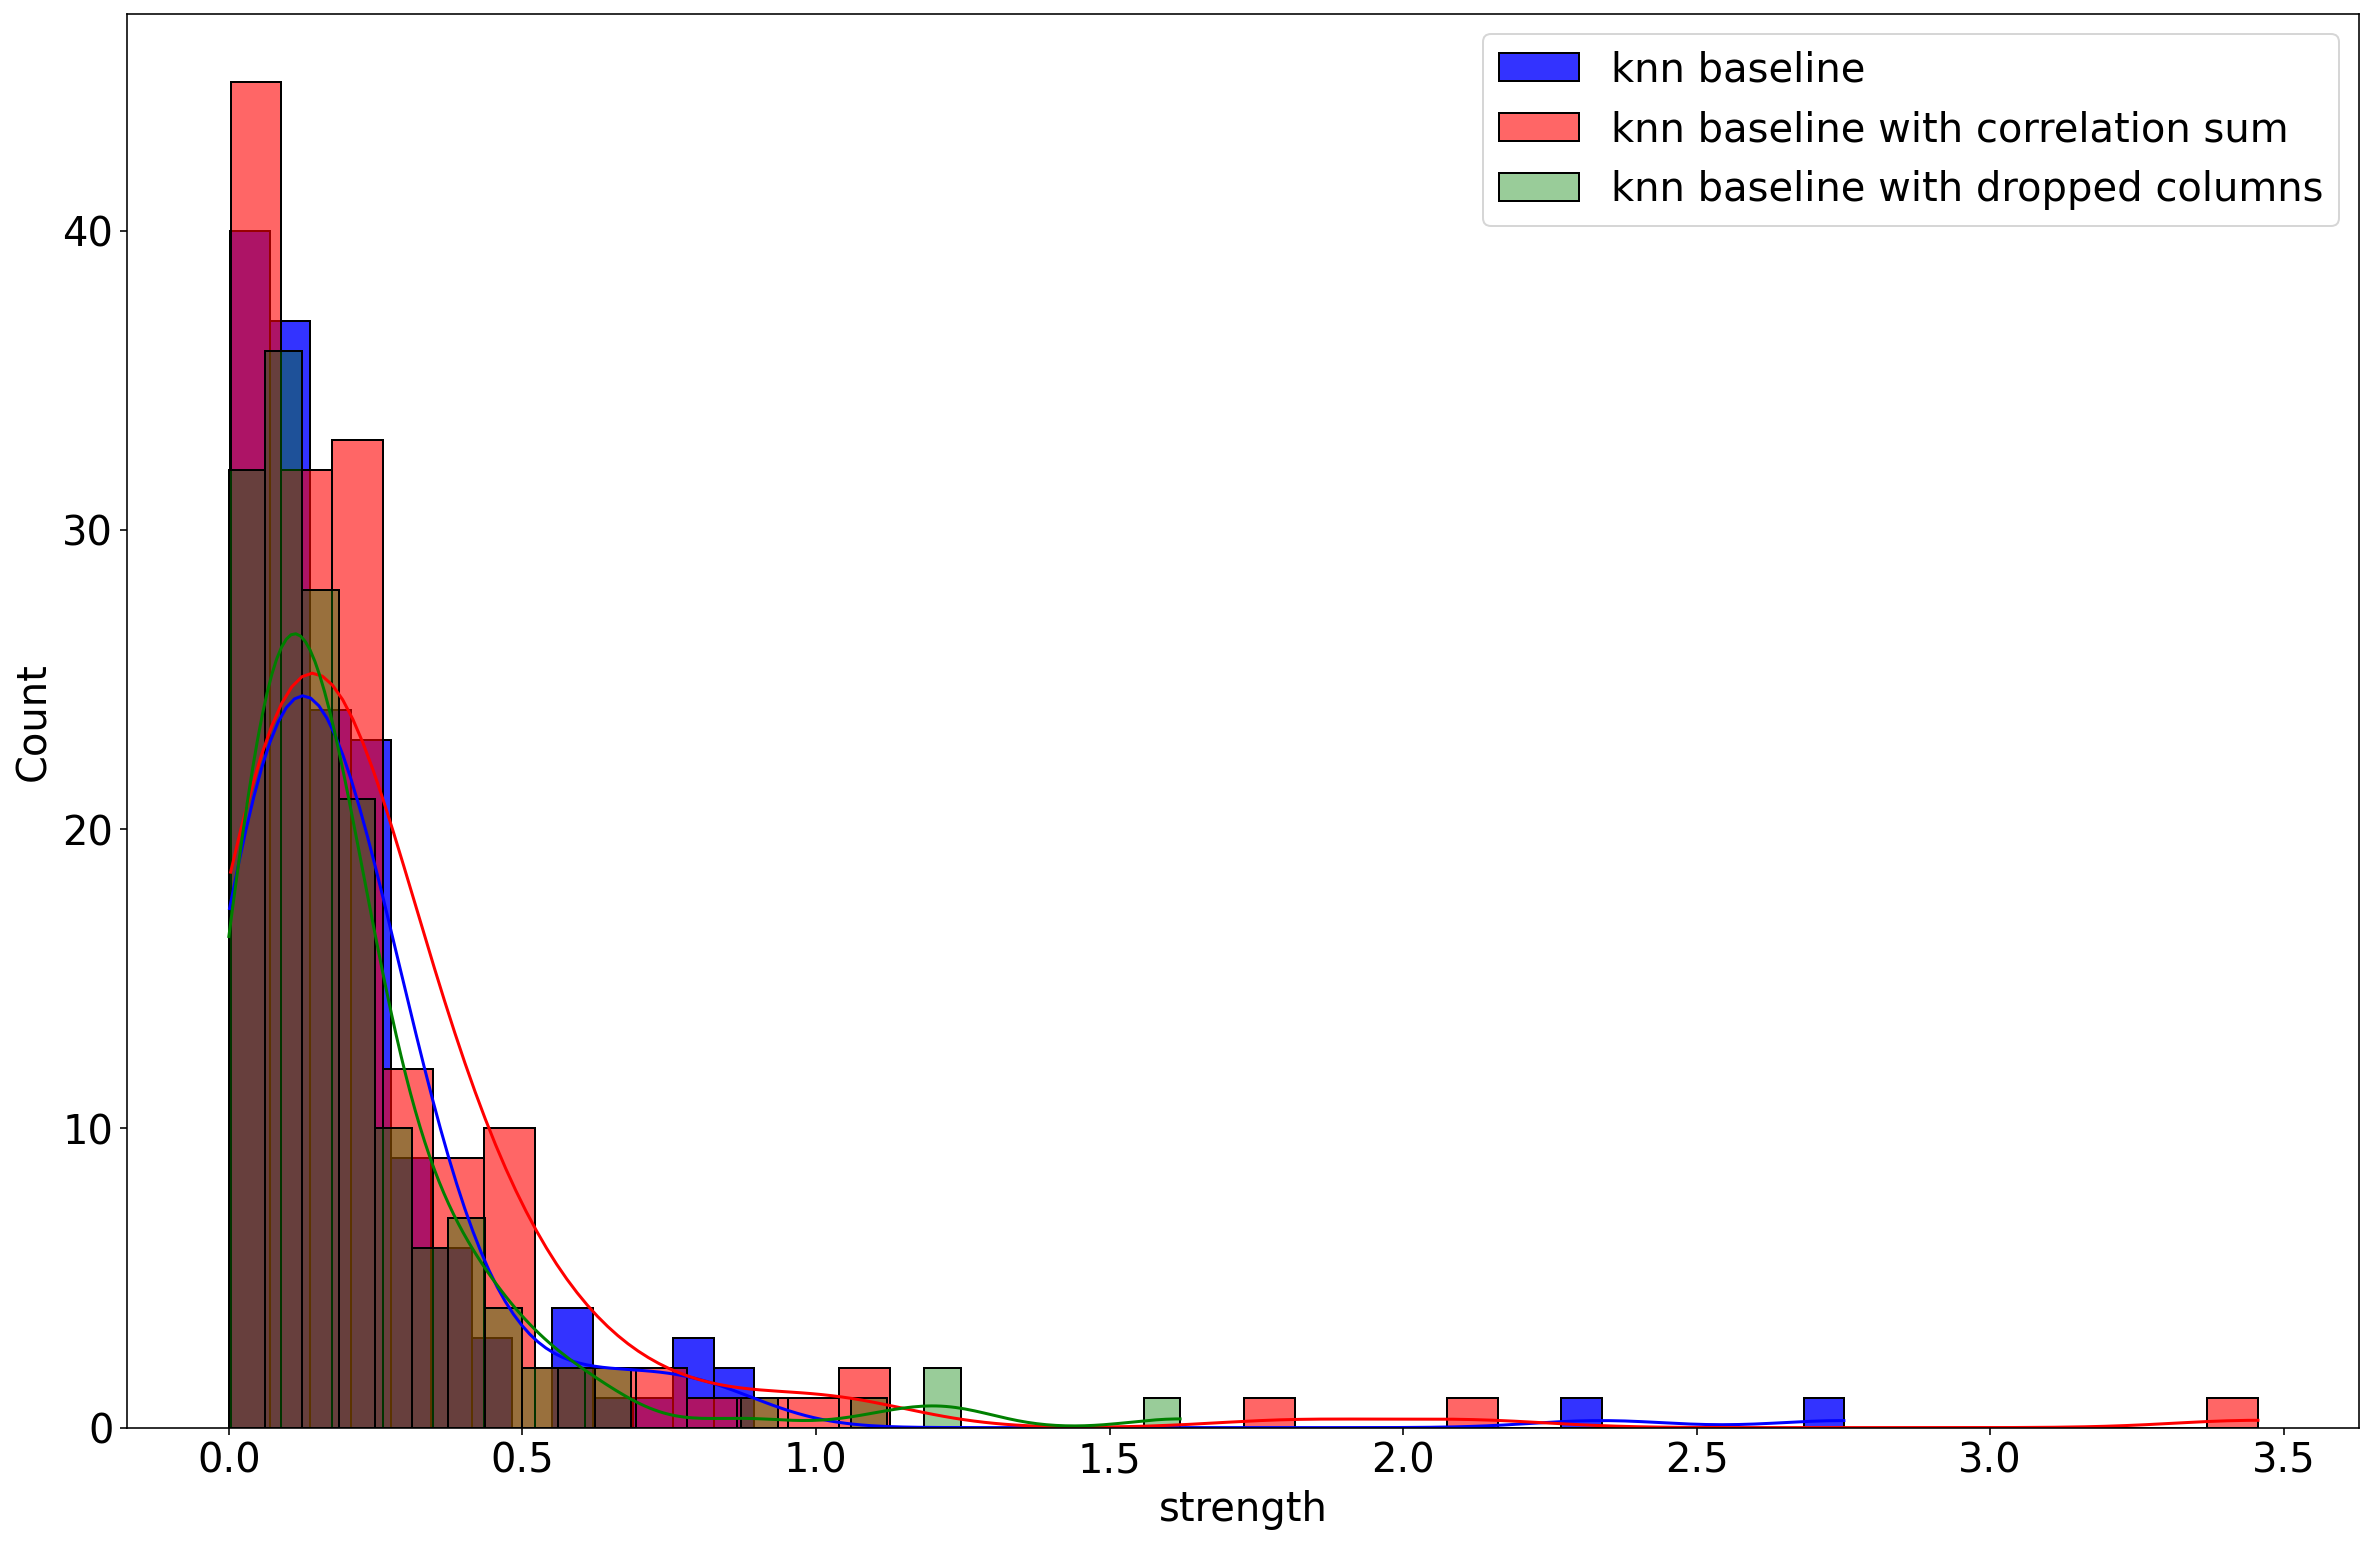

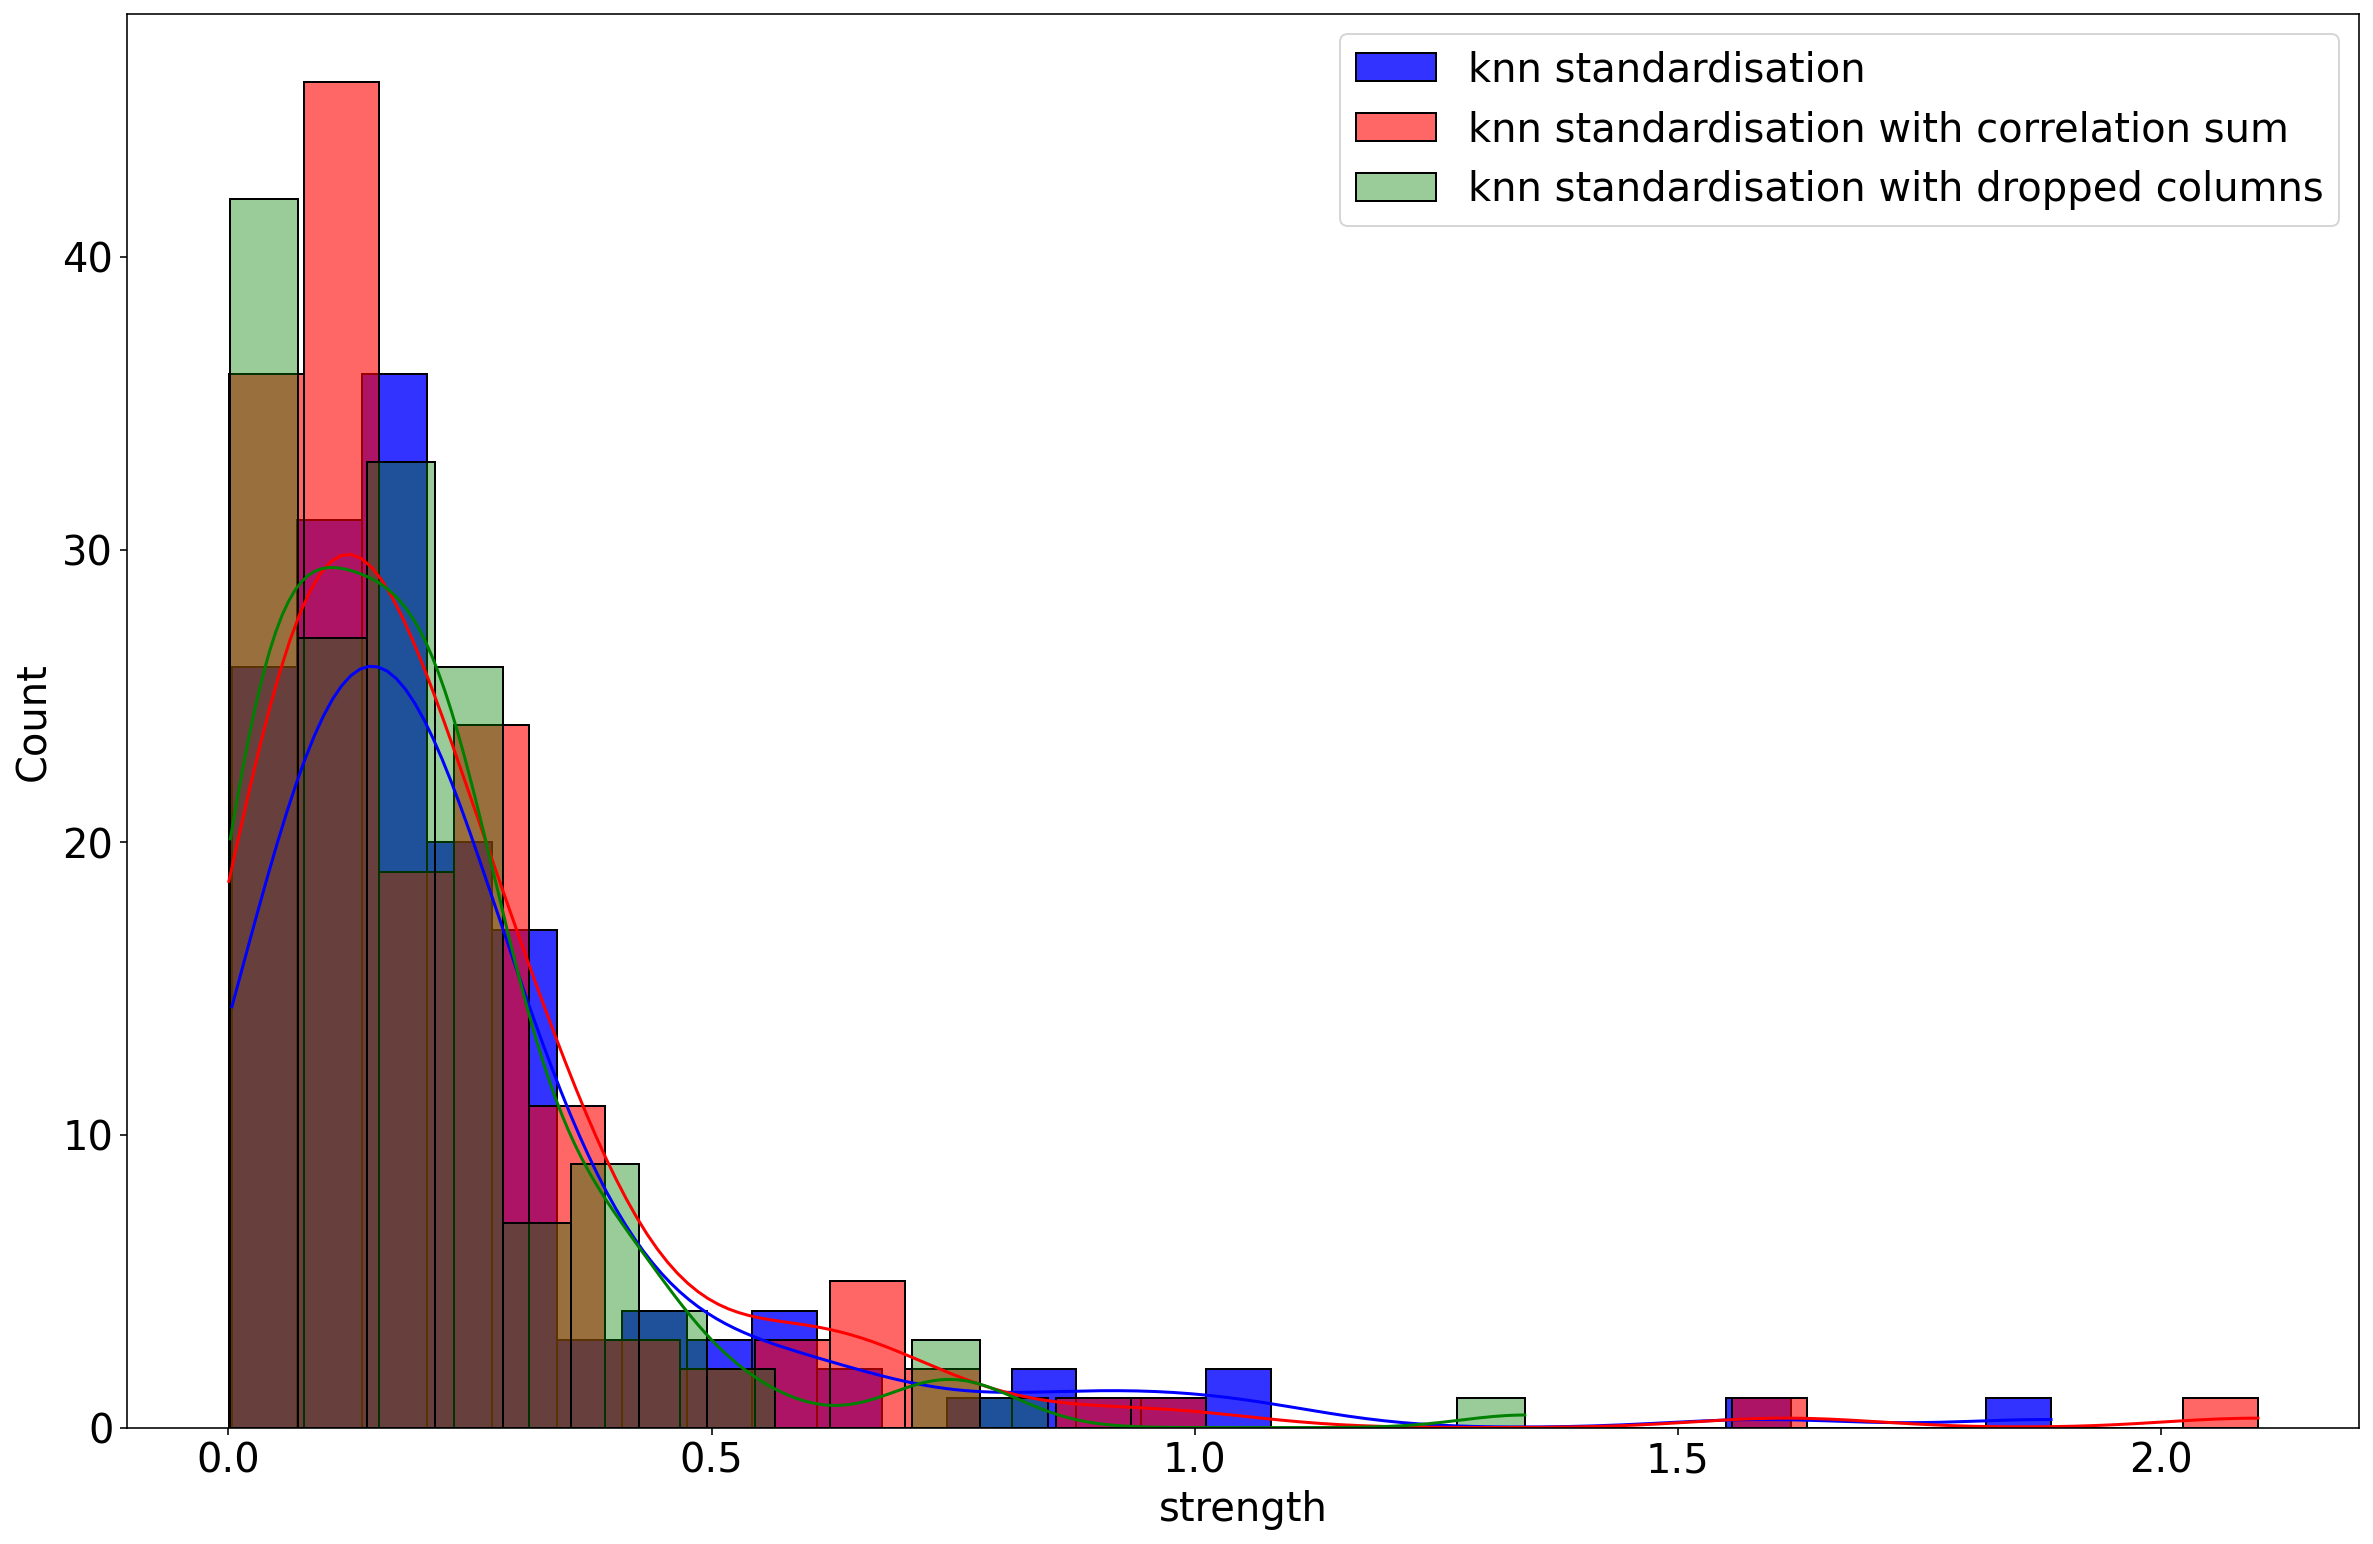

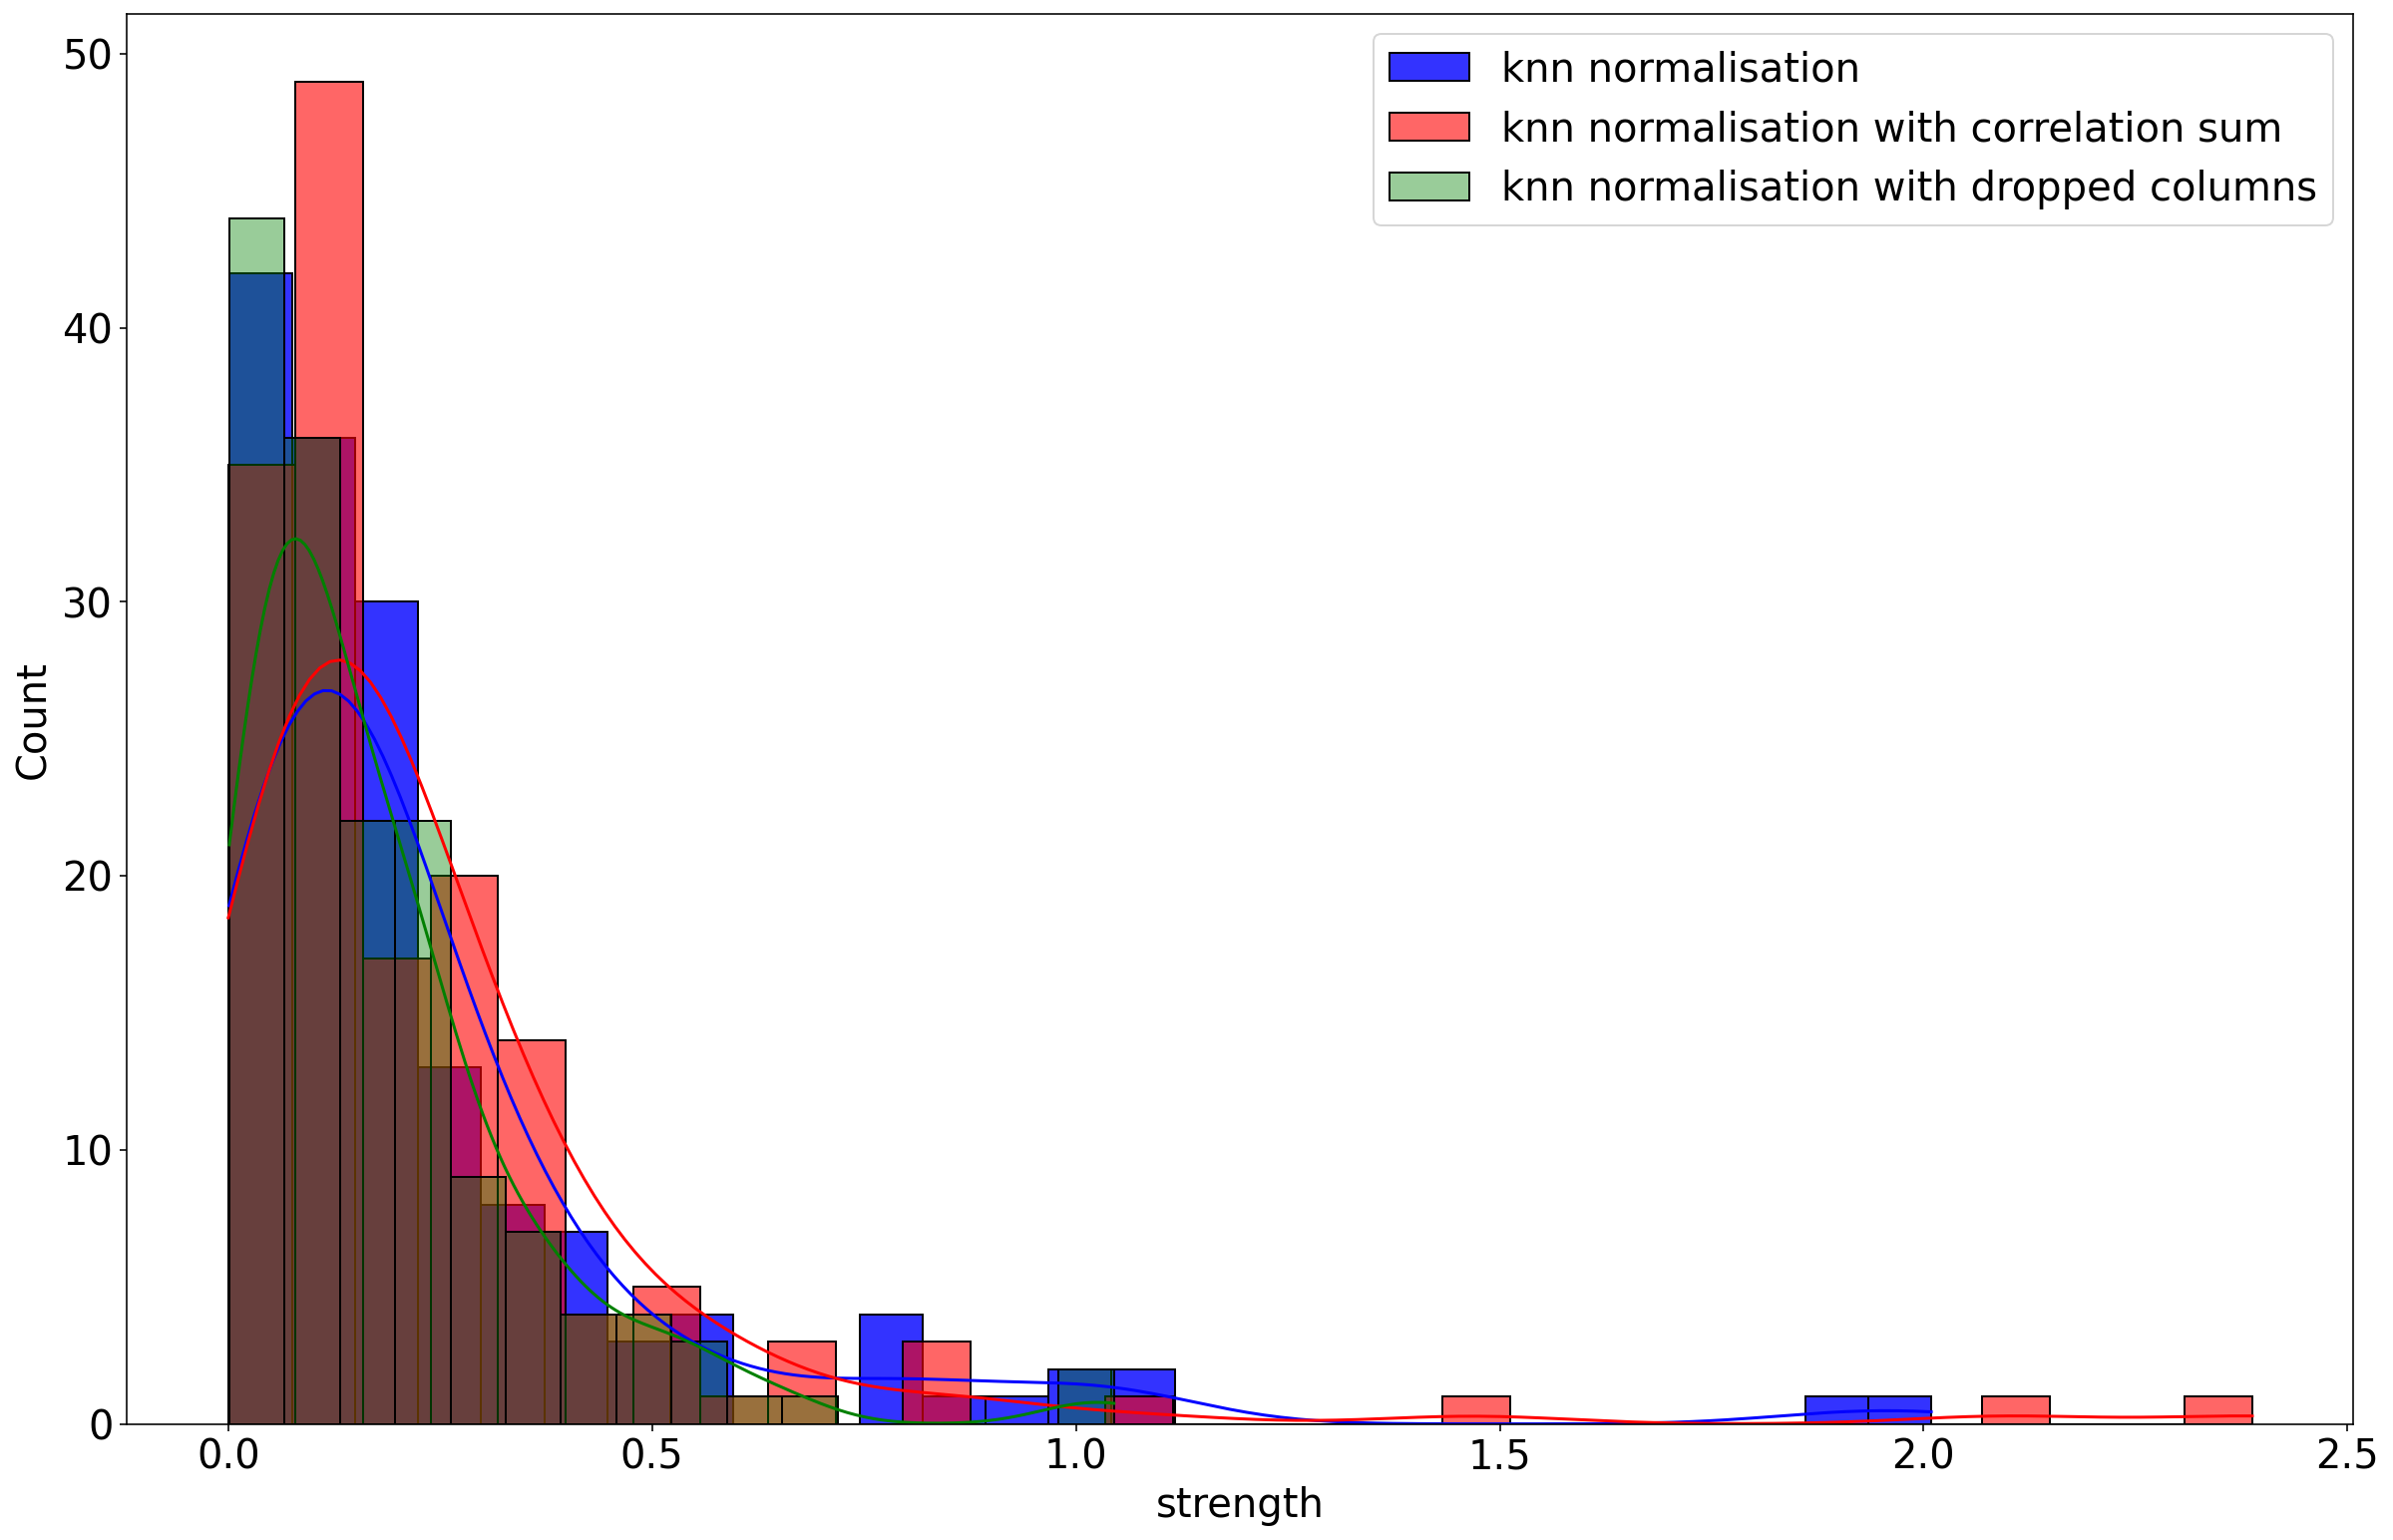

In [58]:
list1=[rel_err,rel_err_std,rel_err_norm]
list2=[rel_err_corr,rel_err_corr_std,rel_err_corr_norm]
list3=[rel_err_col,rel_err_col_std,rel_err_col_norm]
list4=['baseline','standardisation','normalisation']

z=0
for i,j,k in zip(list1,list2,list3):
    fig= plt.subplots(1, 1)
    c = np.random.uniform(0,0.5,3)
    sns.histplot(i, alpha = 0.8, label = 'knn '+list4[z], kde = True, color = 'b' )
    sns.histplot(j, alpha = 0.6, label = 'knn '+list4[z]+' with correlation sum', kde = True, color = 'r')
    sns.histplot(k, alpha = 0.4, label = 'knn '+list4[z]+' with dropped columns', kde = True, color = 'g')
    plt.legend()
    z=z+1

For the baseline case we can see from the chart that there is an improvement of the precision with the best one corresponding with the dropping of the columns model.
Regarding the standardization case there is an improvement in the precisionpassing from the first model to the other two, th chart shows also that the last two models ahve quite the same precision.
The normalization case instead, as the baseline case, shows a improvement passing from the first model to last one, infact the latter has the highest score of the models, but also corresponds to best one of all attempts.